# Исследование данных медицинского центра



### Описание проекта
Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года. <p>


***Цель Исследования:***<p>

- оценить изменения, произошедшие с ценой услуг клиники в 2022 году;<p>
- определить возможные причины, оказывающие влияние на цену лечения;<p>
- провести статистическую проверку гипотез и выявить драйверы изменения цены лечения.<p>

### Описание данных:<p>
•	record_id - уникальный идентификатор строки данных;<p>
•	service_date - дата оказания медицинской услуги;<p>
•	service_name - наименование медицинской услуги;<p><p>
•	service_number - количество услуг;<p>
•	service_amount - сумма выплат (стоимость оказанных услуг в рублях);<p>
•	insured - уникальный идентификатор пациента;<p>
•	sex_id - пол пациента;<p>
•	age_for_service_date - возраст пациента.<p>

</div> 

### Оглавление.

1. [Загрузка и предобработка данных](#start)
    * [Импорт библиотек](#import)
    * [Импорт данных](#data) 
    * [Просмотр данных](#data_check)
    * [Обработка пропущенных значений](#null)
    * [Проверка и корректировка типов данных](#dtypes)
    * [Обработка дубликатов](#duplicates) 
    * [Заполнение категорий услуг по цене и возрасту](#category)
    * [Анализ выбросов](#outs)    
    * [Вывод](#summary_start)    
    
2. [Исследовательский анализ данных](#analysis)
    * [Проверка выручку клиники по месяцам](#month_revenue) 
    * [Оценка изменения показателей по месяцам](#month_dinamics)
    * [Оценка динамики по посещениям и медицинским кейсам](#visits&cases) 
    * [Проанализируем востребованность и изменение цены различных услуг](#services)
    * [Оценка динамики востребованности услуг различных ценовых сегментов](#price)    
    * [Анализ динамики востребованности услуг различных категорий и типов](#type)
    * [Анализ клиентской базы по признаку пола](#gender)   
    * [Анализ клиентской базы по возрасту](#age)
    * [Анализ жизненного цикла клиента](#ltv)    
    * [Вывод](#summary_analysis)   
    
3. [Статистический анализ данных](#stats)
    * [Проверка гипотезы о равенстве средних цен услуг](#H_mean_price) 
    * [Проверка гипотезы о равенстве долей ценовых категорий](#H_category)
    * [Проверка гипотезы о равенстве категорий клиентов по полу](#H_gender)
    * [Проверка гипотезы о равенстве ...](#H_ltv')
    * [Вывод](#summary_stats)  
    
4. [Общий вывод](#summary_final) 

5. [Презентация](#https://disk.yandex.ru/i/aQLYiUeAWizzoQ) 

## Шаг 1. Загрузка и предобработка данных. <a id='start'></a> 

#### Для начала импортируем все необходимые в проекте библиотеки:<a id='import'></a> 

In [1]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

#### Импортируем данные и ознакомимся с таблицей:<a id='data'></a> 

In [2]:
try:
    data=pd.read_excel('\\dataset\\data_test_task_2022.xlsx')
except:
    data=pd.read_excel('https://disk.yandex.ru/d/Q2o2zUlRpLwpfQ')

#### *Посмотрим на данные:* <a id='data_check'></a> 

In [3]:
data.head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


В базе данных информация о 85369 услугах. Столбцы названы корректно, переименование не требуется. Необходимо приведение столбца с датой услуги в соответствующий формат, а также код пола привести в целочисленный формат, но прежде проверим данные на пропуски.

In [5]:
#сохраним первоначальный объем данных в переменную
start = data.shape

#### Проверим данные на наличие пропусков: <a id='null'></a> 

In [6]:
data.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

В базе данных незначительное количество пропусков в столбце с полом. Проверим возможность заполнения пропусков на основании имеющейся информации.


In [7]:
#определим количество клиентов с пропусками 
data.query('sex_id.isna()')['insured'].unique()

array([512590, 221581], dtype=int64)

In [8]:
#проверим наличие информации о поле при других посещениях
data.query('insured==512590')['sex_id'].unique()

array([nan,  2.])

In [9]:
data.query('insured==221581')['sex_id'].unique()

array([nan])

In [10]:
#проверим перечень услуг
data.query('insured==221581')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
8880,30620882903,2021-04-22,Прием первичный,1470,1,221581,NaN,42
8881,30620883003,2021-04-29,Прием повторный,1313,1,221581,NaN,42
12357,30786036703,2021-05-31,Прием первичный,1470,1,221581,NaN,42
17987,30961733903,2021-06-21,Прием повторный,1313,1,221581,NaN,42


Пропущены коды пола для двух посетителей, причем для одного из них возможно заполнить пропуски кодом, имеющимся в базе по другим посещениям. Пол второго клиента определить не представляется возможным. 

In [11]:
#заполним пропуски и удалим строки с пропусками, которые невозможно заполнить
data=data.query('insured!=221581').fillna(2)

In [12]:
#проверим результат
data.isna().sum()

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
dtype: int64

В базе данных четыре строки удалены, остальные пропуски заполнены.

In [13]:
#определим соответствие кодов полу клиента
data.query('service_name =="Ультразвуковое исследование большие сроки беременности (II, III триместр)"')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
9434,30620938403,2021-04-08,Ультразвуковое исследование большие сроки бере...,3045,1,490912,2.0,31
19871,31111787603,2021-07-01,Ультразвуковое исследование большие сроки бере...,3045,1,490912,2.0,31
20360,31111836603,2021-07-27,Ультразвуковое исследование большие сроки бере...,3045,1,191452,2.0,34
78270,32978710703,2022-07-20,Ультразвуковое исследование большие сроки бере...,3500,1,935341,2.0,30


Мужчины обозначены кодом 1, женщины - 2.

##### Изменим типы данных:<a id='dtypes'></a> 

In [14]:
#приводим дату в формат datetime
data['service_date'] = pd.to_datetime(data['service_date'])

In [15]:
#создадим столбцы с годом, месяцем и неделей оказания услуги
data['service_year'] = data['service_date'].dt.year
data['service_month'] = data['service_date'].dt.month
data['service_week'] = data['service_date'].dt.isocalendar().week
data.head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26,2021,1,3
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,2021,1,3
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,2021,1,3
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26,2021,1,3
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26,2021,1,3


In [16]:
#код пола приводим в целочисленный формат
data['sex_id'] = data['sex_id'].astype(int)

####  Проверим наличие дубликатов в данных:<a id='duplicates'></a> 

In [17]:
#оценим количество дубликатов 
data.duplicated().sum()

0

Явные дубликаты в базе данных отсутствуют.

In [18]:
#оценим количество уникальных наименований услуг 
data['service_name'].nunique()

875

In [19]:
#проверим на неявные дубликаты
data['service_name'].sort_values().unique()

array(['(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )',
       '(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )',
       '(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)',
       '(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)',
       '(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)',
       '17-OH - гидроксипрогестерон',
       '25-OH витамин D (25-гидроксихолекальциферол)', 'Ascaris IgG',
       'Bordetella (pertusis) IgA', 'Bordetella (pertusis) IgG',
       'Bordetella (pertusis) IgM', 'Bordetella pertussis (Слюна)',
       'Bordetella pertussis (Соскоб)', 'CMV (цитомегаловирус) (Кровь)',
       'CMV (цитомегаловирус)

Медицинский центр оказывает более 800 уникальных услуг. Часть из этих наименований с опечатками и переименованиями услуг.   

In [20]:
#устраним замеченные опечатки и дублирования
data['service_name']=data['service_name'].replace({
    'Удаление серной пробки  (за одно ухо)':'Удаление ушной серы с одной стороны', 
    'Удаление серных пробок (за ухо)':'Удаление ушной серы с одной стороны',
    'Мануальная терапия двух сегментов':'Мануальная терапия (2 сегмента)',
    'Прием терапевта на дому (до МКАД)':'Прием на дому (до МКАД)',
    'Рентгенография грудного отдела (2 снимка)':'Рентгенография (цифровая) грудного отдела ( 2 снимка, запись на диск)',
    'Рентгенография кистей или стоп':'Рентгенография (цифровая) кистей или стоп ( запись на диск)',
    'Рентгенография крестцово-подвздошного сочленения':'Рентгенография (цифровая) крестцово-подвздошного сочленения ( запись на диск)',
    'Рентгенография крупного сустава (2 снимка)':'Рентгенография (цифровая) крупного сустава (2 снимка, запись на диск)',
    'Рентгенография легких в прямой проекции':'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)',
    'Рентгенография мелких суставов (стопа, кисть, пяточная кость в 2-проекциях)':'Рентгенография (цифровая) мелких суставов (стопа, кисть, пяточная кость в 2-проекциях, запись на диск)',
    'Рентгенография носоглотки':'Рентгенография (цифровая) носоглотки ( запись на диск)',
    'Рентгенография одного отдела позвоночника: функциональные пробы (сгибание, разгибание (2 снимка)':'Рентгенография (цифровая) одного отдела позвоночника: функциональные пробы (сгибание, разгибание, 2 снимка, запись на диск)',
    'Рентгенография органов грудной клетки ( 2 проекции )':'Рентгенография (цифровая) органов грудной клетки ( 2 проекции, запись на диск )',
    'Рентгенография пояснично-крестцового отдела позвоночника (2 снимка)':'Рентгенография (цифровая) пояснично-крестцового отдела позвоночника ( 2 снимка, запись на диск)',
    'Рентгенография придаточных пазух носа':'Рентгенография (цифровая) придаточных пазух носа ( запись на диск)',
    'Рентгенография шейного отдела позвоночника (2 снимка)':'Рентгенография (цифровая) шейного отдела позвоночника (2 снимка, запись на диск)'})

In [21]:
data['service_name']=data['service_name'].str.replace('более 4см,кв.','более 4 кв.см.')
data['service_name']=data['service_name'].str.replace('более 4 см,кв.','более 4 кв.см.')
data['service_name']=data['service_name'].str.replace('менее 4 кв,см.','менее 4 кв.см.')
data['service_name']=data['service_name'].str.replace('менее 4см,кв.','менее 4 кв.см.')
data['service_name']=data['service_name'].str.replace('менее 4 см,кв.','менее 4 кв.см.')

Неявные дубликаты и опечатки исправлены.<p>
    
Поиск соответствия в интернете не дает однозначной категоризации услуг, каждое медицинское учреждение по-своему обобщает и кодирует услуги. Наиболее оптимальным является уточнение способа категоризации у клиента, поэтому скачиваем файл с прескурантом с сайта клиники. 

In [22]:
#загружаем файл с категориями услуг
price_list=pd.read_excel('\\dataset\\price_list.xls')
price_list.head(5)

,Unnamed: 0,Unnamed: 1,Прейскурант на 01.10.2023,Unnamed: 3
0,Код услуги,Внутренний код,Наименование,Цена
1,NaN,NaN,"Период COVID-19 (вызовы на дом, тестирование, ...",NaN
2,В01.047.001.02,300.50,Консультация ведущего специалиста перед вакцин...,2250
3,А11.02.002.005,300.51,Внутримышечная инъекция Гам-КОВИД-Вак (Комбини...,500
4,NaN,NaN,Процедурный кабинет,NaN


Категория услуг указана в строках без цены. Обработаем файл, удалив лишние столбцы, дополним столбцом с категорией услуг.

In [23]:
del price_list['Unnamed: 0']
del price_list['Unnamed: 1']
price_list=price_list[1:]
price_list.columns=['service_name', 'price']
price_list.head(5)

,service_name,price
1,"Период COVID-19 (вызовы на дом, тестирование, ...",NaN
2,Консультация ведущего специалиста перед вакцин...,2250
3,Внутримышечная инъекция Гам-КОВИД-Вак (Комбини...,500
4,Процедурный кабинет,NaN
5,Вызов медсестры на дом (в пределах 30 км за МКАД),3500


In [24]:
for row in range(1, (len(price_list)+1)):
    if  pd.isna(price_list.loc[row, 'price']):
        category = price_list.loc[row, 'service_name']
    else:
        price_list.loc[row, 'med_category'] = category
        
price_list.head(5)

,service_name,price,med_category
1,"Период COVID-19 (вызовы на дом, тестирование, ...",NaN,NaN
2,Консультация ведущего специалиста перед вакцин...,2250,"Период COVID-19 (вызовы на дом, тестирование, ..."
3,Внутримышечная инъекция Гам-КОВИД-Вак (Комбини...,500,"Период COVID-19 (вызовы на дом, тестирование, ..."
4,Процедурный кабинет,NaN,NaN
5,Вызов медсестры на дом (в пределах 30 км за МКАД),3500,Процедурный кабинет


In [25]:
del price_list['price']
price_list['service_name'] = price_list['service_name'].drop_duplicates()
price_list = price_list.dropna()
price_list.head(5)

,service_name,med_category
2,Консультация ведущего специалиста перед вакцин...,"Период COVID-19 (вызовы на дом, тестирование, ..."
3,Внутримышечная инъекция Гам-КОВИД-Вак (Комбини...,"Период COVID-19 (вызовы на дом, тестирование, ..."
5,Вызов медсестры на дом (в пределах 30 км за МКАД),Процедурный кабинет
6,Озонотерапия (капельное введение озонированног...,Процедурный кабинет
7,Взятие мазка,Процедурный кабинет


In [26]:
# объединяем данные
data=data.merge(price_list, on='service_name', how='left')
data.head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,NaN
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2,26,2021,1,3,Оториноларингология
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2,26,2021,1,3,Бактериология (Посев из зева)
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2,26,2021,1,3,Общеклинические исследования
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2,26,2021,1,3,Биохимия крови


Проверим различия между приемом у разных врачей.

In [27]:
data.query('service_name.str.find("Прием")!= -1').groupby(by='service_name').agg(
    {'service_date':['count', 'min', 'max'], 'service_amount':'mean'}).sort_values(by=('service_date','count'), 
                                                                                   ascending=False).head(30)

service_date                        \
                                              count        min        max   
service_name                                                                
Прием первичный                                6056 2021-01-03 2021-10-31   
Прием повторный                                4475 2021-01-03 2021-10-31   
Прием трапевта, первичный                      1157 2021-11-01 2022-07-31   
Прием гинеколога, повторный                    1139 2021-11-01 2022-08-31   
Прием отоларинголога, первичный                 871 2021-11-01 2022-08-31   
Прием невролога, первичный                      832 2021-11-02 2022-08-31   
Прием терапевта , повторный                     714 2021-11-01 2022-08-30   
Прием офтальмолога,  первичный                  614 2021-11-02 2022-08-31   
Прием гинеколога, первичный                     599 2021-11-01 2022-08-31   
Прием хирурга, первичный                        583 2021-11-01 2022-08-31   
Прием травматолога-ортопеда, первичный          534 2021-11-01 2022-08-30   
Прием эндокринолога, первичный                  529 2021-11-01 2022-08-31   
Прием дерматолога, первичный                    519 2021-11-01 2022-08-31   
Прием невролога, повторный                      504 2021-11-01 2022-08-31   
Прием гастроэнтеролога, повторный               487 2021-11-01 2022-08-31   
Прием травматолога-ортопеда, повторный          480 2021-11-01 2022-08-31   
Прием уролога, повторный                        455 2021-11-01 2022-08-31   
Прием гастроэнтеролога, первичный               434 2021-11-01 2022-08-31   
Прием уролога, первичный                        395 2021-11-01 2022-08-31   
Прием отоларинголога, повторный                 395 2021-11-01 2022-08-31   
Прием физиотерапевта, первичный                 392 2021-11-02 2022-08-31   
Прием эндокринолога, повторный                  369 2021-11-02 2022-08-24   
Прием педиатра,  первичный                      368 2021-11-02 2022-08-31   
Прием физиотерапевта, повторный                 326 2021-11-01 2022-08-31   
Прием педиатра, повторный                       286 2021-11-01 2022-08-15   
Прием кардиолога, первичный                     282 2021-11-01 2022-08-30   
Прием хирурга, повторный                        278 2021-11-01 2022-08-31   
Прием кардиолога, повторный                     221 2021-11-02 2022-08-28   
Прием онколога, первичный                       163 2021-11-01 2022-08-31   
Прием аллерголога, первичный                    145 2021-11-07 2022-08-31   

                                       service_amount  
                                                 mean  
service_name                                           
Прием первичный                           1479.190059  
Прием повторный                           1322.192849  
Прием трапевта, первичный                 1549.930856  
Прием гинеколога, повторный               1391.799824  
Прием отоларинголога, первичный           1549.735936  
Прием невролога, первичный                1552.403846  
Прием терапевта , повторный               1392.100840  
Прием офтальмолога,  первичный            1553.680782  
Прием гинеколога, первичный               1554.824708  
Прием хирурга, первичный                  1557.289880  
Прием травматолога-ортопеда, первичный    1552.134831  
Прием эндокринолога, первичный            1550.132325  
Прием дерматолога, первичный              1561.358382  
Прием невролога, повторный                1390.138889  
Прием гастроэнтеролога, повторный         1389.199179  
Прием травматолога-ортопеда, повторный    1393.125000  
Прием уролога, повторный                  1396.000000  
Прием гастроэнтеролога, первичный         1552.165899  
Прием уролога, первичный                  1552.556962  
Прием отоларинголога, повторный           1389.037975  
Прием физиотерапевта, первичный           1552.372449  
Прием эндокринолога, повторный            1388.726287  
Прием педиатра,  первичный                1549.130435  
Прием физиотерапевта, повторный          

До ноября 2021 года отсутствовало деление услуг приема врачей по направлениям. Поскольку сравнить анализируемые периоды между собой в разбивке по профилю специалиста не представляется возможным, приведем названия приема к единой форме, оставив обозначение очередности приема, поскольку первичный и повторный прием у врача различаются по стоимости.<p>
В отдельную категорию также вынесем прием у врачей с высокой квалификацией, так как цена услуги у данной категории на порядок выше и не различается для первичного и повторного приема.

In [28]:
#заполним категорию услуг для врачебного приема
data.loc[(data['service_name'].str.startswith("Прием"))&(data['service_name'].str.find("повторный")!= -1),
         'med_category'] = 'Прием повторный'
data.loc[(data['service_name'].str.startswith("Прием"))&(data['service_name'].str.find("первичный")!= -1),
         'med_category'] = 'Прием первичный'
data.loc[(data['service_name'].str.startswith("Прием"))&(data['service_name'].str.find("первичный")== -1)&
         (data['service_name'].str.find("повторный")== -1)&(data['service_name'].str.find("на дому")== -1),
         'med_category'] = 'Прием врача-эксперта'

In [29]:
data.loc[(data['med_category'].str.startswith("Прием"))&
         (data['service_name'].str.find("на дому")== -1),'service_name'] = data['med_category']

In [30]:
#проверяем категории
data.loc[(data['service_name'].str.find("Прием")!= -1),'med_category'].unique()

array(['Прием первичный', 'Прием повторный', 'Прием врача-эксперта',
       'Терапия'], dtype=object)

In [31]:
#проверяем количество пропусков категории
data['med_category'].isna().sum()

3879

In [32]:
#создаем функцию для замены пропущенных значений по неполному наименованию услуги
def category_fillna(number):
    for index in data.loc[data['med_category'].isna()].index:
        pattern = data.loc[index, 'service_name'][:number]
        try: 
            data.loc[index, 'med_category'] = price_list.loc[(price_list['service_name'].
                                                              str.startswith(pattern)), 'med_category'].values[0]
        except:
            data.loc[index, 'med_category'] = data.loc[index, 'med_category']
    return data['med_category'].isna().sum()

In [33]:
#пошагово заполняем категории
category_fillna(12)

1287

In [34]:
category_fillna(8)

577

In [35]:
category_fillna(5)

141

In [36]:
#проверим категории услуг
data['med_category'].sort_values().unique()

array(['Аллергология', 'Анестезиология', 'Анестезиология и реанимация',
       'Аутоиммунные антитела', 'Аутоиммунные антитела ',
       'Бактериология (Отделеяемое из влагалища)',
       'Бактериология (Отделеяемое молочной железы)',
       'Бактериология (Посев грудного молока)',
       'Бактериология (Посев из зева)', 'Бактериология (Посев из носа)',
       'Бактериология (Посев из цервикального канала)',
       'Бактериология (Посев кала)',
       'Бактериология (Посев мат-ла из стерильн, полостей)',
       'Бактериология (Посев мочи)',
       'Бактериология (Посев наружных половых органов)',
       'Бактериология (Посев отделяемого дыхательных путей)',
       'Бактериология (Посев отделяемого из глаз)',
       'Бактериология (Посев отделяемого из ушей)',
       'Бактериология (Посев отделяемого уретры)',
       'Бактериология (Посев с кожи/раневого отделяемого)',
       'Бактериология (Посев сока простаты)',
       'Бактериология (Посев урогенитальный)',
       'Бактериология (Пос

In [37]:
data['med_category'].nunique()

87

Слишком большое количество категорий. Уменьшим их, устранив конкретизации в названиях.

In [38]:
#создаем функцию для удаления конкретизации в названиях категорий
def category_reduce(word, category):
    data.loc[(data['med_category'].str.find(word)!= -1)&(data['med_category'].isna()==False),
         'med_category'] = category

In [39]:
category_reduce('Бактериология','Бактериология')
category_reduce('Рентген','Рентген медицина')
category_reduce('ПЦР диагностика инфекций', 'ПЦР диагностика инфекций')
category_reduce('Магнитно-резонансная томография','Магнитно-резонансная томография')
category_reduce('Ультразвуковая диагностика', 'Ультразвуковая диагностика')
category_reduce('Исследовани','Компьютерная томография')
category_reduce('Физиотерапия','Физиотерапия')
category_reduce('Эндоскопия','Эндоскопия')
category_reduce('Аутоиммунные антитела ','Аутоиммунные антитела')
category_reduce('Анестезиология','Анестезиология')

In [40]:
#проверим наименования услуг с пропусками в категории
data.query('med_category.isna()')['service_name'].sort_values().unique()

array(['В,в капельная инфузия (за 1 процедуру без стоимости лекарств)',
       'Контрольный осмотр', 'ЛФК разовое групповое занятие',
       'Накожное применение лекарственных препаратов',
       'Плановое гистологическое исследование материала(3-6 препарата одного органа)',
       'Туширование лимфоидной ткани на задней стенке глотки и боковых валиков глотки'],
      dtype=object)

In [41]:
#создаем функцию для индивидуального внесения категорий
def category_change(word, category):
    data.loc[(data['service_name']==word),'med_category'] = category

In [42]:
#заполняем оставшиеся пропуски категорий
category_change('В,в капельная инфузия (за 1 процедуру без стоимости лекарств)','Процедурный кабинет')
category_change('Контрольный осмотр','Прием повторный') 
category_change('ЛФК разовое групповое занятие','Физиотерапия')
category_change('Накожное применение лекарственных препаратов','Процедурный кабинет')
category_change('Плановое гистологическое исследование материала(3-6 препарата одного органа)','Гистологические исследования')
category_change('Туширование лимфоидной ткани на задней стенке глотки и боковых валиков глотки','Оториноларингология')

In [43]:
#проверяем пропуски данных
data.query('med_category.isna()')['service_name'].nunique()

0

In [44]:
#оценим количество категорий
data['med_category'].nunique()

55

In [45]:
data['med_category'].sort_values().unique()

array(['Аллергология', 'Анестезиология', 'Аутоиммунные антитела',
       'Бактериология', 'Биохимия крови', 'Биохимия мочи / спермы',
       'Витамины', 'Гастроэнтерология', 'Генетические исследования',
       'Гинекологические операции', 'Гинекология',
       'Гистологические исследования', 'Гормональные исследования',
       'Дерматология', 'Диагностические комплексы', 'Иммунитет',
       'Иммунология', 'Индивидуальные аллергены',
       'Компьютерная томография', 'Лаборатория "Семейная"',
       'Магнитно-резонансная томография', 'Мануальная терапия', 'Массаж',
       'Неврология', 'Общеклинические исследования', 'Общие', 'Онкология',
       'Онкомаркеры', 'Оториноларингология', 'Офтальмология',
       'ПЦР диагностика инфекций',
       'Период COVID-19 (вызовы на дом, тестирование, вакцинация)',
       'Прием врача-эксперта', 'Прием первичный', 'Прием повторный',
       'Процедурный кабинет', 'Пульмонология', 'Рентген медицина',
       'Рефлексотерапия (одна процедура)', 'Ринопласт

У нас остается 55 уникальных наименований категории услуги, уже лучше, но все равно много для анализа. Обобщим по типу услуги.

In [46]:
#обобщим тип услуг
lab = ['Аутоиммунные антитела', 
'Бактериология', 
'Биохимия крови',
'Биохимия мочи / спермы', 
'Витамины', 
'Генетические исследования', 
'Гистологические исследования',
'Гормональные исследования', 
'Иммунитет', 
'Индивидуальные аллергены', 
'Общеклинические исследования',
'Онкомаркеры',
'ПЦР диагностика инфекций',
'Серологические исследования', 
'Система Гемостаза',
'Диагностические комплексы', 
'Цитологические исследования']

diagnosis = ['Компьютерная томография', 
'Магнитно-резонансная томография', 
'Рентген медицина',
'Скрининг беременных для выявления хромомсомных аномалий плода',
'Ультразвуковая диагностика', 
'Функциональная диагностика', 
'Эндоскопия']

prevention = ['Мануальная терапия', 
'Массаж',
'Рефлексотерапия (одна процедура)', 
'Физиотерапия']
 
appointment = ['Прием врача-эксперта', 
'Прием первичный', 
'Прием повторный']

In [47]:
#создаем столбец с типом услуги
for row in range(len(data)):
    if data.loc[row, 'med_category'] in lab:
        data.loc[row, 'service_type'] = 'Лабораторные исследования'
    elif data.loc[row, 'med_category'] in diagnosis:
        data.loc[row, 'service_type'] = 'Диагностика'
    elif data.loc[row, 'med_category'] in prevention:
        data.loc[row, 'service_type'] = 'Профилактика'
    elif data.loc[row, 'med_category'] in appointment:
        data.loc[row, 'service_type'] = 'Прием, консультация специалиста'

In [48]:
data.head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,Прием первичный,"Прием, консультация специалиста"
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2,26,2021,1,3,Оториноларингология,NaN
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2,26,2021,1,3,Бактериология,Лабораторные исследования
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2,26,2021,1,3,Общеклинические исследования,Лабораторные исследования
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2,26,2021,1,3,Биохимия крови,Лабораторные исследования


У нас остается пропуски в категории услуги в отдельных областях медицины, в которых могут встречаться как лечебные процедуры, так и диагностические мероприятия и оперативные вмешательства. Заполнение этих пропусков требует поиска и уточнения информации в интернете. Выгрузим файл и заполним недостающие данные.

In [49]:
data.to_excel('output.xlsx')

In [50]:
#загружаем файл с категориями услуг
category=pd.read_excel('\\dataset\\output 1.xlsx')
category.head(5)

,service_name,med_category,service_type
0,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко...",Аллергология,Лабораторные исследования
1,"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная...",Аллергология,Лабораторные исследования
2,"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, ...",Аллергология,Лабораторные исследования
3,"(4 E)Аллергопанель IgE (Говядина, Телятина, Св...",Аллергология,Лабораторные исследования
4,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",Аллергология,Лабораторные исследования


In [51]:
# объединяем данные
del data['service_type']
del data['med_category']
data=data.merge(category, on='service_name', how='left')
data.head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,Прием первичный,"Прием, консультация специалиста"
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2,26,2021,1,3,Оториноларингология,Забор биоматериала
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2,26,2021,1,3,Бактериология,Лабораторные исследования
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2,26,2021,1,3,Общеклинические исследования,Лабораторные исследования
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2,26,2021,1,3,Биохимия крови,Лабораторные исследования


In [52]:
#проверим количество категорий
data['med_category'].nunique()

49

In [53]:
data['service_type'].unique()

array(['Прием, консультация специалиста', 'Забор биоматериала',
       'Лабораторные исследования', 'Профилактика', 'Лечение',
       'Диагностика', 'Оперативные вмешательства'], dtype=object)

Данные перепроверены и включены в таблице для анализа. Для услуг указаны категории, вынесенные в отдельные столбцы, с точки зрения медицинской области и типа услуги. Количество медицинских категорий оказываемых услуг снижено до 49, по типу услуги объединены в 7 категорий.

#### Дополним базу данных категорией услуг по цене: <a id='category'></a> 

In [54]:
#рассчитаем цену услуг
data['price'] = (data['service_amount']/data['service_number']).round(2)
data.head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,Прием первичный,"Прием, консультация специалиста",1470.0
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2,26,2021,1,3,Оториноларингология,Забор биоматериала,284.0
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2,26,2021,1,3,Бактериология,Лабораторные исследования,1134.0
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2,26,2021,1,3,Общеклинические исследования,Лабораторные исследования,693.0
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2,26,2021,1,3,Биохимия крови,Лабораторные исследования,420.0
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2,26,2021,1,3,Биохимия крови,Лабораторные исследования,420.0
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2,26,2021,1,3,Процедурный кабинет,Забор биоматериала,158.0
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2,26,2021,1,4,Прием первичный,"Прием, консультация специалиста",1470.0
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2,26,2021,1,4,Физиотерапия,Профилактика,1040.0
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2,26,2021,1,4,Физиотерапия,Профилактика,1040.0


In [55]:
#учитывая, что цена услуг менялась, рассчитаем среднюю цену услуг для категоризации
price_qcut = data.pivot_table(index='service_name', values='price', aggfunc='mean').reset_index()
price_qcut.columns=['service_name','mean_price']
price_qcut['mean_price'] = price_qcut['mean_price'].round(2)
price_qcut.head(10)

,service_name,mean_price
0,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко...",1520.00
1,"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная...",1520.00
2,"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, ...",1520.00
3,"(4 E)Аллергопанель IgE (Говядина, Телятина, Св...",1520.00
4,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1500.64
5,17-OH - гидроксипрогестерон,610.00
6,25-OH витамин D (25-гидроксихолекальциферол),3323.75
7,Ascaris IgG,830.00
8,Bordetella (pertusis) IgA,970.00
9,Bordetella (pertusis) IgG,654.00


In [56]:
# присвоим категории
price_qcut['price_category'] = pd.qcut(price_qcut['mean_price'], q=5).astype(str)
price_qcut['price_category'].unique()

array(['(1215.782, 2430.0]', '(524.818, 856.18]', '(2430.0, 26999.0]',
       '(856.18, 1215.782]', '(147.299, 524.818]'], dtype=object)

In [57]:
price_qcut['price_category'] = price_qcut['price_category'].replace({'(147.299, 524.818]':'низкая цена',
                                                           '(524.818, 856.18]':'ниже среднего',
                                                           '(856.18, 1215.782]':'средний уровень',
                                                           '(1215.782, 2430.0]':'выше среднего',
                                                           '(2430.0, 26999.0]':'дорогостоящие услуги'})                                 
                                  
price_qcut.head()

,service_name,mean_price,price_category
0,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко...",1520.00,выше среднего
1,"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная...",1520.00,выше среднего
2,"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, ...",1520.00,выше среднего
3,"(4 E)Аллергопанель IgE (Говядина, Телятина, Св...",1520.00,выше среднего
4,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",1500.64,выше среднего


In [58]:
#объединим таблицы
data = data.merge(price_qcut, on='service_name')
data.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего
1,30268157703,2021-01-26,Прием первичный,1470,1,490777,2,26,2021,1,4,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего
2,30268159403,2021-01-15,Прием первичный,1470,1,177372,2,25,2021,1,2,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего
3,30268161903,2021-01-05,Прием первичный,1470,1,418179,1,40,2021,1,1,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего
4,30268165303,2021-01-03,Прием первичный,1470,1,402409,2,36,2021,1,53,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего


Данные объединены корректно.

#### Дополним базу данных категорией клиента по возрасту:

In [59]:
# присвоим категории
for row in range(len(data)):
    if data.loc[row, 'age_for_service_date']<=6:
        data.loc[row, 'age_category'] = 'дошкольники'
    elif (data.loc[row, 'age_for_service_date']>6 and data.loc[row, 'age_for_service_date']<=16):
        data.loc[row, 'age_category'] = 'школьники'
    elif (data.loc[row, 'age_for_service_date']>16 and data.loc[row, 'age_for_service_date']<=21):
        data.loc[row, 'age_category'] = 'юношеский возраст'
    elif (data.loc[row, 'age_for_service_date']>21 and data.loc[row, 'age_for_service_date']<=40):
        data.loc[row, 'age_category'] = 'молодежь'
    elif (data.loc[row, 'age_for_service_date']>40 and data.loc[row, 'age_for_service_date']<=60):
        data.loc[row, 'age_category'] = 'взрослые'
    elif data.loc[row, 'age_for_service_date']>60:
        data.loc[row, 'age_category'] = 'пожилые люди'        
        
data.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category,age_category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021,1,3,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего,молодежь
1,30268157703,2021-01-26,Прием первичный,1470,1,490777,2,26,2021,1,4,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего,молодежь
2,30268159403,2021-01-15,Прием первичный,1470,1,177372,2,25,2021,1,2,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего,молодежь
3,30268161903,2021-01-05,Прием первичный,1470,1,418179,1,40,2021,1,1,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего,молодежь
4,30268165303,2021-01-03,Прием первичный,1470,1,402409,2,36,2021,1,53,Прием первичный,"Прием, консультация специалиста",1470.0,1522.69,выше среднего,молодежь


Категории клиентов по возрасту присвоены корректно.

#### Проверим наличие выбросов в данных: <a id='outs'></a> 

In [60]:
#проверим даты оказания услуг
print('Дата первой услуги в базе ', data['service_date'].min())

print('Дата последней услуги в базе ', data['service_date'].max())

Дата первой услуги в базе  2021-01-03 00:00:00
Дата последней услуги в базе  2022-08-31 00:00:00


В базе данных информация об услугах, оказанных медицинским центром за 2021 год и 8 месяцев 2022 года. Оценим объем услуг, оказанных в период с сентября по декабрь 2021 года. 

In [61]:
print('Количество услуг с сентября по декабрь 2021 года -', 
      (data.loc[(data['service_date']<='2021-12-31')&(data['service_date']>='2021-09-1')]['service_date'].count()), 'или',
      ((100*data.loc[(data['service_date']<='2021-12-31')&(data['service_date']>='2021-09-1')]
        ['service_date'].count()/start[0]).round(2)), '%.')

Количество услуг с сентября по декабрь 2021 года - 17656 или 20.68 %.


Удаление такого количества данных не представляется целесообразным. При анализе данных в динамике по месяцам и кварталам эта информация будет полезна, однако при статистическом анализе будем брать данные за первые 8 месяцев каждого года. 

In [62]:
#проверим числовые данные на выбросы:
data[['service_amount','service_number','sex_id','age_for_service_date']].describe().round(2)

,service_amount,service_number,sex_id,age_for_service_date
count,85365.00,85365.00,85365.00,85365.00
mean,1166.08,1.02,1.62,33.85
std,799.08,0.23,0.49,12.14
min,147.00,1.00,1.00,0.00
25%,550.00,1.00,1.00,27.00
50%,1155.00,1.00,2.00,34.00
75%,1530.00,1.00,2.00,41.00
max,26999.00,16.00,2.00,83.00


Все столбцы с числовыми данными кроме кода пола имеют выбросы, однако различия между средним и медианой невелики и не превышают 2%. На аномальное значение похож возраст клиента равный 0. Проверим количество таких клиентов и оказываемые услуги.

In [63]:
#рассчитаем количество услуг
data.query('age_for_service_date<1')['insured'].count()           

402

In [64]:
#рассчитаем количество уникальных клиентов
data.query('age_for_service_date<1')['insured'].nunique()

31

In [65]:
#оценим категории услуг
data.query('age_for_service_date<1')['med_category'].unique()

array(['Прием первичный', 'Общеклинические исследования',
       'Процедурный кабинет', 'Прием повторный', 'Биохимия крови',
       'Прием врача-эксперта', 'Оториноларингология',
       'Ультразвуковая диагностика', 'Офтальмология', 'Общие',
       'Аллергология', 'Бактериология', 'ПЦР диагностика инфекций',
       'Массаж', 'Витамины'], dtype=object)

In [66]:
#оценим тип услуг
data.query('age_for_service_date<1')['service_name'].sort_values().unique()

array(['25-OH витамин D (25-гидроксихолекальциферол)',
       'CMV (цитомегаловирус) (Соскоб)', 'АЛТ (аланинаминотрансфераза)',
       'АСТ (аспартатаминотрансфераза)', 'Анализ кала на яйца гельминтов',
       'Вакцинация вакциной "Варилрикс"',
       'Вакцинация вакциной "Менактра"',
       'Вакцинация вакциной "Пентаксим"',
       'Вакцинация вакциной "Превенар"', 'Вакцинация вакциной "Эувакс"',
       'Вакцинация вакциной Гепатита В рекомбинантной Комбиотех (детская)',
       'Взятие крови из периферической вены', 'Взятие мазка',
       'Витамин В12', 'Водно-сифонная проба', 'Глюкоза крови',
       'Доплерометрия при нейросонографии', 'Железо сывороточное',
       'Инстиляция лекарственных препаратов',
       'Исследование глазного дна щелевой лампой (офтальмоскопия)',
       'Кал на расширенный спектр яиц гельминтов и простейшие',
       'Консультация ведущего специалиста перед вакцинацией',
       'Консультация врача перед вакцинацией',
       'Консультация педиатра перед вакцинац

Настолько юных клиентов у клиники всего 31, причем каждый из них неоднократно пользовался услугами клиники. Судя по перечню услуг - это младенцы, родители которых предпочитают платную медицину - в перечне услуг различные анализы, осмотры педиатра и других специалистов, а также прививки, которые делают детям в возрасте 9 месяцев. <p>
Оценим выбросы на диаграмме.

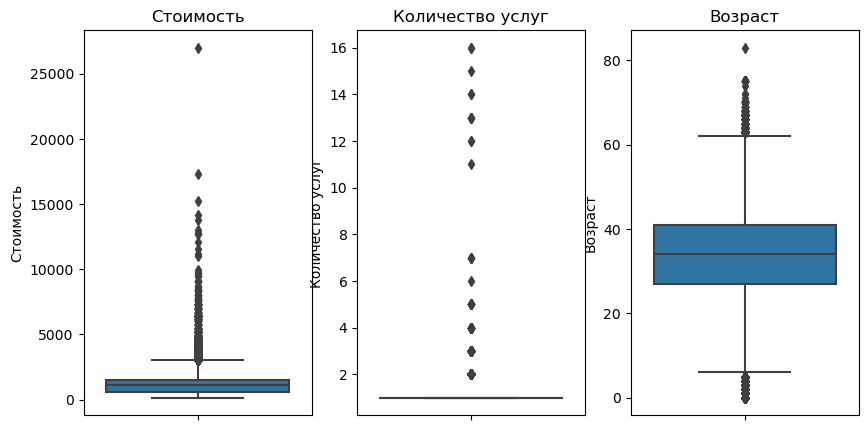

In [67]:
#визуализируем разброс значений
plt.figure(figsize=(10, 5))

# amount
ax1 = plt.subplot(1, 3, 1)
box = sns.boxplot(y=data['service_amount'], data=data)
plt.title('Стоимость')
plt.ylabel('Стоимость')

# number
ax2 = plt.subplot(1, 3, 2)
box = sns.boxplot(y=data['service_number'], data=data)
plt.title('Количество услуг')
plt.ylabel('Количество услуг')
    
# age
ax3 = plt.subplot(1, 3, 3)
box = sns.boxplot(y=data['age_for_service_date'], data=data)
plt.title('Возраст')
plt.ylabel('Возраст')
    
plt.show();

Большинство услуг стоят не дороже 3000, причем как правило - это цена одной оказываемой услуги для клиента в возрасте от 6 до 62 лет. Рассчитаем объем выбросов.

In [68]:
#введем функцию для расчета выбросов
def outers(data, col):
    print('Выбросы для ', col)
    print('Нижняя граница выбросов ', data[col].quantile(0.25)-st.iqr(data[col])*1.5)

    print('Количество выбросов ниже границы', data.loc[(data[col]<(data[col].quantile(0.25)-st.iqr(data[col])*1.5)), 
          col].count())

    print('Верхняя граница выбросов ', data[col].quantile(0.75)+st.iqr(data[col])*1.5)

    print('Количество выбросов выше границы', data.loc[(data[col]>(data[col].quantile(0.75)+st.iqr(data[col])*1.5)), 
          col].count())

    print('Доля выбросов', ((data.loc[(data[col]<(data[col].quantile(0.25)-st.iqr(data[col])*1.5)), 
            col].count()
      +data.loc[(data[col]>(data[col].quantile(0.75)+st.iqr(data[col])*1.5)), 
             col].count())
     /start[0]))
    return

In [69]:
#рассчитаем выбросы по стоимости услуг
outers(data, 'service_amount')

Выбросы для  service_amount
Нижняя граница выбросов  -920.0
Количество выбросов ниже границы 0
Верхняя граница выбросов  3000.0
Количество выбросов выше границы 2720
Доля выбросов 0.031861682812262065


In [70]:
data.loc[(data['service_amount']>3000)].head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category,age_category
12394,32631705803,2022-05-23,Прием первичный,3350,1,1072833,2,24,2022,5,21,Прием первичный,"Прием, консультация специалиста",3350.0,1522.69,выше среднего,молодежь
52080,32978656903,2022-07-28,Эзофагогастродуоденоскопия,3090,1,1055645,2,33,2022,7,30,Эндоскопия,Диагностика,3090.0,2797.75,дорогостоящие услуги,молодежь
52081,32978662403,2022-07-02,Эзофагогастродуоденоскопия,3090,1,935416,1,40,2022,7,26,Эндоскопия,Диагностика,3090.0,2797.75,дорогостоящие услуги,молодежь
52082,32978673303,2022-07-14,Эзофагогастродуоденоскопия,3090,1,1217347,2,45,2022,7,28,Эндоскопия,Диагностика,3090.0,2797.75,дорогостоящие услуги,взрослые
52083,32978677003,2022-07-16,Эзофагогастродуоденоскопия,3090,1,1074362,1,55,2022,7,28,Эндоскопия,Диагностика,3090.0,2797.75,дорогостоящие услуги,взрослые


In [71]:
data.loc[(data['service_amount']>10000)].head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category,age_category
70524,30961590803,2021-06-06,Вскрытие абсцесса различной локализации,12810,2,181718,2,34,2021,6,22,Хирургия,Оперативные вмешательства,6405.0,6550.00,дорогостоящие услуги,молодежь
79999,33177813203,2022-08-26,МРТ коленного сустава,13000,2,1306792,2,27,2022,8,34,Магнитно-резонансная томография,Диагностика,6500.0,6267.62,дорогостоящие услуги,молодежь
82634,30620826503,2021-04-13,МСКТ почек и надпочечников с внутривенным болю...,11025,1,544444,1,31,2021,4,15,Компьютерная томография,Диагностика,11025.0,11025.00,дорогостоящие услуги,молодежь
83000,33177813903,2022-08-25,Вскрытие абсцедирующего фурункула,11200,2,1302507,2,33,2022,8,34,Хирургия,Оперативные вмешательства,5600.0,5018.92,дорогостоящие услуги,молодежь
83372,30961493203,2021-06-17,МРТ брюшной полости и забрюшинного пространств...,17325,1,634755,1,41,2021,6,24,Магнитно-резонансная томография,Диагностика,17325.0,17325.00,дорогостоящие услуги,взрослые


Услуги с высокой стоимостью в базе данных - это дорогостоящая диагностика, анализы или прием специалиста высокого класса. Такими услугами пользуются редко, но удалять эти выбросы мы не будем, поскольку это исказит картину в отношении выручки от услуг данного ценового сегмента.

In [72]:
#рассчитаем выбросы по количеству услуг
outers(data, 'service_number')

Выбросы для  service_number
Нижняя граница выбросов  1.0
Количество выбросов ниже границы 0
Верхняя граница выбросов  1.0
Количество выбросов выше границы 1562
Доля выбросов 0.018297039909100494


In [73]:
data.loc[(data['service_number']==2)].head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category,age_category
15070,30786017903,2021-05-19,"Взятие материала на посев, цитологическое иссл...",568,2,237502,1,38,2021,5,20,Оториноларингология,Забор биоматериала,284.0,293.53,низкая цена,молодежь
15072,30786084303,2021-05-18,"Взятие материала на посев, цитологическое иссл...",568,2,596534,2,47,2021,5,20,Оториноларингология,Забор биоматериала,284.0,293.53,низкая цена,взрослые
15108,31408875903,2021-09-29,"Взятие материала на посев, цитологическое иссл...",568,2,698364,1,34,2021,9,39,Оториноларингология,Забор биоматериала,284.0,293.53,низкая цена,молодежь
15137,31680749303,2021-11-02,"Взятие материала на посев, цитологическое иссл...",600,2,716096,1,29,2021,11,44,Оториноларингология,Забор биоматериала,300.0,293.53,низкая цена,молодежь
15148,31814116403,2021-12-07,"Взятие материала на посев, цитологическое иссл...",600,2,716096,1,29,2021,12,49,Оториноларингология,Забор биоматериала,300.0,293.53,низкая цена,молодежь


In [74]:
data.loc[(data['service_number']>10)].head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_year,service_month,service_week,med_category,service_type,price,mean_price,price_category,age_category
82735,30620900003,2021-04-03,Постановка кожных аллергопроб (за 1 единицу),2772,12,512453,1,29,2021,4,13,Аллергология,Забор биоматериала,231.0,238.0,низкая цена,молодежь
82736,30786052903,2021-05-01,Постановка кожных аллергопроб (за 1 единицу),2541,11,512572,2,35,2021,5,17,Аллергология,Забор биоматериала,231.0,238.0,низкая цена,молодежь
82737,30786062803,2021-05-15,Постановка кожных аллергопроб (за 1 единицу),3003,13,363075,2,34,2021,5,19,Аллергология,Забор биоматериала,231.0,238.0,низкая цена,молодежь
82738,30786241403,2021-05-15,Постановка кожных аллергопроб (за 1 единицу),3003,13,596505,1,33,2021,5,19,Аллергология,Забор биоматериала,231.0,238.0,низкая цена,молодежь
82745,31680597403,2021-11-20,Постановка кожных аллергопроб (за 1 единицу),3840,16,544906,1,31,2021,11,46,Аллергология,Забор биоматериала,240.0,238.0,низкая цена,молодежь


Количество услуг, превышающее пороговое значение, является закономерным с точки зрения технологии оказания медицинских услуг. Это редкие случаи, но удалению они не подлежат, более того при расчете средней цены мы будем их учитывать для расчета цены за одну услугу.

In [75]:
#рассчитаем выбросы по возрасту
outers(data, 'age_for_service_date')

Выбросы для  age_for_service_date
Нижняя граница выбросов  6.0
Количество выбросов ниже границы 3018
Верхняя граница выбросов  62.0
Количество выбросов выше границы 1074
Доля выбросов 0.04793309046609425


Также закономерная картина - клиентами чаще являются работающие взрослые, дети дошкольного возраста и пенсионеры реже обращаются к услугам клиники. Однако, учитывая позиционирование клиники на рынке как семейной, удаление данных нецелесообразно, так как, во-первых, мы значительно уменьшим объем данных, во-вторых, скорее всего и самых юных и возрастных клиентов приводят в клинику как раз наша основная категория клиентов - работающие взрослые.



### Вывод <a id='summary_start'></a> 

<p></p>

<div style="border:solid green 2px; padding: 20px">

В исследовании анализируется информация о 85369 услугах, оказанных медицинским центром.<p>
На этапе предобработки частично заполнены пропуски в данных о поле клиентов, оставшиеся пропуски удалены. Приведен в формат datetime столбец с информацией о дате оказания услуги. Датафрейм дополнен столбцами с указанием медицинской категории на основе информации с сайта клиента и типа оказываемой услуги.  Кроме того добавлены категории для услуг по цене и для клиентов по возрасной группе.<p>
Данные об оказываемых услугах по годам представлены неравномерно: в 2021 году за весь год, в 2022 - только 3 квартала. Информация сохранена в полном объеме, но в статистическом анализе данных 4 квартал 2021 года будет исключен. Созданы столбцы с годом, месяцем и неделей оказания услуги для анализа цены услуги в динамике.<p>
Выбросы в числовых данных по стоимости, количеству услуг и возрасту клиента вполне закономерны и оставлены для анализа в полном объеме.
       
</div>

## Шаг 2. Исследовательский анализ данных. <a id='analysis'></a> 

#### Оценим выручку клиники по месяцам:<a id='month_revenue'></a> 

In [76]:
#готовим таблицу с данными
revenue = data.groupby(by=['service_month', 'service_year'], group_keys=False).agg(
    {'service_amount':'sum', 'service_number':'sum', 'insured':'nunique'})
revenue['service_price_mean'] = (revenue['service_amount']/revenue['service_number']).round(2)
revenue['service_number_mean'] = (revenue['service_number']/revenue['insured']).round(2)
revenue['service_paycheck_mean'] = (revenue['service_amount']/revenue['insured']).round(2)
revenue=revenue.reset_index()
revenue.head(5)

,service_month,service_year,service_amount,service_number,insured,service_price_mean,service_number_mean,service_paycheck_mean
0,1,2021,2265931,2071,286,1094.12,7.24,7922.84
1,1,2022,4800320,4234,555,1133.76,7.63,8649.23
2,2,2021,2379125,2155,309,1104.00,6.97,7699.43
3,2,2022,5298235,4694,589,1128.72,7.97,8995.31
4,3,2021,3927248,3773,446,1040.88,8.46,8805.49


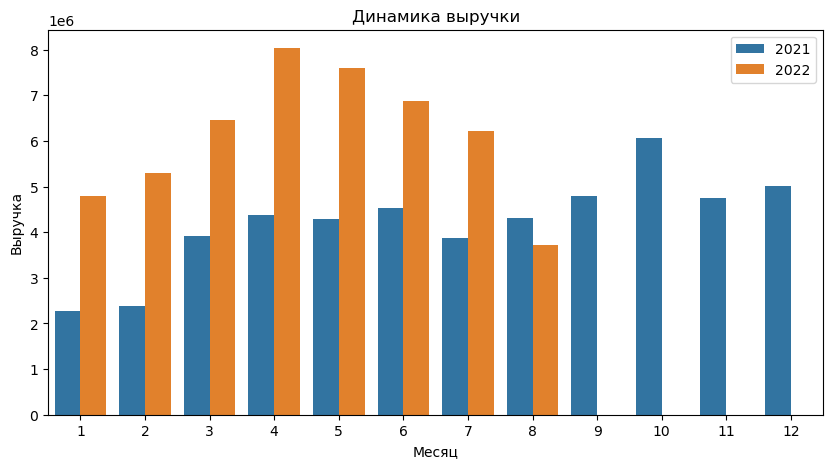

In [77]:
#визуализируем динамику выручки по месяцам
plt.figure(figsize=(10, 5))
sns.barplot(revenue, y='service_amount', x='service_month', hue='service_year')
plt.title('Динамика выручки')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(loc='upper right')
plt.show();

In [78]:
#оценим разницу между показателями по всем доступным данным
revenue_year = data.groupby(by='service_year', group_keys=False).agg(
    {'service_amount':'sum', 'service_number':'sum', 'insured':'nunique'})
revenue_year['service_price_mean'] = (revenue_year['service_amount']/revenue_year['service_number']).round(2)
revenue_year['service_number_mean'] = (revenue_year['service_number']/revenue_year['insured']).round(2)
revenue_year['service_paycheck_mean'] = (revenue_year['service_amount']/revenue_year['insured']).round(2)
revenue_year.loc['dinamic'] = ((100*revenue_year.loc[2022]/revenue_year.loc[2021]-100).round(2))
revenue_year

,service_amount,service_number,insured,service_price_mean,service_number_mean,service_paycheck_mean
service_year,,,,,,
2021,50556105.0,45489.00,2514.00,1111.39,18.09,20109.83
2022,48986662.0,41828.00,2757.00,1171.15,15.17,17768.10
dinamic,-3.1,-8.05,9.67,5.38,-16.14,-11.64


Выручка клиники за 8 месяцев 2022 года всего на 3% ниже выручки за весь 2021 год, количество оказанных услуг ниже на 8%, а  количество обслуживаемых клиентов возросло почти на 10%. Средняя цена за одну услугу выросла на 5%, а выручка с одного клиента снизилась более чем на 11%, как и количество услуг, которое снизилось на 16%. 

In [79]:
#оценим разницу между показателями за 8 месяцев
revenue_8 = data.query('service_month<9').groupby(by='service_year', group_keys=False).agg(
    {'service_amount':'sum', 'service_number':'sum', 'insured':'nunique'})
revenue_8['service_price_mean'] = (revenue_8['service_amount']/revenue_8['service_number']).round(2)
revenue_8['service_number_mean'] = (revenue_8['service_number']/revenue_8['insured']).round(2)
revenue_8['service_paycheck_mean'] = (revenue_8['service_amount']/revenue_8['insured']).round(2)
revenue_8.loc['dinamic'] = ((100*revenue_8.loc[2022]/revenue_8.loc[2021]-100).round(2))
revenue_8

,service_amount,service_number,insured,service_price_mean,service_number_mean,service_paycheck_mean
service_year,,,,,,
2021,29951986.00,27400.00,1732.00,1093.14,15.82,17293.29
2022,48986662.00,41828.00,2757.00,1171.15,15.17,17768.10
dinamic,63.55,52.66,59.18,7.14,-4.11,2.75


Выручка клиники за 8 месяцев 2022 года на 63.55% выше выручки за соответствующий период 2021 года, количество оказанных услуг и обслуживаемых клиентов также возросли более чем на 50%. А вот динамика цены за одну услугу и выручка с одного клиента выросли незначительно - на 7 и 2%% соответственно, однако количество услуг на одного клиента снизилось на 4%. Оценим данные показатели в динамике по месяцам.

#### Изучим изменение показателей по месяцам:<a id='month_dinamics'></a> 

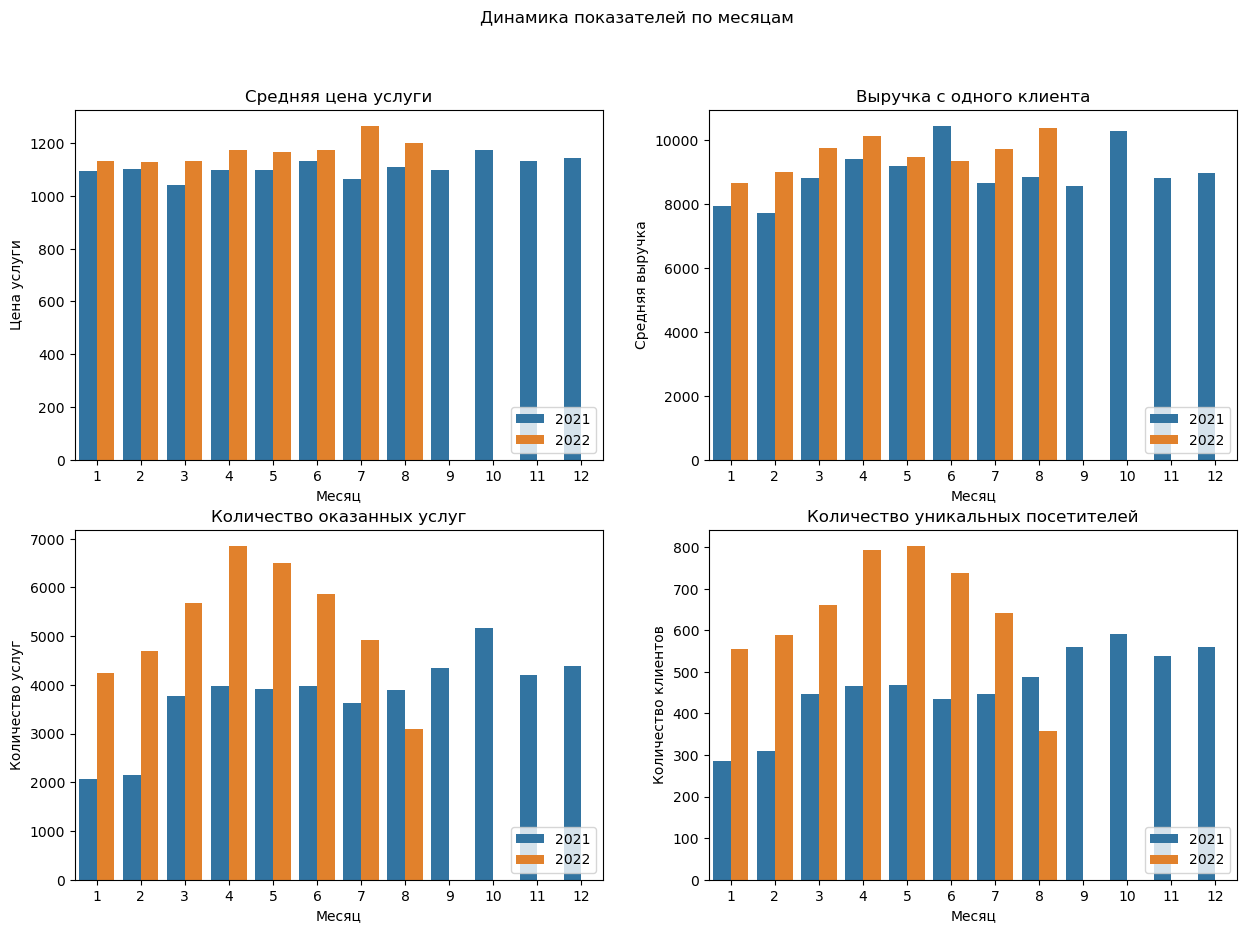

In [80]:
#визуализируем динамику выручки по месяцам
plt.figure(figsize=(15, 10))
plt.suptitle('Динамика показателей по месяцам', fontsize='large')

ax1 = plt.subplot(2, 2, 1)
sns.barplot(revenue, y='service_price_mean', x='service_month', hue='service_year')
plt.title('Средняя цена услуги')
plt.xlabel('Месяц')
plt.ylabel('Цена услуги')
plt.legend(loc='lower right')

ax2 = plt.subplot(2, 2, 2)
sns.barplot(revenue, y='service_paycheck_mean', x='service_month', hue='service_year')
plt.title('Выручка с одного клиента')
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка')
plt.legend(loc='lower right')

ax3 = plt.subplot(2, 2, 3)
sns.barplot(revenue, y='service_number', x='service_month', hue='service_year')
plt.title('Количество оказанных услуг')
plt.xlabel('Месяц')
plt.ylabel('Количество услуг')
plt.legend(loc='lower right')

ax4 = plt.subplot(2, 2, 4)
sns.barplot(revenue, y='insured', x='service_month', hue='service_year')
plt.title('Количество уникальных посетителей')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.legend(loc='lower right')

plt.show();

Средняя цена одной услуги в каждый анализируемый месяц в 2022 году немного выше, чем в 2021, однако, требуется проверить, является ли эта разница статистически значимой. <p>
Рост выручки с одного клиента в анализируемый период наблюдается в 7 месяцах из 8, в абсолютных показателях разница в выручке с одного посетителя составляет менее 500 рублей. <p>
    
Наиболее ярко на диаграммах видны различия по количеству оказанных услуг и количеству уникальных посетителей. Здесь отмечается несколько точек роста:<p>
- резко выросло количество клиентов и услуг с марта 2021 года. Скорее всего это было связано с началом снятия ограничений, связанных с пандемией коронавируса, этот процесс начался в конце января 2021 года;<p>
- после этого наблюдается плато как по количеству услуг, так и клиентов, с небольшим пиком в период осенних месяцев;<p>
- в первые месяцы 2022 года сохраняется небольшая положительная динамика, в целом соответствующая уровню 4 квартала предыдущего года;<p>
- резкий рост количества оказываемых услуг и посещений отмечается с марта по июнь 2022 года, после которого происходит возвращение к среднему уровню и даже снижение в августе 2022 года. Ключевым событием, предшествующим росту количества клиентов, является начало СВО, в связи с чем одной из причин увеличения потока клиентов может быть активная миграция граждан в последующие месяцы. 

#### Изучим динамику количества услуг по посещениям и медицинским кейсам:<a id='visits&cases'></a> 

In [81]:
#готовим таблицу с данными по посещениям
visits = data.groupby(by=['insured', 'service_date'], group_keys=False).agg(
    {'sex_id':'min', 'age_for_service_date':'min', 'service_year':'min', 'service_month':'min', 
     'service_amount':'sum', 'service_number':'sum'})
visits['service_price_mean'] = (visits['service_amount']/visits['service_number']).round(2)
visits=visits.sort_values(by=['insured', 'service_date']).reset_index()
visits.head(5)

,insured,service_date,sex_id,age_for_service_date,service_year,service_month,service_amount,service_number,service_price_mean
0,125073,2021-01-11,2,65,2021,1,2321,3,773.67
1,125073,2021-01-16,2,65,2021,1,1827,1,1827.00
2,125073,2021-01-17,2,65,2021,1,3813,2,1906.50
3,125073,2021-01-23,2,65,2021,1,1313,1,1313.00
4,125073,2021-09-21,2,66,2021,9,2940,2,1470.00


In [82]:
# проверим различия по цене статистически
alpha=0.05
t_result = st.ttest_ind(visits.query('service_year==2021')['service_amount'], 
                        visits.query('service_year==2022')['service_amount'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в средней стоимости услуг составляют {0:.1%}'.
      format(visits.query('service_year==2021')['service_amount'].mean()/
             visits.query('service_year==2022')['service_amount'].mean()-1)) 

p-value = 1.0833795912787844e-10
Отвергаем нулевую гипотезу
Различия в средней стоимости услуг составляют -6.1%


In [83]:
# проверим различия по количеству услуг статистически
t_result = st.ttest_ind(visits.query('service_year==2021')['service_number'], visits.query('service_year==2022')['service_number'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в среднем количестве услуг составляют {0:.1%}'.
      format(visits.query('service_year==2021')['service_number'].mean()/visits.query('service_year==2022')['service_number'].mean()-1)) 

p-value = 0.3919191812366998
Не получилось отвергнуть нулевую гипотезу
Различия в среднем количестве услуг составляют -1.0%


In [84]:
#рассчитаем медицинские кейсы
visits.loc[0,'med_case'] = 1

for row in range(1, (len(visits))):
    if (visits.loc[row,'insured']!=visits.loc[(row-1),'insured']):
        visits.loc[row,'med_case'] = 1
    else:
        if (visits.loc[row,'service_date']-visits.loc[(row-1),'service_date']).days<=14:
            visits.loc[row,'med_case'] = visits.loc[(row-1),'med_case']
        else:
            visits.loc[row,'med_case'] = visits.loc[(row-1),'med_case']+1

visits.head(5)

,insured,service_date,sex_id,age_for_service_date,service_year,service_month,service_amount,service_number,service_price_mean,med_case
0,125073,2021-01-11,2,65,2021,1,2321,3,773.67,1.0
1,125073,2021-01-16,2,65,2021,1,1827,1,1827.00,1.0
2,125073,2021-01-17,2,65,2021,1,3813,2,1906.50,1.0
3,125073,2021-01-23,2,65,2021,1,1313,1,1313.00,1.0
4,125073,2021-09-21,2,66,2021,9,2940,2,1470.00,2.0


In [85]:
#консолидируем данные по медицинским кейсам
cases = visits.groupby(by=['insured', 'med_case'], group_keys=False).agg(
    {'sex_id':'min', 'age_for_service_date':'min', 'service_year':'min', 'service_month':'min', 
     'service_date':['min','max', 'count'], 'service_amount':'sum', 'service_number':'sum'})
cases.columns =['sex_id', 'age_for_service_date', 'service_year', 'service_month', 
     'service_date_first', 'service_date_last', 'visits_number', 'service_amount', 'service_number']
cases['service_price_mean'] = (cases['service_amount']/cases['service_number']).round(2)
cases['case_timedelta'] = (cases['service_date_last'] - cases['service_date_first'])
cases=cases.reset_index()
cases.head(5)

,insured,med_case,sex_id,age_for_service_date,service_year,service_month,service_date_first,service_date_last,visits_number,service_amount,service_number,service_price_mean,case_timedelta
0,125073,1.0,2,65,2021,1,2021-01-11,2021-01-23,4,9274,7,1324.86,12 days
1,125073,2.0,2,66,2021,9,2021-09-21,2021-10-05,6,16246,13,1249.69,14 days
2,125073,3.0,2,66,2021,11,2021-11-16,2021-11-28,5,7560,7,1080.00,12 days
3,125094,1.0,2,43,2021,1,2021-01-22,2021-01-29,2,4479,4,1119.75,7 days
4,125094,2.0,2,44,2021,10,2021-10-06,2021-10-11,2,15280,9,1697.78,5 days


In [86]:
# проверим различия по цене статистически
t_result = st.ttest_ind(cases.query('service_year==2021')['service_amount'], 
                        cases.query('service_year==2022')['service_amount'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в средней цене услуг составляют {0:.1%}'.
      format(cases.query('service_year==2021')['service_amount'].mean()/
             cases.query('service_year==2022')['service_amount'].mean()-1)) 

p-value = 0.5664105669016228
Не получилось отвергнуть нулевую гипотезу
Различия в средней цене услуг составляют -1.7%


In [87]:
# проверим различия по количеству услуг статистически
t_result = st.ttest_ind(cases.query('service_year==2021')['service_number'], 
                        cases.query('service_year==2022')['service_number'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в среднем количестве услуг составляют {0:.1%}'.
      format(cases.query('service_year==2021')['service_number'].mean()/
             cases.query('service_year==2022')['service_number'].mean()-1)) 

p-value = 0.3203427437303527
Не получилось отвергнуть нулевую гипотезу
Различия в среднем количестве услуг составляют 2.9%


In [88]:
#готовим таблицу с данными по посещениям
visits_revenue = visits.groupby(by=['service_month', 'service_year'], group_keys=False).agg(
    {'service_amount':'sum', 'service_number':'sum', 'insured':'count'})
visits_revenue['visits_amount_mean'] = (visits_revenue['service_amount']/visits_revenue['insured']).round(2)
visits_revenue['visits_service_mean'] = (visits_revenue['service_number']/visits_revenue['insured']).round(2)
visits_revenue=visits_revenue.reset_index()
visits_revenue.head(5)

,service_month,service_year,service_amount,service_number,insured,visits_amount_mean,visits_service_mean
0,1,2021,2265931,2071,743,3049.71,2.79
1,1,2022,4800320,4234,1413,3397.25,3.00
2,2,2021,2379125,2155,803,2962.80,2.68
3,2,2022,5298235,4694,1551,3416.01,3.03
4,3,2021,3927248,3773,1180,3328.18,3.20


In [89]:
#готовим таблицу с данными по кейсам
cases_revenue = cases.groupby(by=['service_month', 'service_year'], group_keys=False).agg(
    {'service_amount':'sum', 'service_number':'sum', 'insured':'count', 'visits_number':'mean'})
cases_revenue['cases_amount_mean'] = (cases_revenue['service_amount']/cases_revenue['insured']).round(2)
cases_revenue['cases_service_mean'] = (cases_revenue['service_number']/cases_revenue['insured']).round(2)
cases_revenue=cases_revenue.reset_index()
cases_revenue.head(5)

,service_month,service_year,service_amount,service_number,insured,visits_number,cases_amount_mean,cases_service_mean
0,1,2021,5526218,4754,369,4.617886,14976.20,12.88
1,1,2022,4960030,4490,499,3.014028,9939.94,9.00
2,2,2021,2919863,2649,267,3.610487,10935.82,9.92
3,2,2022,6423505,5525,490,3.818367,13109.19,11.28
4,3,2021,4658016,4369,400,3.640000,11645.04,10.92


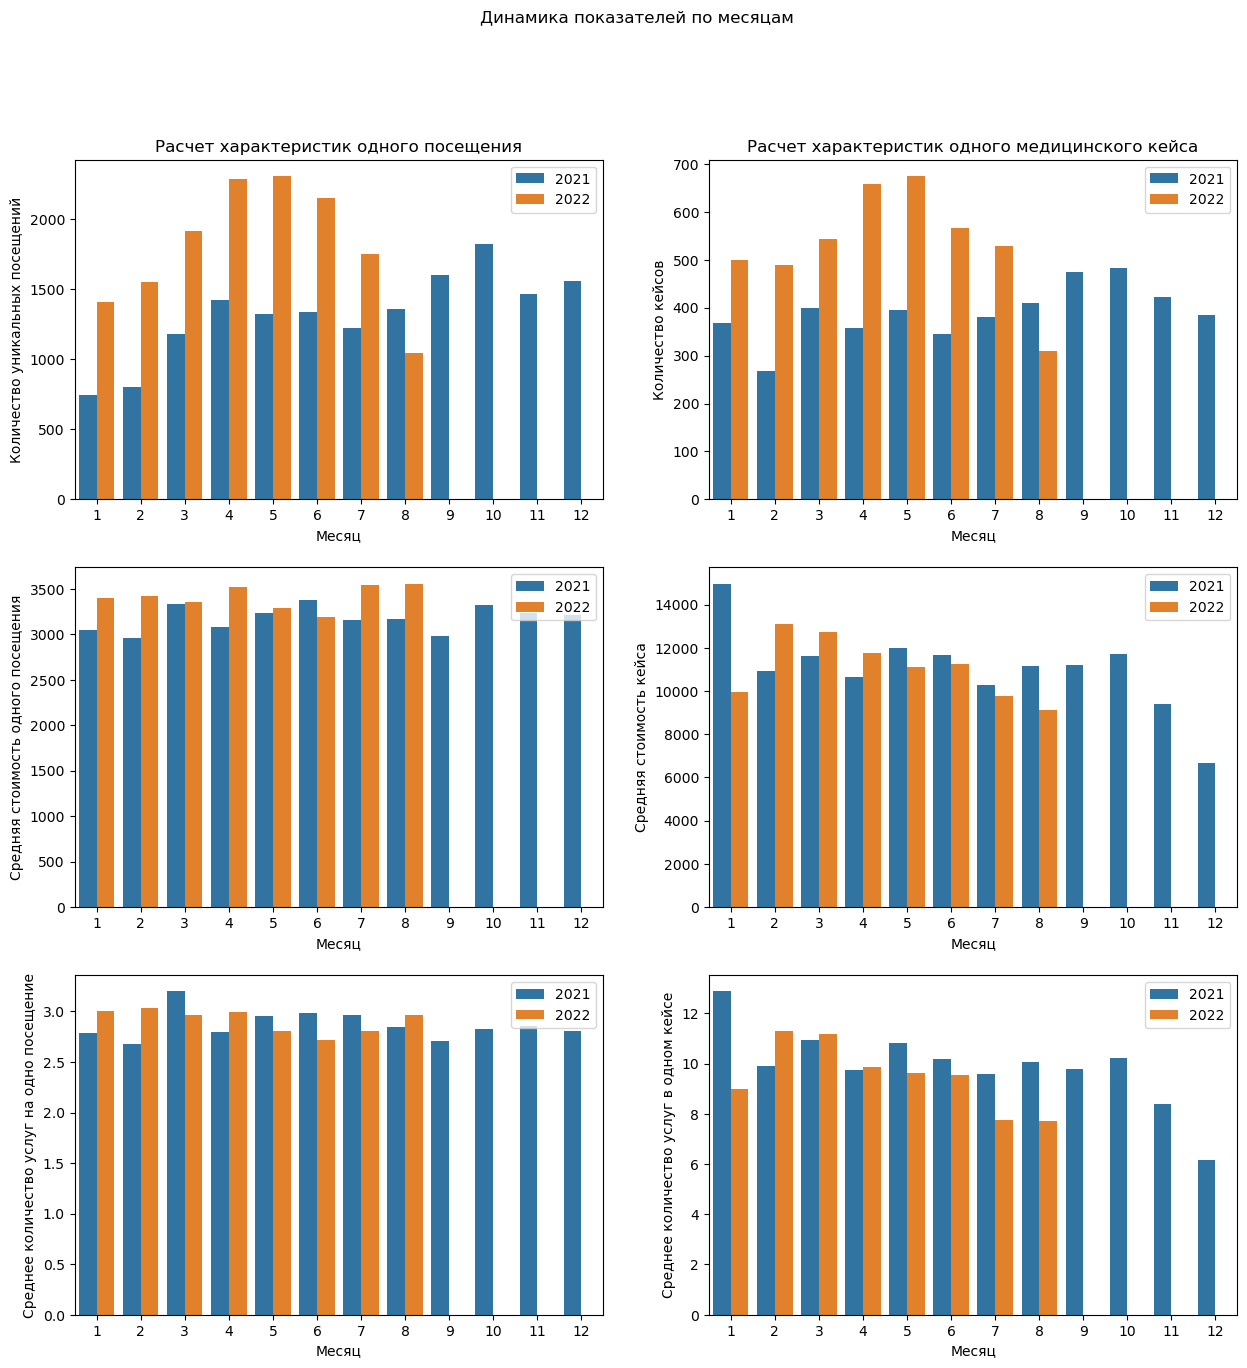

In [90]:
#визуализируем динамику показателей по месяцам
plt.figure(figsize=(15, 15))
plt.suptitle('Динамика показателей по месяцам', fontsize='large')

ax1 = plt.subplot(3, 2, 1)
sns.barplot(visits_revenue, y='insured', x='service_month', hue='service_year')
plt.title('Расчет характеристик одного посещения')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных посещений')
plt.legend(loc='upper right')


ax3 = plt.subplot(3, 2, 3)
sns.barplot(visits_revenue, y='visits_amount_mean', x='service_month', hue='service_year')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость одного посещения')
plt.legend(loc='upper right')

ax5 = plt.subplot(3, 2, 5)
sns.barplot(visits_revenue, y='visits_service_mean', x='service_month', hue='service_year')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество услуг на одно посещение')
plt.legend(loc='upper right')


ax2 = plt.subplot(3, 2, 2)
sns.barplot(cases_revenue, y='insured', x='service_month', hue='service_year')
plt.title('Расчет характеристик одного медицинского кейса')
plt.xlabel('Месяц')
plt.ylabel('Количество кейсов')
plt.legend(loc='upper right')

ax4 = plt.subplot(3, 2, 4)
sns.barplot(cases_revenue, y='cases_amount_mean', x='service_month', hue='service_year')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость кейса')
plt.legend(loc='upper right')

ax6 = plt.subplot(3, 2, 6)
sns.barplot(cases_revenue, y='cases_service_mean', x='service_month', hue='service_year')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество услуг в одном кейсе')
plt.legend(loc='upper right')

plt.show();

Количество посещений и кейсов повторяет картину количества клиентов и оказываемых услуг, показывая рост в 2022 году относительно предыдущего периода. <p>
А вот в отношении стоимости и количества услуг одного посещения или медицинского кейса таких явных тенденций не наблюдается, ситуация от месяца к месяцу различается, статистическая проверка также не обнаруживает различий за исключением разницы в стоимости одного посещения, но его рост сопоставим со средним уровнем роста цен на услуги.  

#### Оценим востребованность и изменение цены различных услуг:<a id='services'></a> 

In [91]:
#выделим для анализа месяцы с января по август
data_8 = data.query('service_month<9')

In [92]:
#консолидируем информацию по услугам
service_rank = data_8.pivot_table(index='service_name', columns='service_year', 
                                  values=['service_number', 'service_amount'], aggfunc='sum')
service_rank.columns=['2021_amount','2022_amount','2021_number','2022_number']
service_rank['2021_price'] = (service_rank['2021_amount']/service_rank['2021_number']).round(2)
service_rank['2022_price'] = (service_rank['2022_amount']/service_rank['2022_number']).round(2)
service_rank['number_change'] = (100*(service_rank['2022_number']-service_rank['2021_number'])/
                                 service_rank['2021_number']).round(2)
service_rank['price_change'] = (100*(service_rank['2022_price']-service_rank['2021_price'])/
                                service_rank['2021_price']).round(2)
service_rank=service_rank.sort_values(by='price_change', ascending=False).reset_index()
service_rank.head(10)

,service_name,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
0,Прием врача-эксперта,157922.0,563890.0,47.0,142.0,3360.04,3971.06,202.13,18.18
1,Введение лекарственных препаратов в наружный с...,3682.0,1232.0,14.0,4.0,263.00,308.00,-71.43,17.11
2,Интерпретация результатов Диаскинтеста,1103.0,1280.0,1.0,1.0,1103.00,1280.00,0.00,16.05
3,Herpes simplex virus 1 IgM,2995.0,690.0,5.0,1.0,599.00,690.00,-80.00,15.19
4,Mycoplasma pneumoniae IgG,1797.0,690.0,3.0,1.0,599.00,690.00,-66.67,15.19
5,Herpes simplex virus 1 IgG,2396.0,690.0,4.0,1.0,599.00,690.00,-75.00,15.19
6,Chlamydia pneumoniae IgG,1797.0,690.0,3.0,1.0,599.00,690.00,-66.67,15.19
7,Проведение Диаскинтеста,1365.0,1570.0,1.0,1.0,1365.00,1570.00,0.00,15.02
8,Ультразвуковое исследование большие сроки бере...,9135.0,3500.0,3.0,1.0,3045.00,3500.00,-66.67,14.94
9,"Ureaplasma spp, (Соскоб)",840.0,480.0,2.0,1.0,420.00,480.00,-50.00,14.29


Максимальный рост цены услуги в 2022 году составляет более 18% за прием врача-эксперта, уровень интереса клиентов к данной услуге также значительно возрос - в 3 раза относительно 2021 года. Посмотрим на рост цены наиболее популярных услуг. 

In [93]:
#выведем наиболее востребованые услуги
service_rank.loc[service_rank['2022_number']>500].sort_values(by='price_change', ascending=False)

,service_name,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
31,Взятие крови из периферической вены,206032.0,351628.0,1304.0,2030.0,158.00,173.22,55.67,9.63
65,Взятие мазка,211476.0,452082.0,621.0,1230.0,340.54,367.55,98.07,7.93
91,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",689535.0,1128850.0,995.0,1517.0,693.00,744.13,52.46,7.38
150,Гинекологический мазок,197400.0,344650.0,376.0,615.0,525.00,560.41,63.56,6.74
170,Общий анализ мочи,211621.0,326295.0,491.0,711.0,431.00,458.92,44.81,6.48
196,Прием повторный,4431375.0,7305600.0,3375.0,5242.0,1313.00,1393.67,55.32,6.14
217,Прием первичный,6759345.0,11453365.0,4598.0,7361.0,1470.06,1555.95,60.09,5.84
240,Лазеротерапия (1 сеанс),314416.0,633870.0,344.0,656.0,914.00,966.27,90.70,5.72
256,Интерференционные токи (1 сеанс) (4 поля),380640.0,642120.0,366.0,585.0,1040.00,1097.64,59.84,5.54
272,Магнитотерапия (1 сеанс),838240.0,1588620.0,806.0,1449.0,1040.00,1096.36,79.78,5.42


Услуги из десятки наиболее востребованных выросли в цене на 5-10%%, что соответствует среднему уровню роста цены. <p>
В тройку лидеров входят прием первичный и повторный, а также взятие крови из вены на анализы. 

In [94]:
#оценим влияние выбросов
service_rank.describe().round(2)

,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
count,588.00,599.00,588.00,599.00,588.00,599.00,446.00,446.00
mean,50938.75,81780.74,46.60,69.83,1579.01,1487.09,71.46,6.39
std,341274.25,569219.86,252.28,397.03,2096.23,1467.04,165.40,2.62
min,168.00,150.00,1.00,1.00,147.00,150.00,-96.88,-25.83
25%,1797.00,1851.00,1.00,2.00,565.25,605.00,-8.60,5.06
50%,5663.00,7290.00,5.00,6.00,1019.00,1076.88,32.20,5.82
75%,22087.50,29030.00,25.00,30.00,1827.00,1780.00,100.00,7.14
max,6759345.00,11453365.00,4598.00,7361.00,26999.00,9700.00,1566.67,18.18


При расчете по наименованиям услуг наиболее приближено к нормальному распределению только изменение по цене, для остальных показатели выбросы значительно сдвигают среднее в большую сторону.

In [95]:
#выведем услуги, показавшие наибольший рост востребованности
service_rank.sort_values(by='number_change', ascending=False).head()

,service_name,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
380,УВЧ-терапия (1 сеанс) (1 поле),3120.0,54500.0,3.0,50.0,1040.0,1090.00,1566.67,4.81
214,Иммобилизация нижней конечности с помощью гипс...,2436.0,36100.0,1.0,14.0,2436.0,2578.57,1300.00,5.85
35,Инстиляция мочевого пузыря,3654.0,39960.0,3.0,30.0,1218.0,1332.00,900.00,9.36
320,Цитологическое исследование стандартное жидкос...,2940.0,30900.0,1.0,10.0,2940.0,3090.00,900.00,5.10
204,Мануальная терапия (2 сегмента),30719.0,283180.0,13.0,113.0,2363.0,2506.02,769.23,6.05


In [96]:
#а также услуги, потерявшие интерес клиентов
service_rank.query('not price_change.isna()').sort_values(by='number_change', ascending=False).tail()

,service_name,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
349,Передняя тампонада носа,6114.0,1070.0,6.0,1.0,1019.0,1070.0,-83.33,5.00
360,Посев отделяемого из ушей с определением чувст...,7938.0,1190.0,7.0,1.0,1134.0,1190.0,-85.71,4.94
405,Посев на анаэробные бактерии с чувствительност...,12285.0,1430.0,9.0,1.0,1365.0,1430.0,-88.89,4.76
133,Гемостазиограмма (Коагулограмма: Антитромбин I...,41244.0,2100.0,21.0,1.0,1964.0,2100.0,-95.24,6.92
12,Прием на дому (до МКАД),218432.0,7660.0,64.0,2.0,3413.0,3830.0,-96.88,12.22


Наибольшие изменения по количеству услуг наблюдается среди услуг, не отличающихся высокой востребованностью именно за счет невысокого уровня в 2021 году, также как и значительное снижение в процентном отношении в абсолютных значениях невелико. 

In [97]:
#выведем услуги, упавшие в цене
service_rank.query('price_change<0')

,service_name,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
445,Исследование мокроты,809.0,600.0,1.0,1.0,809.0,600.0,0.0,-25.83


In [98]:
#оценим количество услуг, с отрицательной динамикой востребованности
service_rank.query('number_change<=0')['service_name'].nunique()

166

In [99]:
#оценим количество услуг с пропусками в динамике цены
len(service_rank.query('price_change.isna()'))

295

Снижение цены отмечается лишь для одной услуги. Снижение востребованности на фоне общего роста отмечается для 166 услуг. 295 наименований услуг невозможно оценить в динамике, поскольку они были востребованы только в один из сравниваемых периодов. 

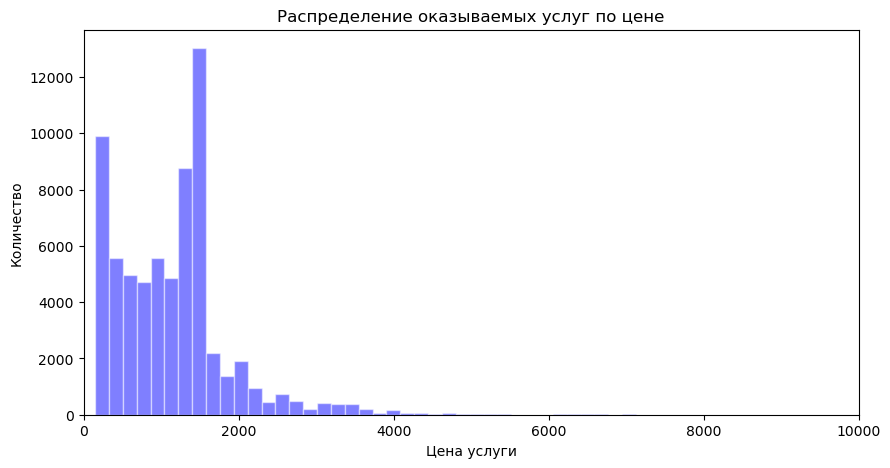

In [100]:
#визуализируем распределение по цене услуги
plt.figure(figsize=(10, 5))
plt.xlim(0,10000)
plt.hist(x=data_8['price'], bins=150, color='blue', alpha = 0.5, edgecolor='white')
plt.title('Распределение оказываемых услуг по цене')
plt.xlabel('Цена услуги')
plt.ylabel('Количество')
plt.show();

Средняя цена большинства наименований услуг, предоставляемых клиникой, не превышает 2000, хотя в максимуме приближается к 30000 за одну услугу. 

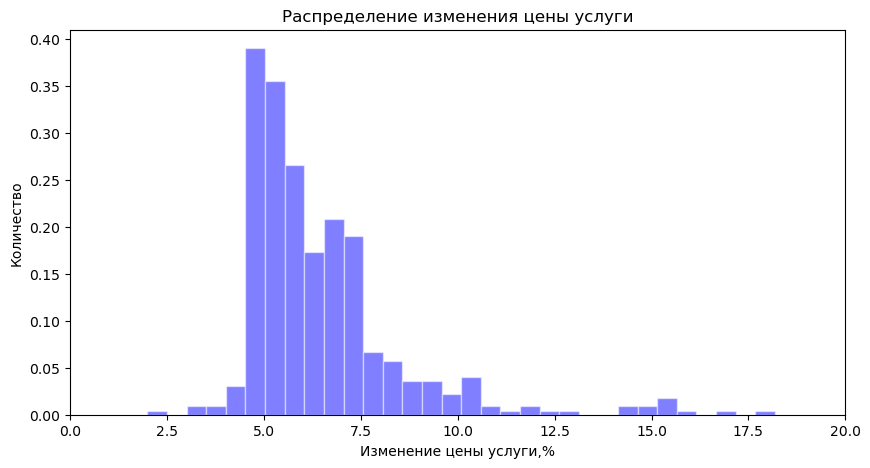

In [101]:
#визуализируем изменения в цене услуги
plt.figure(figsize=(10, 5))
plt.xlim(0,20)
plt.hist(x=service_rank['price_change'], bins=87, color='blue', alpha = 0.5, edgecolor='white', density=True)
plt.title('Распределение изменения цены услуги')
plt.xlabel('Изменение цены услуги,%')
plt.ylabel('Количество')
plt.show();

Основная масса услуг возросла в стоимости на 4.5-7.5%%. Рост цены более чем на 7.5% встречается чаще, чем значения ниже 4.5%.

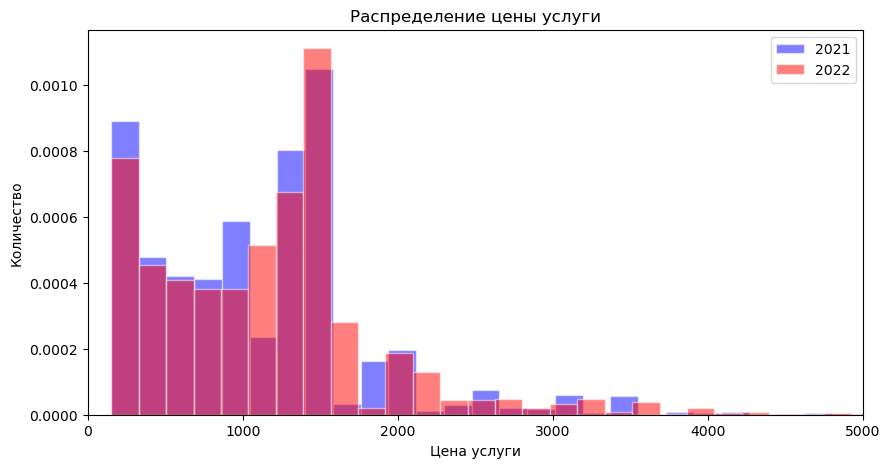

In [102]:
#сравним распределение по цене услуги на гистограмме
plt.figure(figsize=(10, 5))
plt.xlim(0,5000)
plt.hist(x=(data_8.query('service_year==2021')['price']), bins=150, 
         color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022')['price']), bins=54, 
         color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Распределение цены услуги')
plt.xlabel('Цена услуги')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.show();

Доля услуг стоимостью ниже 1000 снизилась в 2022 году, в отношении более дорогих услуг ситуация не столь однозначна, но в среднем их доля стала выше. Проверим это в отношении ценовых категорий.

#### Оценим динамику востребованности услуг различных ценовых сегментов: <a id='price'></a> 

In [103]:
#готовим таблицу для визуализации
price_qcut_table = data_8.pivot_table(index='price_category', columns='service_year', 
                                      values=['service_number', 'service_amount'], aggfunc='sum').reset_index()
price_qcut_table.columns=['price_category','2021_amount','2022_amount','2021_number','2022_number']
price_qcut_table['2021_price'] = (price_qcut_table['2021_amount']/price_qcut_table['2021_number']).round(2)
price_qcut_table['2022_price'] = (price_qcut_table['2022_amount']/price_qcut_table['2022_number']).round(2)
price_qcut_table['2021_number'] = (100*price_qcut_table['2021_number'].
                                   div(price_qcut_table['2021_number'].sum(), axis=0)).round(2)
price_qcut_table['2022_number'] = (100*price_qcut_table['2022_number'].
                                   div(price_qcut_table['2022_number'].sum(), axis=0)).round(2)
price_qcut_table['price_change'] = (100*(price_qcut_table['2022_price']-price_qcut_table['2021_price'])/
                                price_qcut_table['2021_price']).round(2)
price_qcut_table.head(5)

,price_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,price_change
0,выше среднего,16614055,28062585,40.46,42.31,1498.52,1585.55,5.81
1,дорогостоящие услуги,4855183,7029420,5.46,5.09,3245.44,3303.30,1.78
2,ниже среднего,2585508,3936265,14.80,13.98,637.77,673.10,5.54
3,низкая цена,2016720,2928817,25.21,22.82,291.98,306.84,5.09
4,средний уровень,3880520,7029575,14.07,15.80,1006.36,1063.80,5.71


In [104]:
#создадим функцию для сортировки данных

def sort_qcut(df):
    for row in range(len(df)):
        if df.loc[row, 'price_category'] == 'низкая цена':
            df.loc[row, 'sort'] = 1
        elif df.loc[row, 'price_category'] == 'ниже среднего':
            df.loc[row, 'sort'] = 2
        elif df.loc[row, 'price_category'] == 'средний уровень':
            df.loc[row, 'sort'] = 3
        elif df.loc[row, 'price_category'] == 'выше среднего':
            df.loc[row, 'sort'] = 4
        elif df.loc[row, 'price_category'] == 'дорогостоящие услуги':
            df.loc[row, 'sort'] = 5
    df = df.sort_values(by='sort')
    return df

In [105]:
price_qcut_table = sort_qcut(price_qcut_table)

price_qcut_table

,price_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,price_change,sort
3,низкая цена,2016720,2928817,25.21,22.82,291.98,306.84,5.09,1.0
2,ниже среднего,2585508,3936265,14.80,13.98,637.77,673.10,5.54,2.0
4,средний уровень,3880520,7029575,14.07,15.80,1006.36,1063.80,5.71,3.0
0,выше среднего,16614055,28062585,40.46,42.31,1498.52,1585.55,5.81,4.0
1,дорогостоящие услуги,4855183,7029420,5.46,5.09,3245.44,3303.30,1.78,5.0


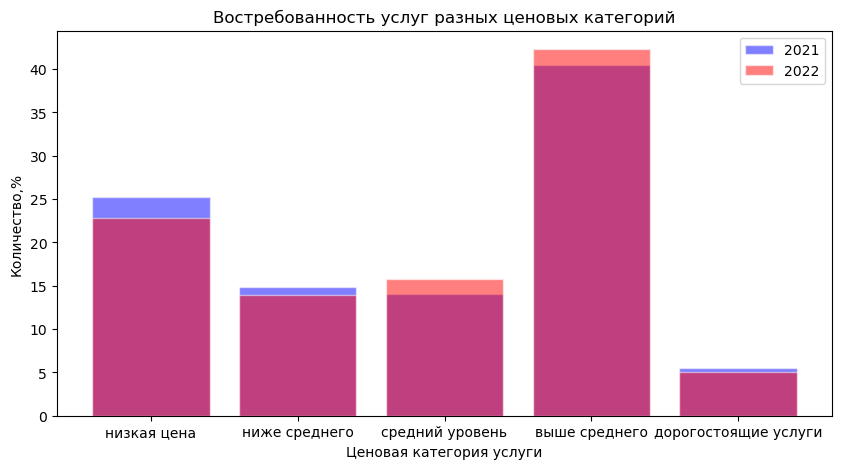

In [106]:
#визуализируем востребованность услуг различных ценовых категорий
plt.figure(figsize=(10, 5))
plt.bar(x=price_qcut_table['price_category'], height=price_qcut_table['2021_number'],
         color='blue', alpha = 0.5, edgecolor='white', label='2021')
plt.bar(x=price_qcut_table['price_category'], height=price_qcut_table['2022_number'], 
         color='red', alpha = 0.5, edgecolor='white', label='2022')
plt.title('Востребованность услуг разных ценовых категорий')
plt.xlabel('Ценовая категория услуги')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

Действительно, доля услуг в низкой и ниже среднего ценовых категориях снизилась, возросла доля услуг среднего и выше среднего ценового диапазона. Выбивается из общей картины снижение востребованности дорогостоящих услуг. Эту гипотезу возьмем в работу для статистической проверки по каждому из сегментов.<p>
Проверим изменение цены услуг разных ценовых категорий.

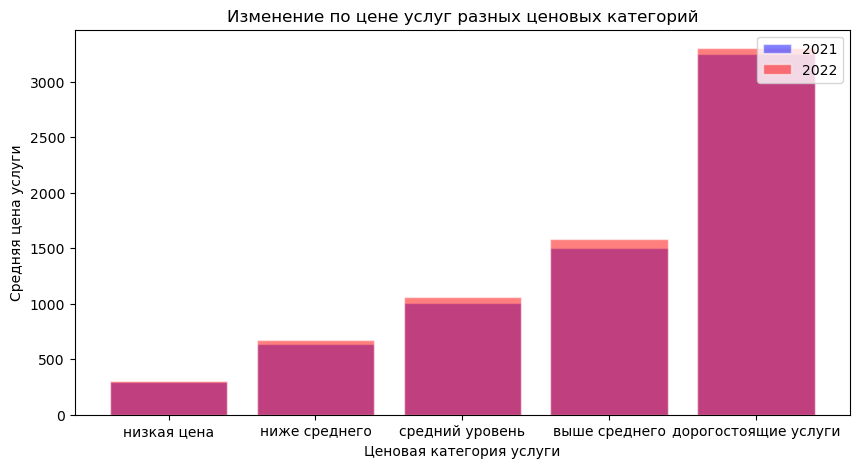

In [107]:
#визуализируем изменение цены услуг различных ценовых категорий
plt.figure(figsize=(10, 5))
plt.bar(x=price_qcut_table['price_category'], height=price_qcut_table['2021_price'],
         color='blue', alpha = 0.5, edgecolor='white', label='2021')
plt.bar(x=price_qcut_table['price_category'], height=price_qcut_table['2022_price'], 
         color='red', alpha = 0.5, edgecolor='white', label='2022')
plt.title('Изменение по цене услуг разных ценовых категорий')
plt.xlabel('Ценовая категория услуги')
plt.ylabel('Средняя цена услуги')
plt.legend(loc='upper right')
plt.show();

Рост средней цены услуги наблюдается во всех ценовых категориях. 

#### Оценим динамику востребованности услуг различных категорий и типов: <a id='type'></a> 

In [108]:
#консолидируем информацию по категории услуг
category_rank = data_8.pivot_table(index='med_category', columns='service_year', values=['service_number', 'service_amount'], 
                                   aggfunc='sum')
category_rank.columns=['2021_amount','2022_amount','2021_number','2022_number']
category_rank['2021_price'] = (category_rank['2021_amount']/category_rank['2021_number']).round(2)
category_rank['2022_price'] = (category_rank['2022_amount']/category_rank['2022_number']).round(2)
category_rank['number_change'] = (100*(category_rank['2022_number']-category_rank['2021_number'])/
                                  category_rank['2021_number']).round(2)
category_rank['price_change'] = (100*(category_rank['2022_price']-category_rank['2021_price'])/
                                 category_rank['2021_price']).round(2)
category_rank=category_rank.sort_values(by='price_change', ascending=False).reset_index()
category_rank.head(10)

,med_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
0,Травматология - Ортопедия,11046.0,117710.0,9.0,52.0,1227.33,2263.65,477.78,84.44
1,Урология,56095.0,166190.0,84.0,164.0,667.80,1013.35,95.24,51.74
2,Дерматология,30736.0,47710.0,58.0,60.0,529.93,795.17,3.45,50.05
3,Оториноларингология,428346.0,844213.0,703.0,1047.0,609.31,806.32,48.93,32.33
4,Иммунология,21161.0,29860.0,49.0,55.0,431.86,542.91,12.24,25.71
5,Аутоиммунные антитела,27279.0,54840.0,31.0,50.0,879.97,1096.80,61.29,24.64
6,Компьютерная томография,129150.0,13230.0,24.0,2.0,5381.25,6615.00,-91.67,22.93
7,Прием врача-эксперта,161178.0,567400.0,49.0,144.0,3289.35,3940.28,193.88,19.79
8,Серологические исследования,123547.0,191550.0,202.0,264.0,611.62,725.57,30.69,18.63
9,Эндоскопия,496071.0,967220.0,205.0,338.0,2419.86,2861.60,64.88,18.25


In [109]:
category_rank.query('price_change<0')

,med_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
37,Витамины,34893.0,6840.0,10.0,2.0,3489.30,3420.00,-80.00,-1.99
38,Система Гемостаза,79122.0,94530.0,109.0,133.0,725.89,710.75,22.02,-2.09
39,Физиотерапия,2455924.0,4146220.0,2165.0,3758.0,1134.38,1103.30,73.58,-2.74
40,Диагностические комплексы,17793.0,27930.0,12.0,21.0,1482.75,1330.00,75.00,-10.30
41,Анестезиология,111032.0,153490.0,76.0,119.0,1460.95,1289.83,56.58,-11.71
42,Сексология,141234.0,148620.0,114.0,152.0,1238.89,977.76,33.33,-21.08
43,Аллергология,138776.0,192690.0,147.0,282.0,944.05,683.30,91.84,-27.62
44,ПЦР диагностика инфекций,272255.0,48710.0,210.0,108.0,1296.45,451.02,-48.57,-65.21


In [110]:
category_rank.tail(10)

,med_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
38,Система Гемостаза,79122.0,94530.0,109.0,133.0,725.89,710.75,22.02,-2.09
39,Физиотерапия,2455924.0,4146220.0,2165.0,3758.0,1134.38,1103.30,73.58,-2.74
40,Диагностические комплексы,17793.0,27930.0,12.0,21.0,1482.75,1330.00,75.00,-10.30
41,Анестезиология,111032.0,153490.0,76.0,119.0,1460.95,1289.83,56.58,-11.71
42,Сексология,141234.0,148620.0,114.0,152.0,1238.89,977.76,33.33,-21.08
43,Аллергология,138776.0,192690.0,147.0,282.0,944.05,683.30,91.84,-27.62
44,ПЦР диагностика инфекций,272255.0,48710.0,210.0,108.0,1296.45,451.02,-48.57,-65.21
45,Генетические исследования,NaN,3470.0,NaN,1.0,NaN,3470.00,NaN,NaN
46,Скрининг беременных для выявления хромомсомных...,5513.0,NaN,3.0,NaN,1837.67,NaN,NaN,NaN
47,Сомнология,6700.0,NaN,2.0,NaN,3350.00,NaN,NaN,NaN


In [111]:
category_rank.sort_values(by='2022_number', ascending=False).head(10)

,med_category,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
24,Прием первичный,6787044.0,11459515.0,4622.0,7366.0,1468.42,1555.73,59.37,5.95
20,Прием повторный,4489440.0,7305600.0,3454.0,5242.0,1299.78,1393.67,51.77,7.22
39,Физиотерапия,2455924.0,4146220.0,2165.0,3758.0,1134.38,1103.30,73.58,-2.74
34,Биохимия крови,868955.0,1071094.0,2839.0,3469.0,306.08,308.76,22.19,0.88
12,Процедурный кабинет,472410.0,871870.0,2066.0,3449.0,228.66,252.79,66.94,10.55
21,Общеклинические исследования,1312498.0,2141955.0,2208.0,3364.0,594.43,636.73,52.36,7.12
23,Ультразвуковая диагностика,3654050.0,6293360.0,1704.0,2766.0,2144.40,2275.26,62.32,6.10
18,Офтальмология,867066.0,1187889.0,1333.0,1690.0,650.46,702.89,26.78,8.06
28,Рентген медицина,1072273.0,2303610.0,677.0,1378.0,1583.86,1671.71,103.55,5.55
10,Функциональная диагностика,682183.0,1389765.0,784.0,1355.0,870.13,1025.66,72.83,17.87


Как и в отношении отдельных услуг, так и в отношении медицинских категорий наибольший рост цены и снижение средней стоимости услуги демонстрируют категории, набирающие относительно небольшое количество клиентов и услуг. Наиболее востребованные услуги демонстрируют умеренный рост по стоимости, зачастую ниже среднего уровня роста цены. Из категорий стоит обратить внимание только на услуги процедурного кабинета и функциональной диагностики, входящие в топ-10 по востребованности и показывающие высокий рост стоимости. Из заметных по масштабу можно еще выделить услуги из медицинской категории 'Оториноларингология', значительной выросшие в цене (на 32%) и занимающие 11 место по количеству оказанных услуг в 2022 году.

In [112]:
category_rank.describe().round(2)

,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
count,47.00,46.00,47.00,46.00,47.00,46.00,45.00,45.00
mean,637276.30,1064927.43,582.98,909.30,1616.68,1732.43,57.21,8.60
std,1274073.87,2173767.80,1009.95,1575.77,1323.55,1480.03,95.48,21.42
min,1680.00,3470.00,2.00,1.00,158.00,174.39,-97.01,-65.21
25%,41890.50,49647.50,37.50,52.25,696.84,742.97,22.02,1.90
50%,228671.00,192120.00,147.00,164.50,1227.33,1249.92,52.36,6.84
75%,566510.00,943977.50,503.00,853.50,1832.34,2180.94,73.58,12.22
max,6787044.00,11459515.00,4622.00,7366.00,6483.14,6615.00,477.78,84.44


По медицинским категориям изменения по цене выглядят рельефнее, чем для отдельных услуг: максимальный рост средней стоимости услуги достигает 84%, максимальное падение составляет -65%. Для сравнения - для отдельных услуг границы были +18%, -25%. 

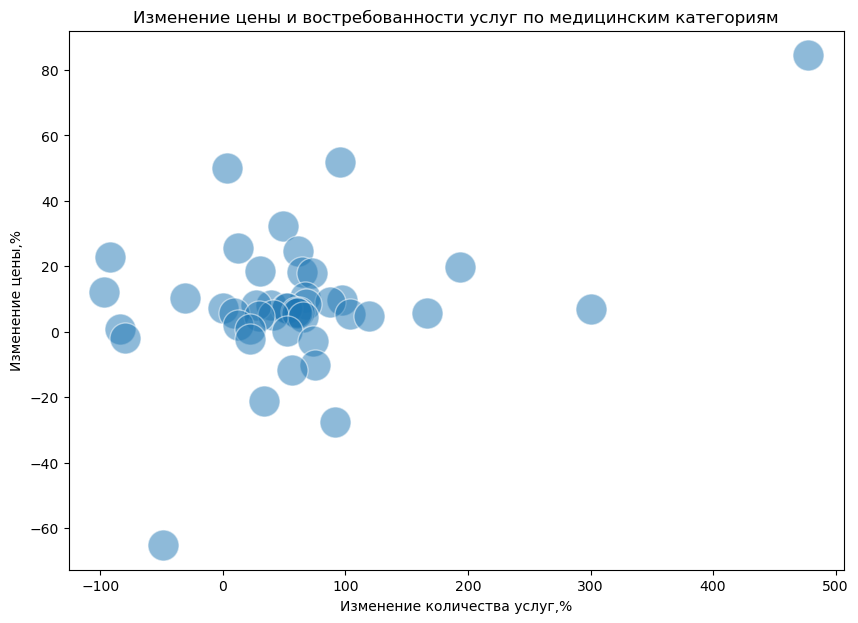

In [113]:
#визуализируем изменения в цене и востребованности услуг
plt.figure(figsize=(10, 7))
plt.scatter(x=category_rank['number_change'], y=category_rank['price_change'], s=500, alpha = 0.5, edgecolor='white')
plt.title('Изменение цены и востребованности услуг по медицинским категориям')
plt.xlabel('Изменение количества услуг,%')
plt.ylabel('Изменение цены,%')
plt.show();

На диаграмме не наблюдается сильной связи между изменениями цены услуги с изменением количества услуг, облако точек не упорядочено. Проверим наличие связи.

In [114]:
category_rank[['number_change', 'price_change']].corr()

,number_change,price_change
number_change,1.000000,0.429374
price_change,0.429374,1.000000


Результаты корреляционного анализа свидетельствуют наличии умеренной положительной линейной связи между изменениями цены и количества услуг (по шкале Чеддока). То есть с ростом цены ее востребованность возрастает, или, наоборот, на популярную услугу подинимают цену.

In [115]:
#консолидируем информацию по типу услуг
type_rank = data_8.pivot_table(index='service_type', columns='service_year', 
                               values=['service_number', 'service_amount'], aggfunc='sum')
type_rank.columns=['2021_amount','2022_amount','2021_number','2022_number']
type_rank['2021_price'] = (type_rank['2021_amount']/type_rank['2021_number']).round(2)
type_rank['2022_price'] = (type_rank['2022_amount']/type_rank['2022_number']).round(2)
type_rank['number_change'] = (100*(type_rank['2022_number']-type_rank['2021_number'])/type_rank['2021_number']).round(2)
type_rank['price_change'] = (100*(type_rank['2022_price']-type_rank['2021_price'])/type_rank['2021_price']).round(2)
type_rank=type_rank.sort_values(by='price_change', ascending=False).reset_index()
type_rank

,service_type,2021_amount,2022_amount,2021_number,2022_number,2021_price,2022_price,number_change,price_change
0,Лечение,1157281,1641398,1364,1679,848.45,977.60,23.09,15.22
1,Забор биоматериала,499641,955940,2198,3700,227.32,258.36,68.33,13.65
2,Лабораторные исследования,4090705,5938969,7123,9703,574.30,612.08,36.22,6.58
3,"Прием, консультация специалиста",11660557,19340175,8190,12754,1423.76,1516.40,55.73,6.51
4,Диагностика,7597212,13063180,4977,8073,1526.46,1618.13,62.21,6.01
5,Профилактика,4612974,7590550,3439,5737,1341.37,1323.09,66.82,-1.36
6,Оперативные вмешательства,333616,456450,109,182,3060.70,2507.97,66.97,-18.06


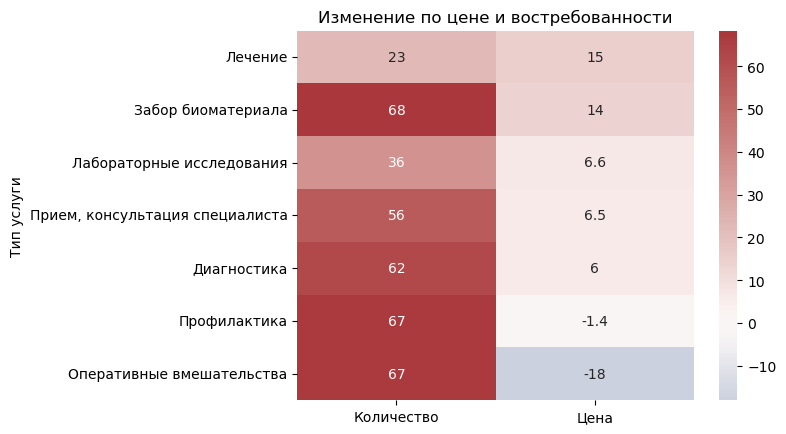

In [116]:
#визуализируем изменения востребованности и цены по типу услуг
sns.heatmap(type_rank[['number_change','price_change']], annot=True, cmap='vlag', center=0,
           xticklabels=['Количество','Цена'], yticklabels=type_rank['service_type'])
plt.title('Изменение по цене и востребованности')
plt.ylabel('Тип услуги')
plt.show;

По типу оказанных услуг в 2022 году больше всего подорожали услуги по лечению, а также услуги по забору биоматериала. Последние могут пересекаться с ранее выделяемой категорией 'Процедурный кабинет', к тому же именно эти услуги максимально выросли по количеству.

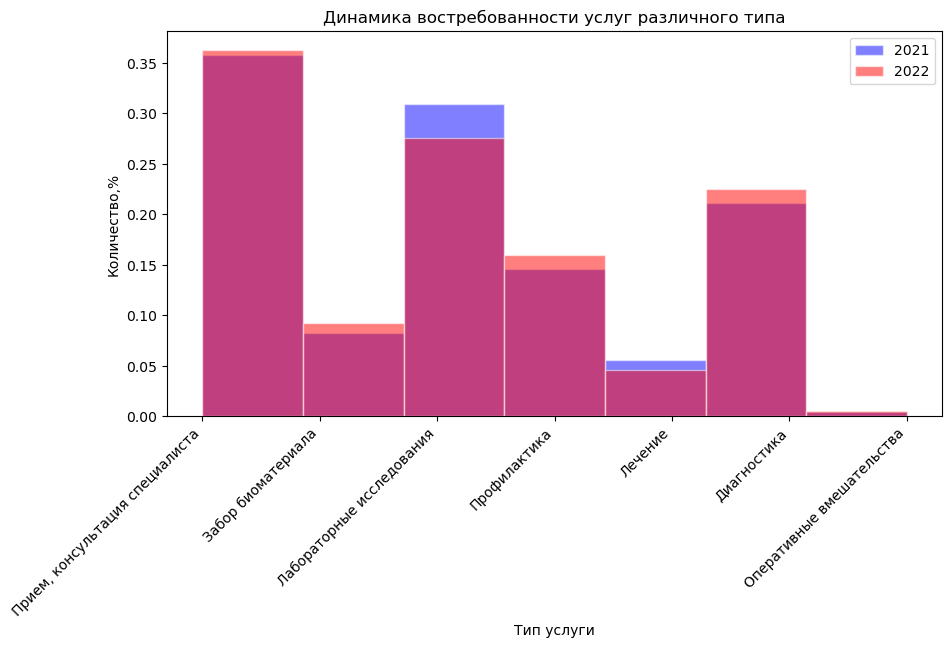

In [117]:
#сравним динамику долей услуг различных категорий
plt.figure(figsize=(10, 5))
plt.hist(x=(data_8.query('service_year==2021')['service_type']), 
         bins=7, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022')['service_type']), 
         bins=7, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Динамика востребованности услуг различного типа')
plt.xlabel('Тип услуги')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

Лечение и лабораторные исследования, несмотря на рост в абсолютных значениях, снизились по доле в общем количестве оказанных услуг в 2022 году.

#### Проведем анализ клиентской базы по признаку пола:<a id='gender'></a> 

In [118]:
#формируем таблицу данных
sex_table = data_8.pivot_table(index=['service_year','sex_id'], values=['service_number', 'service_amount', 'insured'], 
                   aggfunc={'service_number':'sum', 'insured':'nunique', 'service_amount':'sum'}).reset_index()
sex_table['mean_service'] = (sex_table['service_number']/sex_table['insured']).round(2)
for row in range(len(sex_table)):
    year=sex_table.loc[row,'service_year']
    sex_table.loc[row,'all_service_year'] = sex_table.query('service_year==@year')['service_number'].sum()
sex_table['service_price'] = (sex_table['service_amount']/sex_table['service_number']).round(2)
sex_table['service_number'] = (100*sex_table['service_number']/sex_table['all_service_year']).round(2)
sex_table['sex_id'] = sex_table['sex_id'].replace({1:'мужчины', 2:'женщины'})
sex_table

,service_year,sex_id,insured,service_amount,service_number,mean_service,all_service_year,service_price
0,2021,мужчины,725,11566224,37.69,14.25,27400.0,1119.89
1,2021,женщины,1007,18385762,62.31,16.95,27400.0,1076.95
2,2022,мужчины,1164,18060627,36.72,13.20,41828.0,1175.82
3,2022,женщины,1593,30926035,63.28,16.62,41828.0,1168.43


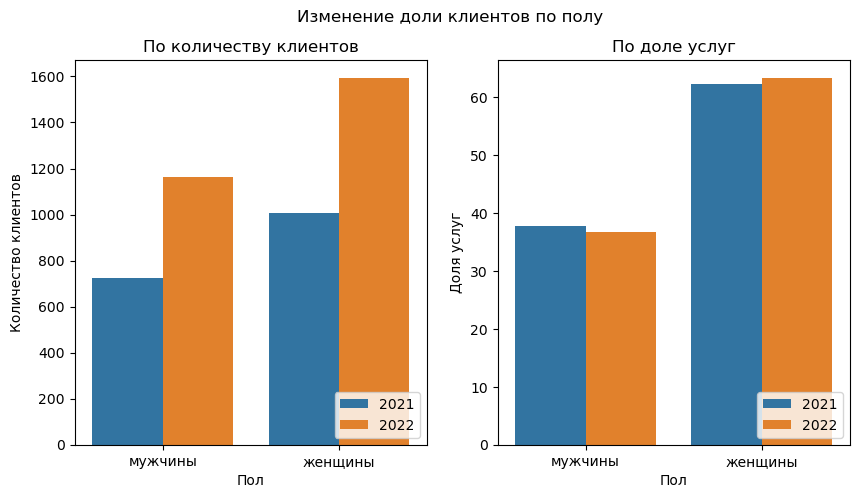

In [119]:
#сравним доли клиентов разного пола
plt.figure(figsize=(10, 5))
plt.suptitle('Изменение доли клиентов по полу')

ax1=plt.subplot(1,2,1)
sns.barplot(sex_table, x='sex_id', y='insured', hue='service_year')
plt.title('По количеству клиентов')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(loc='lower right')

ax2=plt.subplot(1,2,2)
sns.barplot(sex_table, x='sex_id', y='service_number', hue='service_year')
plt.title('По доле услуг')
plt.xlabel('Пол')
plt.ylabel('Доля услуг')
plt.legend(loc='lower right')

plt.show();

Количество уникальных клиентов в 2022 году значительно возросло независимо от пола, при этом процентное соотношение мужчин и женщин среди клиентов клиники по доле оказанных услуг сохраняется в 2022 году - доля женщин в клиентской базе выросла менее чем на 1%. Являются ли эти изменения существенными, необходимо проверить статистически.

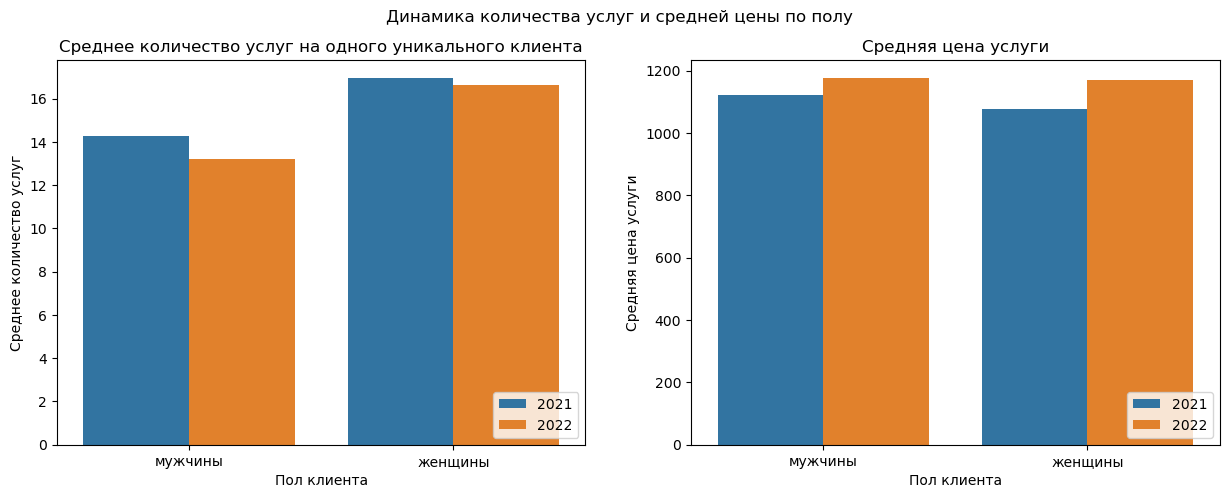

In [120]:
#визуализируем среднее количество услуг
plt.figure(figsize=(15, 5))
plt.suptitle('Динамика количества услуг и средней цены по полу')
ax1=plt.subplot(1,2,1)
sns.barplot(data=sex_table, x='sex_id', y='mean_service', hue='service_year')
plt.title('Среднее количество услуг на одного уникального клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Среднее количество услуг')
plt.legend(loc='lower right')
ax2=plt.subplot(1,2,2)
sns.barplot(sex_table, x='sex_id', y='service_price', hue='service_year')
plt.title('Средняя цена услуги')
plt.xlabel('Пол клиента')
plt.ylabel('Средняя цена услуги')
plt.legend(loc='lower right')

plt.show();

Среднее количество услуг на одного уникального клиента снижается независимо от пола, причем для мужчин динамика выше.<p>
Средняя цена услуги как среди мужчин и женщин возросла в 2022 году, при этом рост средней стоимости услуги у клиентов-женщин более выражен, чем у клиентов-мужчин, хотя в оба периода средняя стоимость полученных услуг выше именно среди клиентов-мужчин. <p>
Если изменение доли женщин в клиентской базе статистически значимо, то это может быть одним из драйверов роста цены услуги, так как женщины составляют большую часть клиентов клиники и в 2022 году стали пользоваться в среднем более дорогостоящими услугами не снижая их количество так сильно, как мужчины.

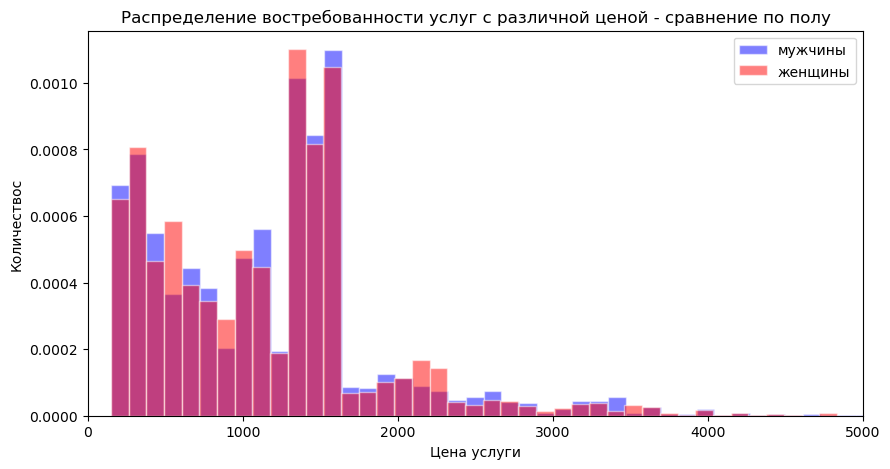

In [121]:
#сравним распределение по цене услуги на гистограмме
plt.figure(figsize=(10, 5))
plt.xlim(0,5000)
plt.hist(x=(data_8.query('sex_id==1')['service_amount']/data_8.query('sex_id==1')['service_number']), 
         bins=150, color='blue', alpha = 0.5, edgecolor='white', label='мужчины', density=True)
plt.hist(x=(data_8.query('sex_id==2')['service_amount']/data_8.query('sex_id==2')['service_number']), 
         bins=235, color='red', alpha = 0.5, edgecolor='white', label='женщины', density=True)
plt.title('Распределение востребованности услуг с различной ценой - сравнение по полу')
plt.xlabel('Цена услуги')
plt.ylabel('Количествоc')
plt.legend(loc='upper right')
plt.show();

Явных особенностей по выбору услуг клиентов разного пола не прослеживается.

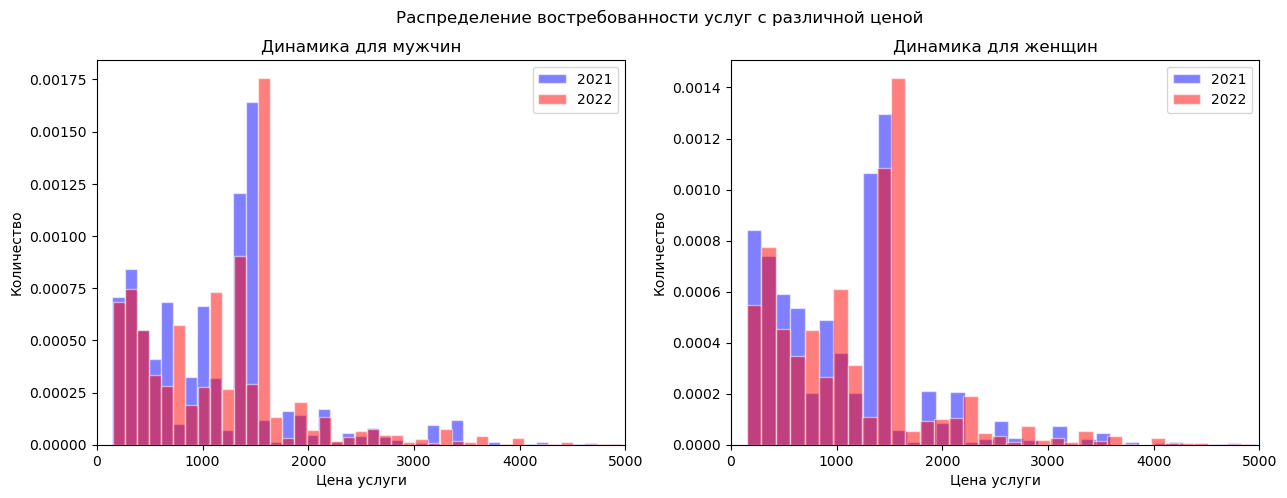

In [122]:
#сравним распределение по цене услуги на гистограмме
plt.figure(figsize=(15, 5))
plt.suptitle('Распределение востребованности услуг с различной ценой', fontsize='large')


ax1 = plt.subplot(1, 2, 1)
plt.xlim(0,5000)
plt.hist(x=(data_8.query('service_year==2021 and sex_id==1')['price']), bins=150, 
         color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022 and sex_id==1')['price']), bins=72, 
         color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Динамика для мужчин')
plt.xlabel('Цена услуги')
plt.ylabel('Количество')
plt.legend(loc='upper right')

ax2 = plt.subplot(1, 2, 2)
plt.xlim(0,5000)
plt.hist(x=(data_8.query('service_year==2021 and sex_id==2')['price']), bins=195, 
         color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022 and sex_id==2')['price']), bins=70, 
         color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Динамика для женщин')
plt.xlabel('Цена услуги')
plt.ylabel('Количество')
plt.legend(loc='upper right')

plt.show();

И клиенты-мужчины и клиенты-женщины в 2022 году стали пользоваться более дорогостоящими услугами. В целом это соответствует общей тенденции, но различий между клиентами разного пола на диаграммах не заметно.<p>
Сравним динамику в разрезе ценовых категорий.

In [123]:
#готовим таблицу для визуализации
sex_number_table = data_8.pivot_table(index=['price_category', 'sex_id'], values='service_number', aggfunc='sum').reset_index()

for row in range(len(sex_number_table)):
    id = sex_number_table.loc[row,'sex_id']
    sex_number_table.loc[row,'all_ids'] = sex_number_table.query('sex_id==@id')['service_number'].sum()
    
sex_number_table['service_number'] = (100*sex_number_table['service_number'].div(sex_number_table['all_ids'], axis=0)).round(2)
sex_number_table['sex_id'] = sex_number_table['sex_id'].replace({1:'мужчины', 2:'женщины'})
sex_number_table = sort_qcut(sex_number_table)
sex_number_table

,price_category,sex_id,service_number,all_ids,sort
6,низкая цена,мужчины,23.93,25688.0,1.0
7,низкая цена,женщины,23.67,43540.0,1.0
4,ниже среднего,мужчины,13.62,25688.0,2.0
5,ниже среднего,женщины,14.71,43540.0,2.0
8,средний уровень,мужчины,15.42,25688.0,3.0
9,средний уровень,женщины,14.94,43540.0,3.0
0,выше среднего,мужчины,41.05,25688.0,4.0
1,выше среднего,женщины,41.89,43540.0,4.0
2,дорогостоящие услуги,мужчины,5.98,25688.0,5.0
3,дорогостоящие услуги,женщины,4.80,43540.0,5.0


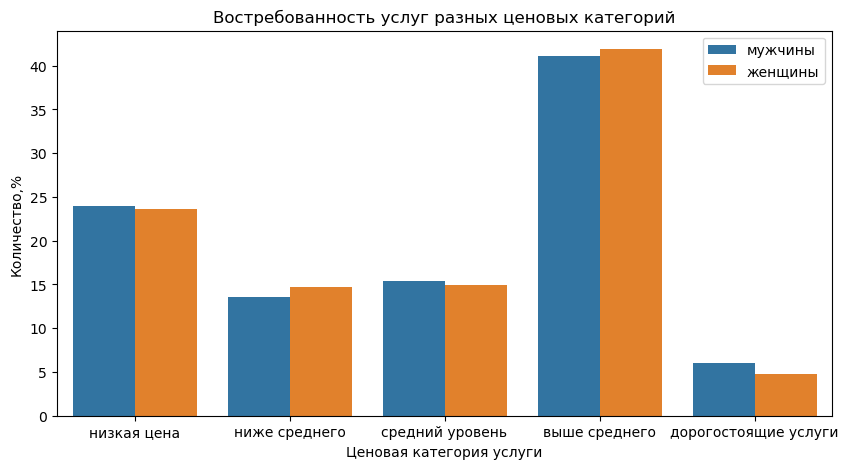

In [124]:
#визуализируем востребованность услуг различных ценовых категорий
plt.figure(figsize=(10, 5))
sns.barplot(sex_number_table, x='price_category', y='service_number', hue='sex_id')
plt.title('Востребованность услуг разных ценовых категорий')
plt.xlabel('Ценовая категория услуги')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

В среднем уровень востребованности услуг различных ценовых категорий не сильно отличается у клиентов разного пола, при этом услугами в категориях низкая цена, средний уровень и дорогостоящие услуги чаще пользуются мужчины, в категориях ниже и выше среднего - лидируют женщины. <p>
Оценим этот показатель в динамике. 

In [125]:
#готовим таблицу для визуализации
sex_qcut_table = data_8.pivot_table(index=['price_category', 'service_year'], columns='sex_id', values='service_number', aggfunc='sum').reset_index()

for row in range(len(sex_qcut_table)):
    year = sex_qcut_table.loc[row,'service_year']
    sex_qcut_table.loc[row,'man'] = sex_qcut_table.query('service_year==@year')[1].sum()
    sex_qcut_table.loc[row,'woman'] = sex_qcut_table.query('service_year==@year')[2].sum()
    
sex_qcut_table[1] = (100*sex_qcut_table[1].div(sex_qcut_table['man'], axis=0)).round(2)
sex_qcut_table[2] = (100*sex_qcut_table[2].div(sex_qcut_table['woman'], axis=0)).round(2)
sort_qcut(sex_qcut_table)
sex_qcut_table = sort_qcut(sex_qcut_table)
sex_qcut_table

sex_id,price_category,service_year,1,2,man,woman,sort
6,низкая цена,2021,24.57,25.59,10328.0,17072.0,1.0
7,низкая цена,2022,23.50,22.42,15360.0,26468.0,1.0
4,ниже среднего,2021,13.72,15.45,10328.0,17072.0,2.0
5,ниже среднего,2022,13.55,14.23,15360.0,26468.0,2.0
8,средний уровень,2021,14.90,13.57,10328.0,17072.0,3.0
9,средний уровень,2022,15.76,15.82,15360.0,26468.0,3.0
0,выше среднего,2021,40.66,40.35,10328.0,17072.0,4.0
1,выше среднего,2022,41.32,42.89,15360.0,26468.0,4.0
2,дорогостоящие услуги,2021,6.15,5.04,10328.0,17072.0,5.0
3,дорогостоящие услуги,2022,5.87,4.64,15360.0,26468.0,5.0


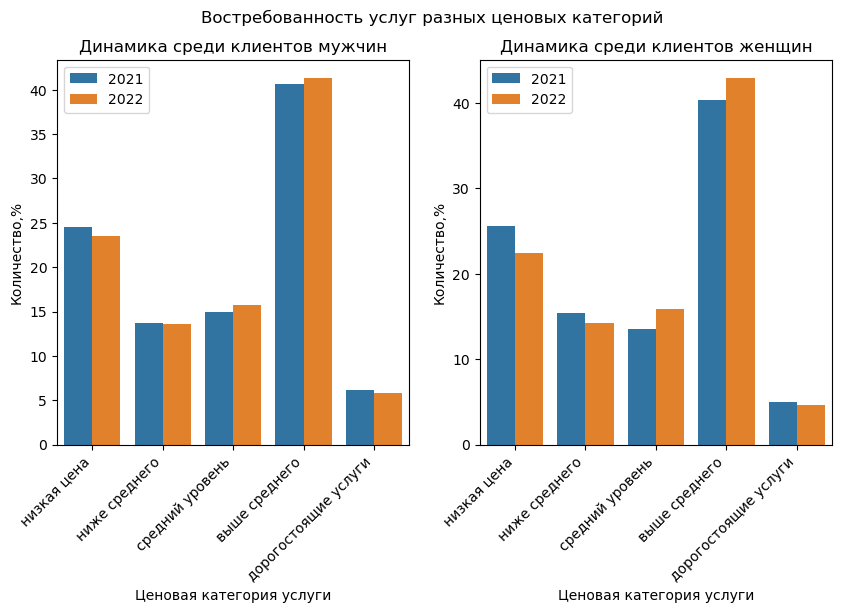

In [126]:
#визуализируем востребованность услуг различных ценовых категорий
plt.figure(figsize=(10, 5))
plt.suptitle('Востребованность услуг разных ценовых категорий', fontsize='large')

ax1 = plt.subplot(1, 2, 1)
sns.barplot(sex_qcut_table, x='price_category', y=1, hue='service_year')
plt.title('Динамика среди клиентов мужчин')
plt.xlabel('Ценовая категория услуги')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество,%')
plt.legend(loc='upper left')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(sex_qcut_table, x='price_category', y=2, hue='service_year')
plt.title('Динамика среди клиентов женщин')
plt.xlabel('Ценовая категория услуги')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество,%')
plt.legend(loc='upper left')

plt.show();

Для клиентов обоих полов повторяется общая тенденция, но среди женской аудитории динамика более выраженная, а у мужчин - наоборот, различия менее заметны. Учитывая, что доли клиентов разного пола почти не поменялись, рост средней цены услуги скорее связан именно с перечнем услуг диапазона, чем с влиянием пола клиента. 

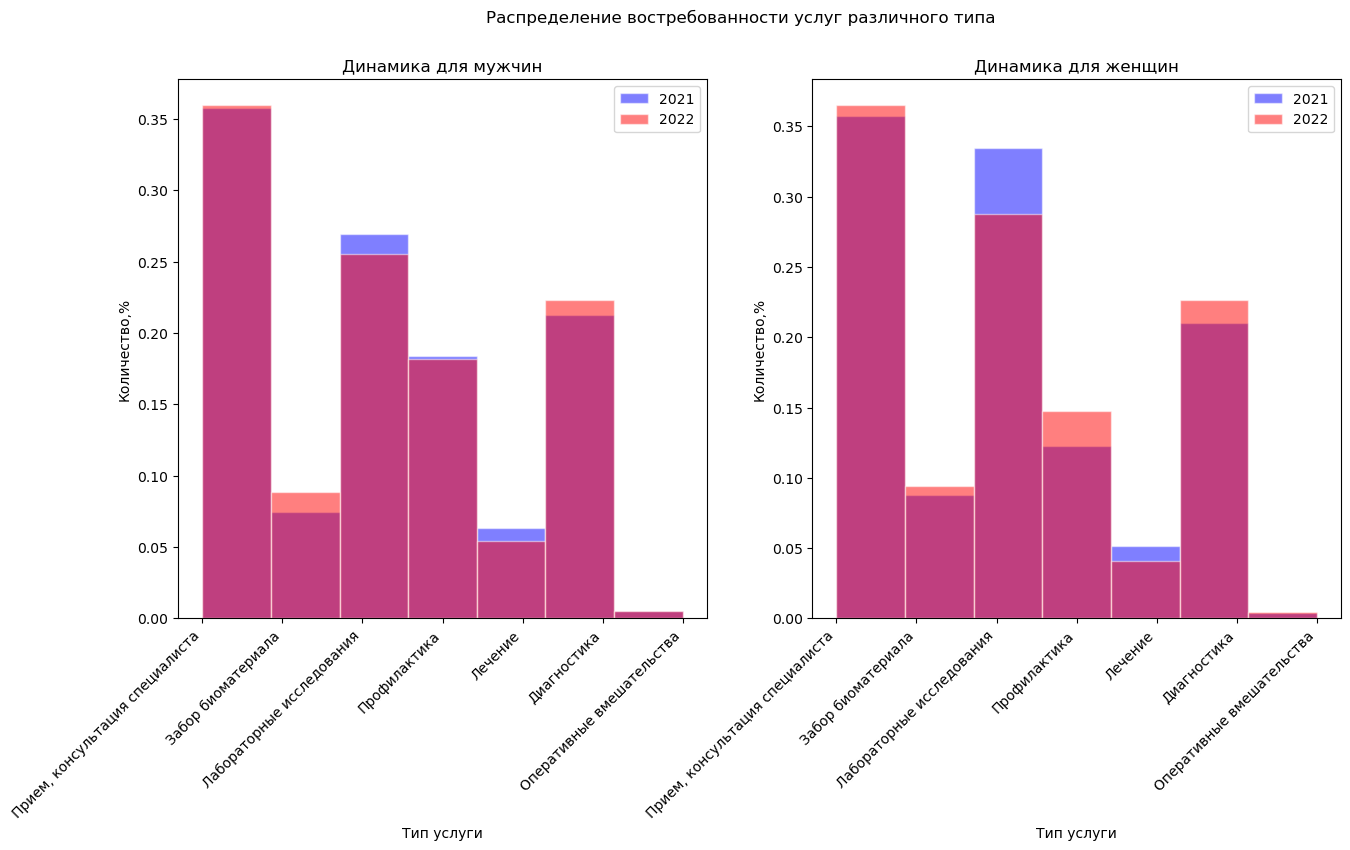

In [127]:
#сравним распределение по категории услуги на гистограмме
plt.figure(figsize=(15, 7))
plt.suptitle('Распределение востребованности услуг различного типа', fontsize='large')

ax1 = plt.subplot(1, 2, 1)
plt.hist(x=(data_8.query('service_year==2021 and sex_id==1')['service_type']), 
         bins=7, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022 and sex_id==1')['service_type']), 
         bins=7, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Динамика для мужчин')
plt.xlabel('Тип услуги')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')


ax2 = plt.subplot(1, 2, 2)
plt.hist(x=(data_8.query('service_year==2021 and sex_id==2')['service_type']), 
         bins=7, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=(data_8.query('service_year==2022 and sex_id==2')['service_type']), 
         bins=7, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('Динамика для женщин')
plt.xlabel('Тип услуги')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

Различия в динамике востребованности услуг различного типа между мужчинами и женщинами также невысоки: клиенты-женщины в 2022 году стали чаще пользоваться услугами по профилактике, у мужчин доля данных услуг наоборот немного снизилась, кроме этого у клиентов женщин в большей степени снизилась доля услуг по лабораторной диагностике. Доля услуг по забору биоматериала, по которым произошел наибольший рост стоимости, возросла как среди клиентов-мужчин, так и среди женщин.

#### Проведем анализ клиентской базы по возрасту: <a id='gender'></a> 

In [128]:
#формируем таблицу данных
age_table = data_8.pivot_table(index=['service_year','age_category'], values=['service_number', 'service_amount', 'insured'], 
                               aggfunc={'service_number':'sum', 'service_amount':'sum', 'insured':'nunique'}).reset_index()
age_table['mean_service'] = (age_table['service_number']/age_table['insured']).round(2)
for row in range(len(age_table)):
    year=age_table.loc[row,'service_year']
    age_table.loc[row,'all_service_year'] = age_table.query('service_year==@year')['service_number'].sum()
age_table['service_price'] = (age_table['service_amount']/age_table['service_number']).round(2)
age_table['service_number'] = (100*age_table['service_number']/age_table['all_service_year']).round(2)
age_table

,service_year,age_category,insured,service_amount,service_number,mean_service,all_service_year,service_price
0,2021,взрослые,330,7254364,23.53,19.54,27400.0,1125.23
1,2021,дошкольники,148,1403975,4.32,8.01,27400.0,1184.79
2,2021,молодежь,1087,19007390,64.56,16.27,27400.0,1074.53
3,2021,пожилые люди,26,856782,2.56,27.00,27400.0,1220.49
4,2021,школьники,127,1145700,4.04,8.72,27400.0,1034.03
5,2021,юношеский возраст,25,283775,0.98,10.76,27400.0,1054.93
6,2022,взрослые,538,12406338,25.72,20.00,41828.0,1153.22
7,2022,дошкольники,157,1735439,3.74,9.96,41828.0,1109.62
8,2022,молодежь,1841,32002356,64.61,14.68,41828.0,1184.13
9,2022,пожилые люди,39,820315,1.63,17.51,41828.0,1201.05


In [129]:
#создадим функцию для сортировки данных

def sort_age(df):
    for row in range(len(df)):
        if df.loc[row, 'age_category'] == 'дошкольники':
            df.loc[row, 'sort'] = 1
        elif df.loc[row, 'age_category'] == 'школьники':
            df.loc[row, 'sort'] = 2
        elif df.loc[row, 'age_category'] == 'юношеский возраст':
            df.loc[row, 'sort'] = 3
        elif df.loc[row, 'age_category'] == 'молодежь':
            df.loc[row, 'sort'] = 4
        elif df.loc[row, 'age_category'] == 'взрослые':
            df.loc[row, 'sort'] = 5
        elif df.loc[row, 'age_category'] == 'пожилые люди':
            df.loc[row, 'sort'] = 6
        df = df.sort_values(by='sort')
    return df

In [130]:
age_table = sort_age(age_table)
age_table

,service_year,age_category,insured,service_amount,service_number,mean_service,all_service_year,service_price,sort
1,2021,дошкольники,148,1403975,4.32,8.01,27400.0,1184.79,1.0
7,2022,дошкольники,157,1735439,3.74,9.96,41828.0,1109.62,1.0
4,2021,школьники,127,1145700,4.04,8.72,27400.0,1034.03,2.0
10,2022,школьники,153,1479331,3.23,8.84,41828.0,1093.37,2.0
5,2021,юношеский возраст,25,283775,0.98,10.76,27400.0,1054.93,3.0
11,2022,юношеский возраст,41,542883,1.06,10.83,41828.0,1222.71,3.0
2,2021,молодежь,1087,19007390,64.56,16.27,27400.0,1074.53,4.0
8,2022,молодежь,1841,32002356,64.61,14.68,41828.0,1184.13,4.0
0,2021,взрослые,330,7254364,23.53,19.54,27400.0,1125.23,5.0
6,2022,взрослые,538,12406338,25.72,20.00,41828.0,1153.22,5.0


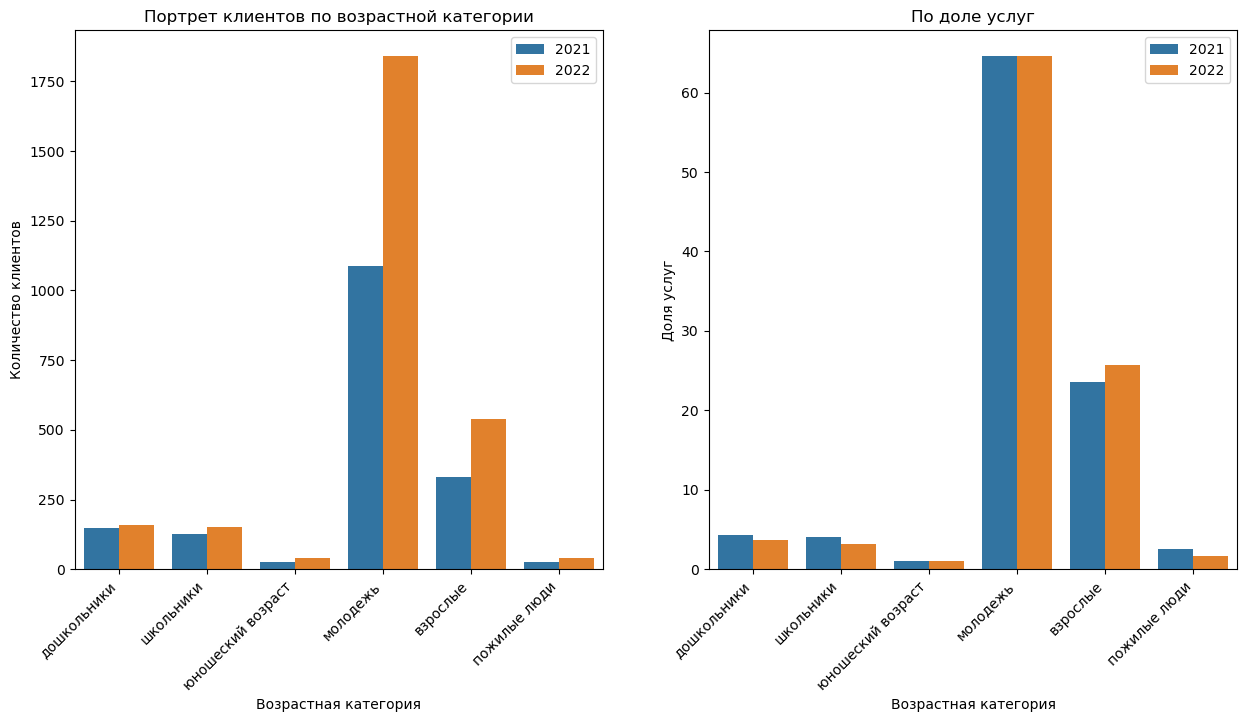

In [131]:
#сравним доли клиентов разных возрастных категорий
plt.figure(figsize=(15, 7))
plt.title('Изменение доли клиентов по возрастной категории')

ax1=plt.subplot(1,2,1)
sns.barplot(age_table, x='age_category', y='insured', hue='service_year')
plt.title('Портрет клиентов по возрастной категории')
plt.xlabel('Возрастная категория')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество клиентов')
plt.legend(loc='upper right')

ax2=plt.subplot(1,2,2)
sns.barplot(age_table, x='age_category', y='service_number', hue='service_year')
plt.title('По доле услуг')
plt.xlabel('Возрастная категория')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Доля услуг')
plt.legend(loc='upper right')
plt.show();

В 2022 году существенно возросло количество клиентов в возрасте от 22 до 60 лет, однако это не сильно отразилось на доле услуг данной возрастной категории. Две трети услуг клиники как в 2021, так и в 2022 году оплачивают посетители в возрасте от 22 до 40 лет, еще пятая часть - от 41 до 60 лет, остальные категории суммарно не достигают 15%. Основной профиль по возрастным группам и сохраняется в 2022 году практически без изменений, немного снижается доля детей и пожилых, их отток компенсировался ростом доли клиентов в возрасте от 41 до 60 лет. <p>
Визуализируем гистограмму с разбивкой по возрасту, без учета категорий.

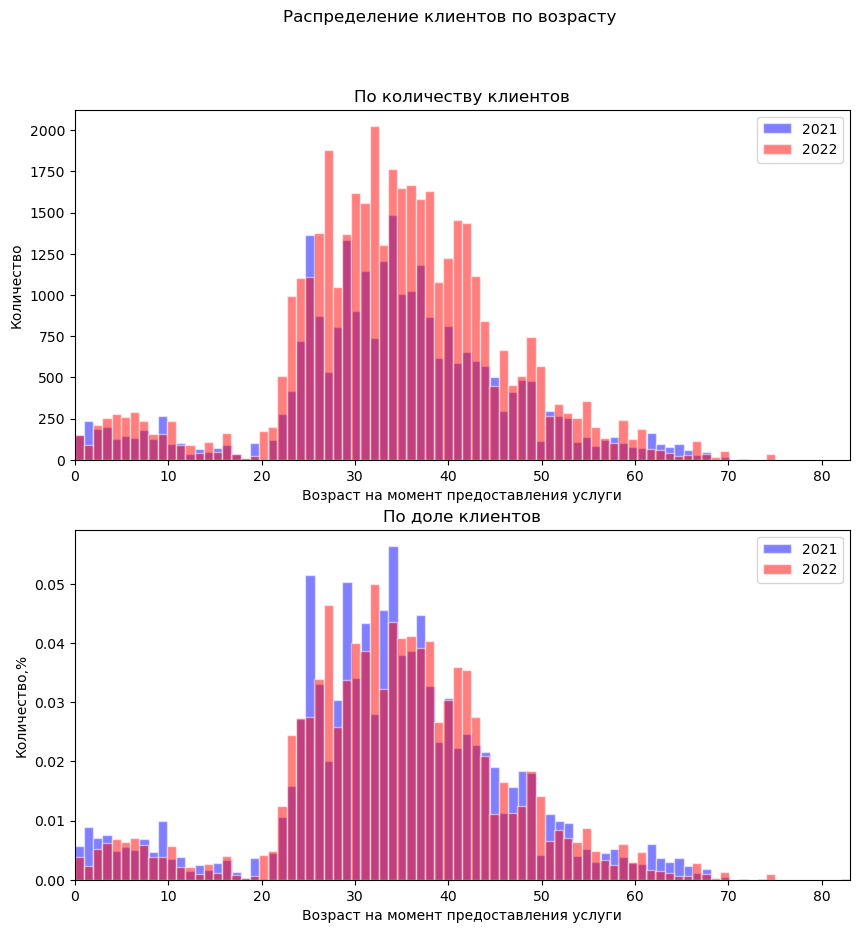

In [132]:
#сравним распределение по возрасту на гистограмме
plt.figure(figsize=(10, 10))
plt.suptitle('Распределение клиентов по возрасту', fontsize='large')

ax1 = plt.subplot(2, 1, 1)
plt.xlim(0,83)
plt.hist(x=data_8.query('service_year==2021')['age_for_service_date'],
         bins=84, color='blue', alpha = 0.5, edgecolor='white', label='2021')
plt.hist(x=data_8.query('service_year==2022')['age_for_service_date'],
         bins=76, color='red', alpha = 0.5, edgecolor='white', label='2022')
plt.title('По количеству клиентов')
plt.xlabel('Возраст на момент предоставления услуги')
plt.ylabel('Количество')
plt.legend(loc='upper right')


ax2 = plt.subplot(2, 1, 2)
plt.xlim(0,83)
plt.hist(x=data_8.query('service_year==2021')['age_for_service_date'],
         bins=84, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=data_8.query('service_year==2022')['age_for_service_date'],
         bins=76, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По доле клиентов')
plt.xlabel('Возраст на момент предоставления услуги')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

На гистограмме вырисовывается два пика: основной - взрослые клиенты в возрасте от 23 до 50 лет, второй - дети до 11 лет. Подростки и юноши - самая редкая категория клиентов клиники, сравнимая лишь с возрастной группой старше 60 лет. На гистограммах четко прослеживается как рост количества клиентов в абсолютных значениях, так и сохранение профиля в долях. <p>
Оценим средний уровень цены услуги и среднего количества услуг посетителя у клиентов разных возрастных групп.

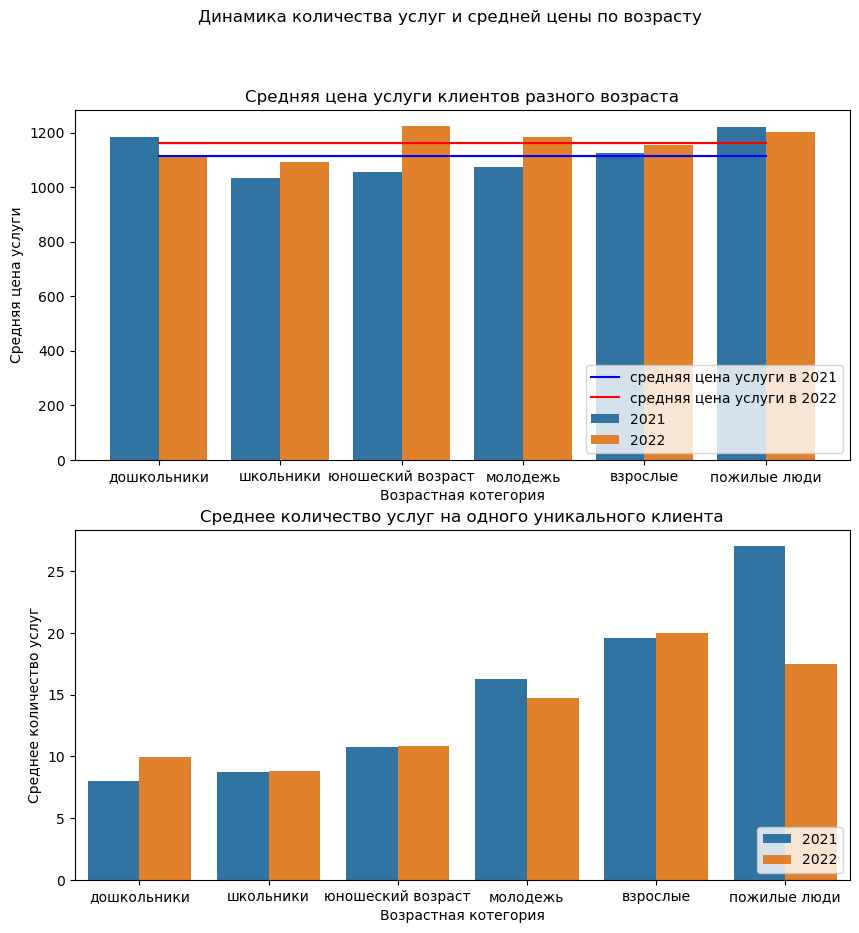

In [133]:
#визуализируем изменение средней цены услуги клиентов разных возрастных категорий
plt.figure(figsize=(10, 10))
plt.suptitle('Динамика количества услуг и средней цены по возрасту')

ax1=plt.subplot(2,1,1)
sns.barplot(age_table, x='age_category', y='service_price', hue='service_year')
sns.lineplot(age_table, x='age_category', y=age_table.query('service_year==2021')['service_price'].mean(), 
             color='blue', label='средняя цена услуги в 2021')
sns.lineplot(age_table, x='age_category', y=age_table.query('service_year==2022')['service_price'].mean(), 
             color='red', label='средняя цена услуги в 2022')
plt.title('Средняя цена услуги клиентов разного возраста')
plt.xlabel('Возрастная котегория')
plt.ylabel('Средняя цена услуги')
plt.legend(loc='lower right')

ax2=plt.subplot(2,1,2)
sns.barplot(age_table, x='age_category', y='mean_service', hue='service_year')
plt.title('Среднее количество услуг на одного уникального клиента')
plt.xlabel('Возрастная котегория')
plt.ylabel('Среднее количество услуг')
plt.legend(loc='lower right')

plt.show();

Средняя цена услуги у клиентов различных возрастных групп различается максимально чуть более чем на 100. Максимально возросла средняя цена услуг у клиентов юношеского возраста, но учитывая их небольшую долю среди клиентов клиники, существенного влияния на цену услуги они оказать не могли. Собственно, средняя цена услуги возросла для большинства категорий, кроме дошкольников и пожилых посетителей, хотя последние стабильно тратят больше средней цены услуги как в 2021 так и в 2022 году. Также заметно выросла цена услуги у наиболее массовой возрастной категории - от 22 до 40 лет.<p>
Среднее количество услуг на одного клиента более чем на 1 услугу изменилось только для трех категорий: у дошкольников возросло с 8 до почти 10 услуг, снизилось у молодежи с 16 до 14 услуг и у пожилых посетителей - с 27 до 17 услуг. Именно из-за снижения среднего количества услуг на одного уникального клиента резкий рост количества уникальных клиентов в возрастной категории молодежи практически не меняет долю услуг данной категории клиентов.<p>
Сравним востребованность услуг различных ценовых категорий для всех возрастов.

In [134]:
#готовим таблицу для визуализации
age_number = data_8.pivot_table(index=['price_category', 'age_category'], values='service_number', aggfunc='sum').reset_index()

for row in range(len(age_number)):
    age_cat = age_number.loc[row,'age_category']
    age_number.loc[row,'age_cat'] = age_number.query('age_category==@age_cat')['service_number'].sum()
for row in range(len(age_number)):
    price_cat = age_number.loc[row,'price_category']
    age_number.loc[row,'price_cat'] = age_number.query('price_category==@price_cat')['service_number'].sum()
    
age_number['service_number_to_age'] = (100*age_number['service_number'].div(age_number['age_cat'], axis=0)).round(2)
age_number['service_number_to_price'] = (100*age_number['service_number'].div(age_number['price_cat'], axis=0)).round(2)
age_number = age_number.sort_values(by='service_number_to_age')
age_number = sort_age(age_number)  
age_number.head()

,price_category,age_category,service_number,age_cat,price_cat,service_number_to_age,service_number_to_price,sort
1,выше среднего,дошкольники,1302,2749.0,28786.0,47.36,4.52,1.0
7,дорогостоящие услуги,дошкольники,96,2749.0,3624.0,3.49,2.65,1.0
25,средний уровень,дошкольники,335,2749.0,10464.0,12.19,3.20,1.0
13,ниже среднего,дошкольники,459,2749.0,9902.0,16.70,4.64,1.0
19,низкая цена,дошкольники,557,2749.0,16452.0,20.26,3.39,1.0


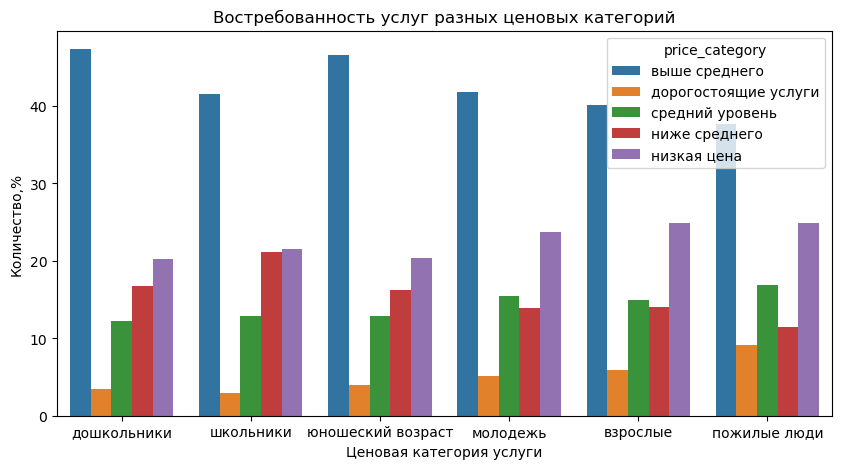

In [135]:
#визуализируем востребованность услуг различных ценовых категорий
plt.figure(figsize=(10, 5))
sns.barplot(data=age_number, x='age_category', y='service_number_to_age', hue='price_category')
plt.title('Востребованность услуг разных ценовых категорий')
plt.xlabel('Ценовая категория услуги')
plt.ylabel('Количество,%')
plt.show();

Профиль по востребованности услуг различных ценовых категорий для всех возрастов похож, однако заметны и небольшие различия. Например, пожилые клиенты чаще других пользуются дорогостоящими услугами, а школьники, наоборот, - услугами в ценовой категории ниже среднего. Однако учитывая количество клиентов данных категорий, сильного влияния на стоимость услуги они не оказывают. Услугами с низкой стоимостью чаще пользуются клиенты старше 21 года, чем те, кто моложе этого возраста.

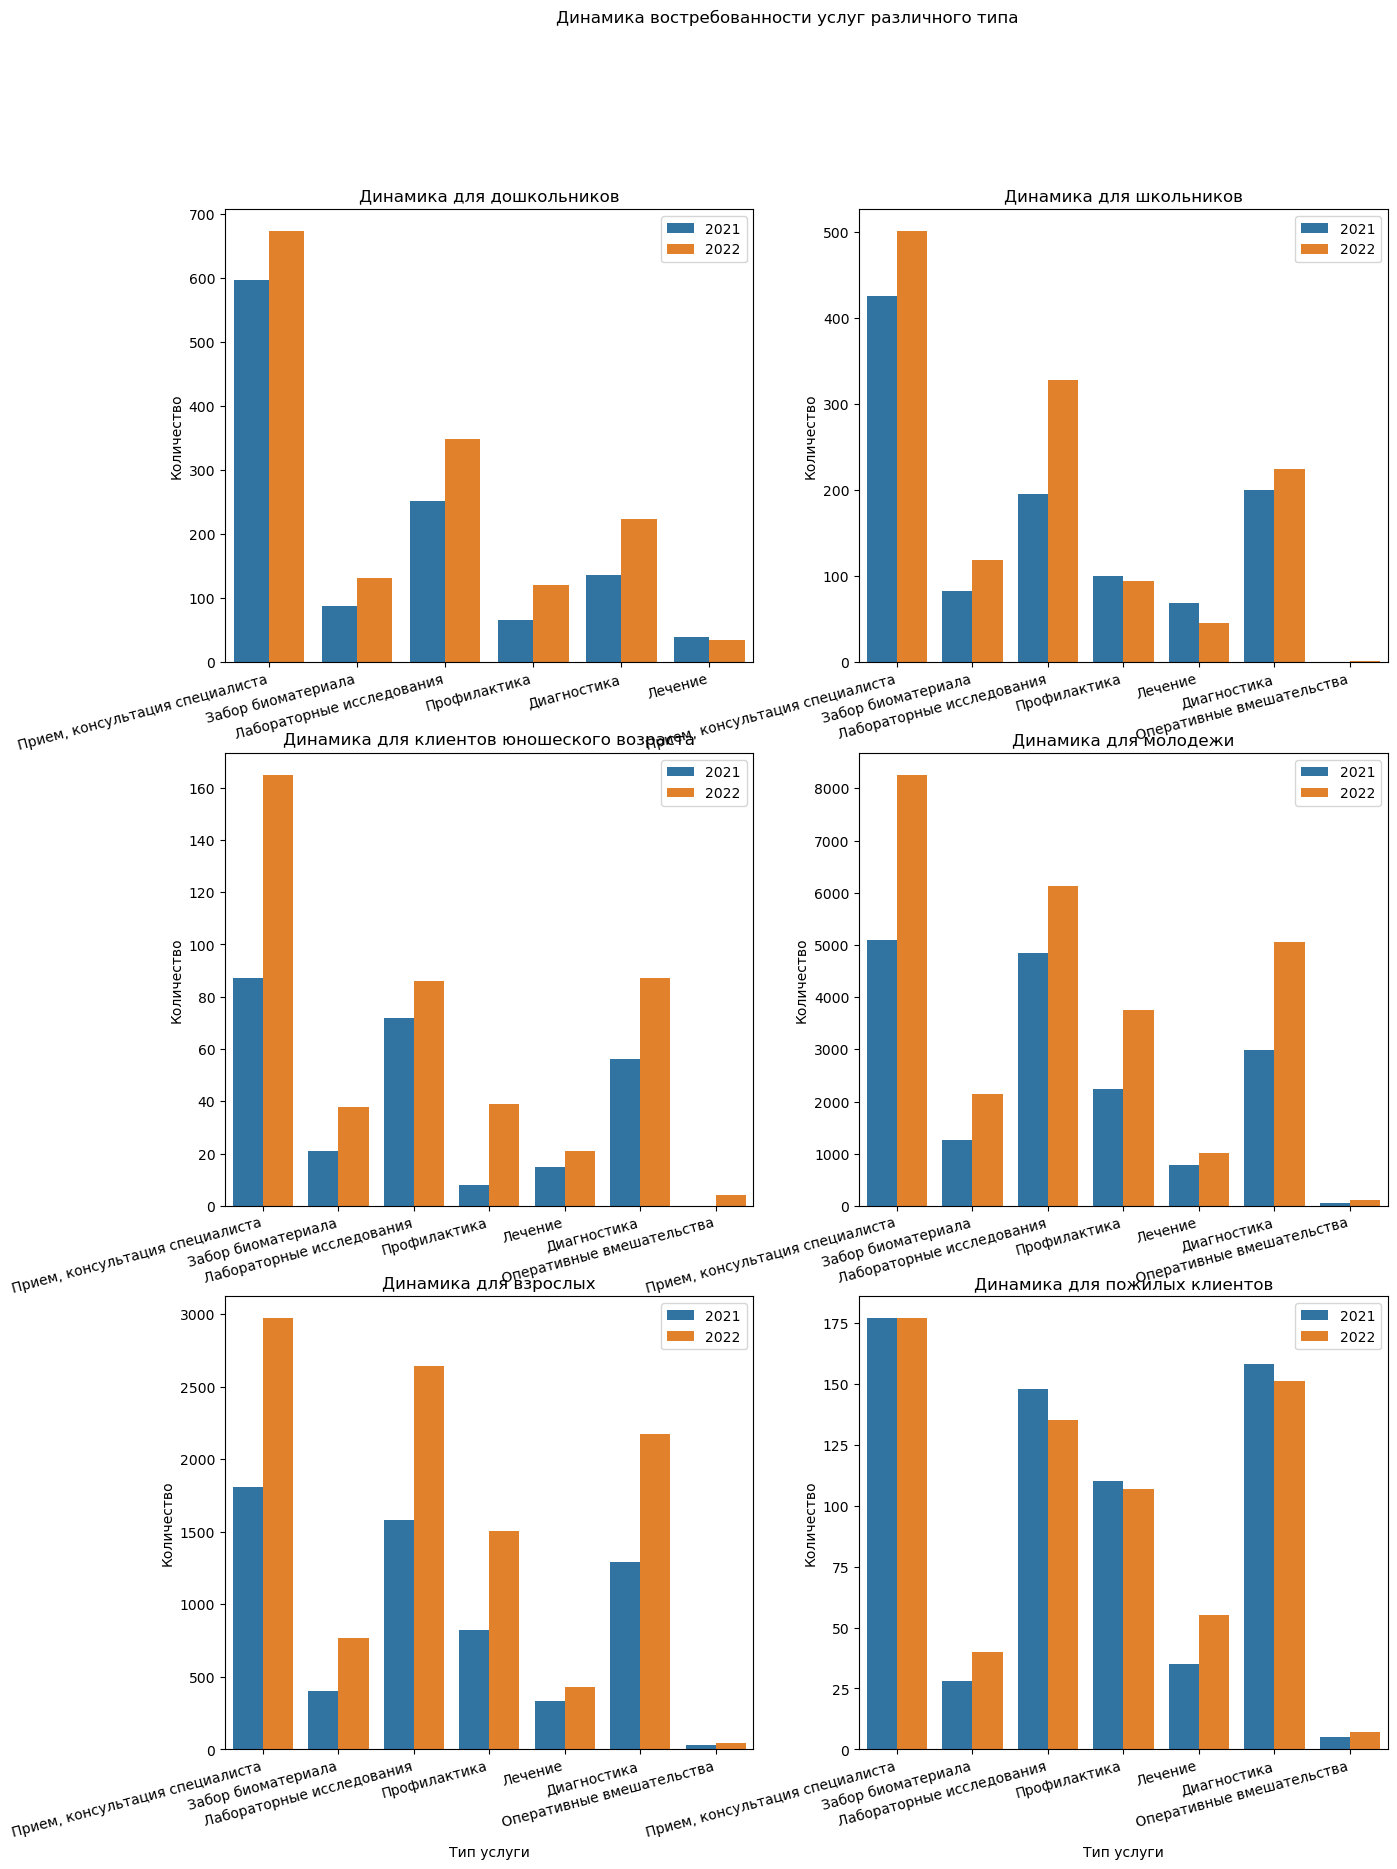

In [136]:
#оценим динамику востребованности различных типов услуг
plt.figure(figsize=(15, 20))
plt.suptitle('Динамика востребованности услуг различного типа', fontsize='large')

ax1 = plt.subplot(3, 2, 1)
sns.countplot(data=data_8.query('age_category=="дошкольники"'), x='service_type', hue='service_year')
plt.title('Динамика для дошкольников')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')


ax2 = plt.subplot(3, 2, 2)
sns.countplot(data=data_8.query('age_category=="школьники"'), x='service_type', hue='service_year')
plt.title('Динамика для школьников')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')

ax3 = plt.subplot(3, 2, 3)
sns.countplot(data=data_8.query('age_category=="юношеский возраст"'), x='service_type', hue='service_year')
plt.title('Динамика для клиентов юношеского возраста')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')


ax4 = plt.subplot(3, 2, 4)
sns.countplot(data=data_8.query('age_category=="молодежь"'), x='service_type', hue='service_year')
plt.title('Динамика для молодежи')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')

ax5 = plt.subplot(3, 2, 5)
sns.countplot(data=data_8.query('age_category=="взрослые"'), x='service_type', hue='service_year')
plt.title('Динамика для взрослых')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')


ax6 = plt.subplot(3, 2, 6)
sns.countplot(data=data_8.query('age_category=="пожилые люди"'), x='service_type', hue='service_year')
plt.title('Динамика для пожилых клиентов')
plt.xlabel('Тип услуги')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Количество')
plt.legend(loc='upper right')

plt.show();

По востребованности услуг различного типа между клиентами разных возрастов три наиболее востребованных типа услуг - это прием специалиста, лабораторные исследования и диагностика, но вместе с этим имеются различия:
- дети дошкольного и школьного возраста в клинике не подвергаются оперативным вмешательствам, это может быть связано с особенностями лицензирования данного вида деятельности. Для этой категории клиентов подавляющее большинство услуг относятся к приему специалиста. Рост по количеству услуг невелик и коснулся всех типов услуг;
- среди клиентов юношеского возраста в два раза возросло количество посещений врачей и в три раза - профилактические мероприятия, по остальным типам услуг динамика более сглаженная, но значительная; 
- у клиентов в возрастных группах молодежь и взрослые практически совпадают графики; от других категорий этих клиентов отличает значительный рост по всем типам услуг, кроме лечения, где прирост невелик. Кроме этого в данных возрастных группах более высокая востребованность профилактических мероприятий, чем среди более молодых клиентов;
- пожилые клиенты показывают слабый рост и даже снижение востребованности по услугам профилактики и лабораторных исследований. Хотя доля профилактических мероприятий у этих клиентов максимальна, также как и лечебных процедур и оперативных вмешательств.

In [137]:
#  ?? когортный анализ ltv
#data_8.pivot_table(index='insured', )

In [138]:
# консолидируем информацию по посетителям
profiles = (data.sort_values(by=['insured', 'service_date']).groupby('insured')
            .agg({'service_date':['first', 'last'], 'service_year':'first', 'service_month':'first', 'age_for_service_date':'first', 
                  'sex_id':'first', 'service_amount':'sum', 'service_number':['sum', 'count']}).reset_index())
profiles.columns=['insured', 'first_date', 'last_date','service_year', 'service_month','age_for_service_date','sex_id', 'amount', 'number', 'visits']
profiles['lifetime'] = (profiles['last_date']-profiles['first_date']).dt.days
profiles.head()

,insured,first_date,last_date,service_year,service_month,age_for_service_date,sex_id,amount,number,visits,lifetime
0,125073,2021-01-11,2021-11-28,2021,1,65,2,33080,27,27,321
1,125094,2021-01-22,2022-04-13,2021,1,43,2,27519,20,19,446
2,125404,2021-08-04,2021-08-04,2021,8,26,1,1470,1,1,0
3,139315,2021-12-28,2021-12-28,2021,12,25,1,3300,3,3,0
4,139539,2021-04-15,2021-05-31,2021,4,42,2,75239,56,55,46


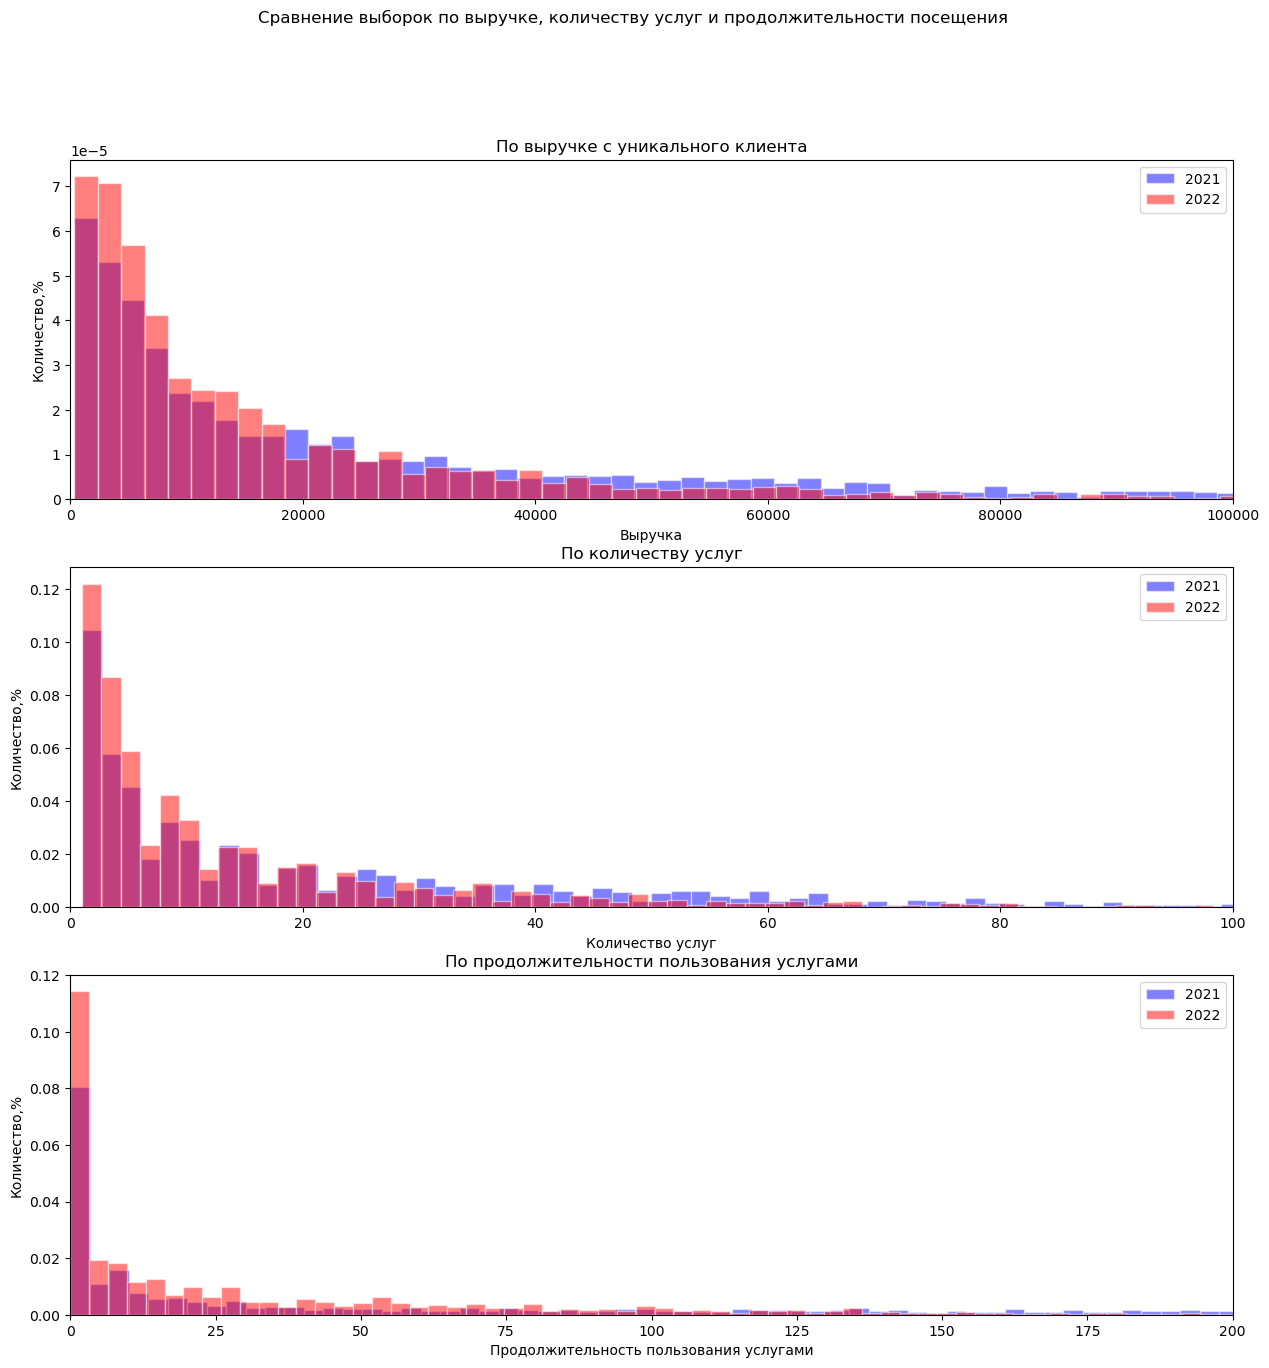

In [139]:
#сравним распределение по выручке и количеству услуг
plt.figure(figsize=(15, 15))
plt.suptitle('Сравнение выборок по выручке, количеству услуг и продолжительности посещения', fontsize='large')

ax1 = plt.subplot(3, 1, 1)
plt.xlim(0,100000)
plt.hist(x=profiles.query('service_year==2021')['amount'],
         bins=180, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=profiles.query('service_year==2022')['amount'],
         bins=90, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По выручке с уникального клиента')
plt.xlabel('Выручка')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')

ax2 = plt.subplot(3, 1, 2)
plt.xlim(0,100)
plt.hist(x=profiles.query('service_year==2021')['number'],
         bins=180, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=profiles.query('service_year==2022')['number'],
         bins=87, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По количеству услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')

ax3 = plt.subplot(3, 1, 3)
plt.xlim(0,200)
plt.hist(x=profiles.query('service_year==2021')['lifetime'],
         bins=180, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=profiles.query('service_year==2022')['lifetime'],
         bins=70, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По продолжительности пользования услугами')
plt.xlabel('Продолжительность пользования услугами')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')
plt.show();

Ожидаемо данные для 2021 года сдвинуты влево - и выручка и количество услуг и продолжительность посещения центра выше среди клиентов, пришедших в 2021 году. Ограничим данные одним месяцем и сравним показатели за этот период.

In [140]:
#сформируем профили пользователей
profiles_ltv = (data.sort_values(by=['insured', 'service_date']).groupby('insured')
            .agg({'service_date':'first', 'service_year':'first', 'service_month':'first',
                  'age_for_service_date':'first','sex_id':'first'}).reset_index())
profiles_ltv.columns=['insured', 'first_date', 'year', 'month', 'age','sex_id']
profiles_ltv = profiles_ltv.merge(data[['insured','service_date','service_amount', 'service_number']], on='insured', how='left')
profiles_ltv['lifetime'] = (profiles_ltv['service_date'] - profiles_ltv['first_date']).dt.days.astype(int)
profiles_ltv['y_m'] = profiles_ltv['year'].astype(str) +'_'+ profiles_ltv['month'].astype(str)
profiles_ltv.head()

,insured,first_date,year,month,age,sex_id,service_date,service_amount,service_number,lifetime,y_m
0,125073,2021-01-11,2021,1,65,2,2021-01-11,1470,1,0,2021_1
1,125073,2021-01-11,2021,1,65,2,2021-09-21,1470,1,253,2021_1
2,125073,2021-01-11,2021,1,65,2,2021-09-21,1470,1,253,2021_1
3,125073,2021-01-11,2021,1,65,2,2021-09-30,1470,1,262,2021_1
4,125073,2021-01-11,2021,1,65,2,2021-11-16,1540,1,309,2021_1


In [141]:
#сформируем профили пользователей
first_month = profiles_ltv.query('lifetime<=30')
first_month = first_month.groupby('insured').agg({'first_date':'first', 'year':'first', 'month':'first',
                  'service_amount':'sum', 'service_number':['sum', 'count']}).reset_index()
first_month.columns=['insured', 'first_date', 'year', 'month', 'amount', 'number', 'visits']
first_month.head()

,insured,first_date,year,month,amount,number,visits
0,125073,2021-01-11,2021,1,9274,7,7
1,125094,2021-01-22,2021,1,4479,4,4
2,125404,2021-08-04,2021,8,1470,1,1
3,139315,2021-12-28,2021,12,3300,3,3
4,139539,2021-04-15,2021,4,42728,42,41


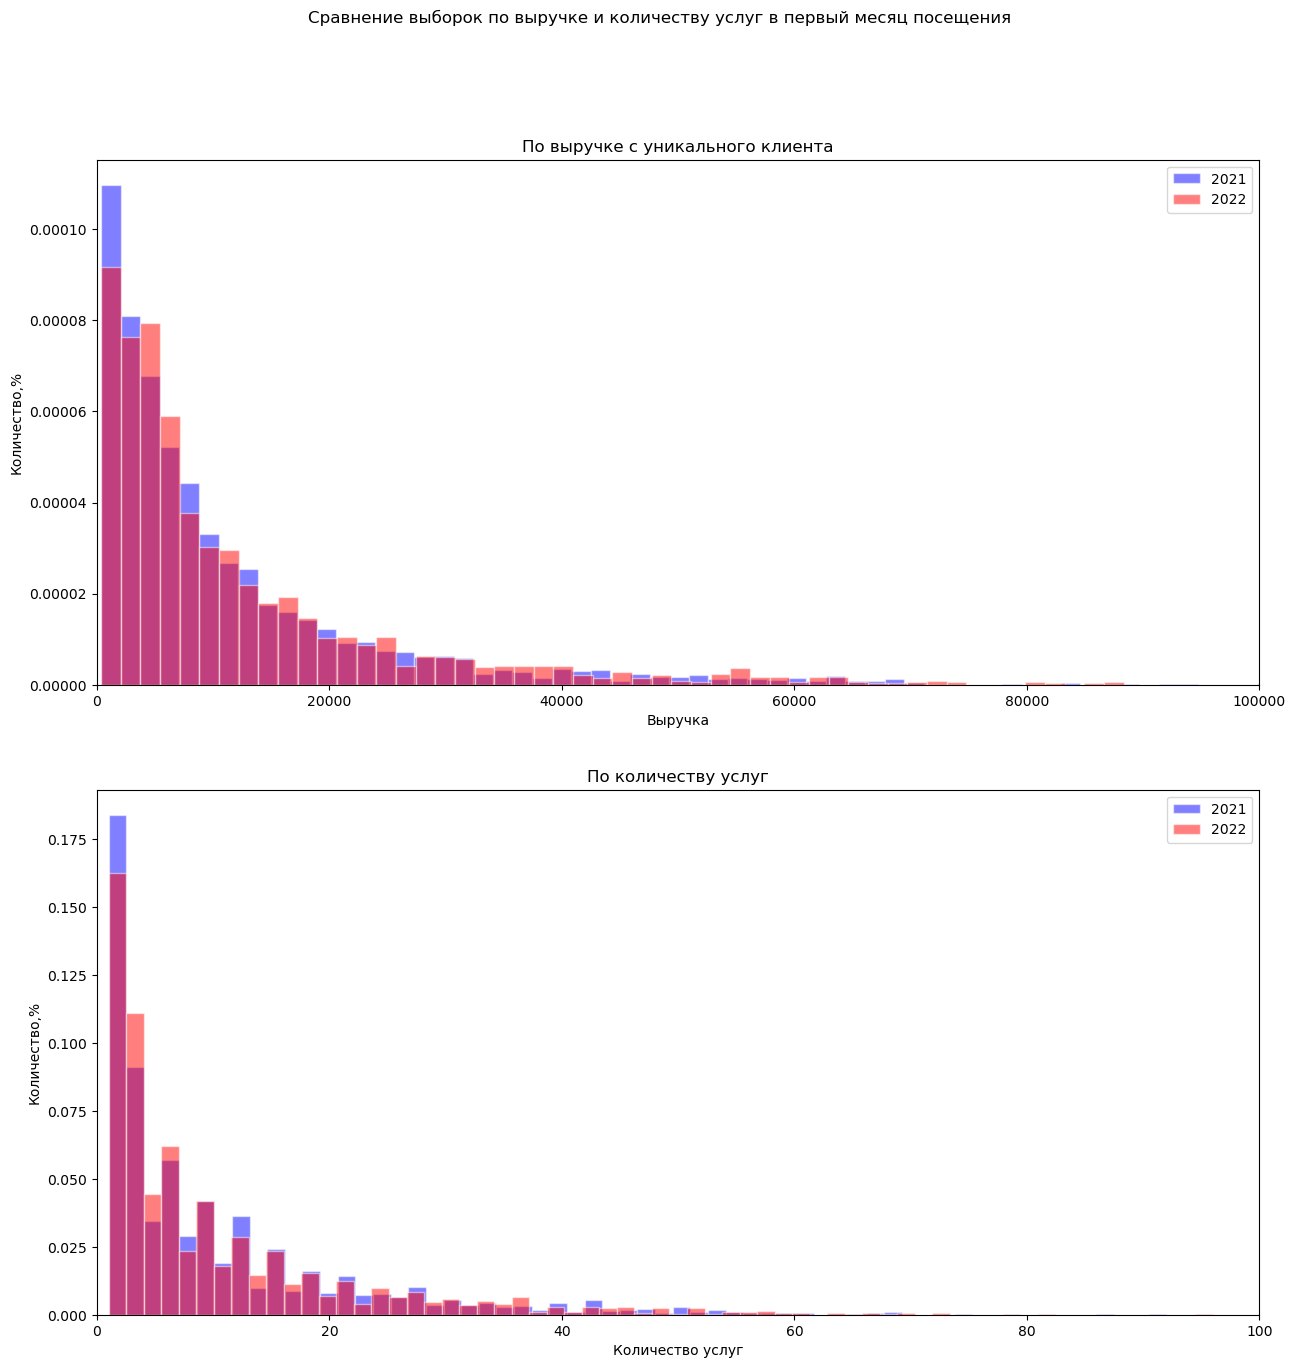

In [142]:
#сравним распределение по выручке и количеству услуг
plt.figure(figsize=(15, 15))
plt.suptitle('Сравнение выборок по выручке и количеству услуг в первый месяц посещения', fontsize='large')

ax1 = plt.subplot(2, 1, 1)
plt.xlim(0,100000)
plt.hist(x=first_month.query('year==2021')['amount'],
         bins=60, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=first_month.query('year==2022')['amount'],
         bins=83, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По выручке с уникального клиента')
plt.xlabel('Выручка')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')

ax2 = plt.subplot(2, 1, 2)
plt.xlim(0,100)
plt.hist(x=first_month.query('year==2021')['number'],
         bins=60, color='blue', alpha = 0.5, edgecolor='white', label='2021', density=True)
plt.hist(x=first_month.query('year==2022')['number'],
         bins=63, color='red', alpha = 0.5, edgecolor='white', label='2022', density=True)
plt.title('По количеству услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Количество,%')
plt.legend(loc='upper right')

plt.show();

При сравнении результатов посещения клиентом центра в первый месяц существенных различий между клиентами в 2021 и 2022 году на наблюдается, гистаграммы практически совпадают по профилю, даже 2022 год иногда превышает показатели 2021 года.

In [143]:
#рассчитаем LTV по годам с горизонтом в 30 дней
ltv_grouped = profiles_ltv.query('first_date<="2022-07-31"').pivot_table(index='year', columns='lifetime', values='service_amount', aggfunc='sum')
        
ltv_grouped = ltv_grouped.fillna(0).cumsum(axis=1)
        
cohort_sizes = (profiles_ltv.groupby('year').agg({'insured': 'nunique'}).rename(columns={'insured': 'cohort_size'}))
        
ltv_grouped = cohort_sizes.merge(ltv_grouped, on='year', how='left').fillna(0)
        
ltv_grouped = ltv_grouped.div(ltv_grouped['cohort_size'], axis=0)
        
ltv_grouped = ltv_grouped[['cohort_size'] + list(range(31))].round(2)
        
ltv_grouped['cohort_size'] = cohort_sizes
ltv_grouped = ltv_grouped.reset_index()
ltv_grouped

,year,cohort_size,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
0,2021,2514,3467.42,4130.10,4718.28,5141.60,5577.68,5969.72,6305.93,6854.18,...,10157.88,10306.34,10465.18,10585.06,10705.40,10834.63,10934.78,11097.04,11218.99,11332.73
1,2022,1973,3568.34,4209.79,4814.64,5296.19,5732.34,6097.04,6438.85,7054.93,...,10220.80,10365.57,10528.13,10660.37,10784.95,10922.85,11044.29,11217.09,11328.00,11439.05


In [144]:
#рассчитаем LTV по месяцам с горизонтом в 30 дней
ltv_month = profiles_ltv.query('first_date<="2022-07-31"').pivot_table(index='y_m', columns='lifetime', values='service_amount', aggfunc='sum')
        
ltv_month = ltv_month.fillna(0).cumsum(axis=1)
        
cohort_sizes = (profiles_ltv.groupby('y_m').agg({'insured': 'nunique'}).rename(columns={'insured': 'cohort_size'}))
        
ltv_month = cohort_sizes.merge(ltv_month, on='y_m', how='left').fillna(0)
        
ltv_month = ltv_month.div(ltv_month['cohort_size'], axis=0)
        
ltv_month = ltv_month[['cohort_size'] + list(range(31))]
        
ltv_month['cohort_size'] = cohort_sizes

ltv_month = ltv_month.reset_index()  
ltv_month = ltv_month.reindex([0,4,5,6,7,8,9,10,11,1,2,3,12,13,14,15,16,17,18]).reset_index()
ltv_month = ltv_month.drop(columns=['index'])
ltv_month = ltv_month.loc[0:18,]  
ltv_month.head()

,y_m,cohort_size,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
0,2021_1,286,3110.926573,3651.265734,4139.220280,4552.160839,4870.055944,5208.286713,5444.811189,5872.534965,...,8731.727273,8816.066434,8943.538462,9024.601399,9156.947552,9269.898601,9404.101399,9529.958042,9660.339161,9737.181818
1,2021_2,219,2918.748858,3453.415525,3892.557078,4364.986301,4885.063927,5201.589041,5569.858447,5960.255708,...,9065.621005,9242.497717,9389.310502,9498.872146,9617.388128,9719.812785,9836.799087,9984.936073,10128.570776,10387.127854
2,2021_3,267,3547.468165,4112.921348,4564.853933,5159.636704,5529.614232,5875.089888,6144.284644,6721.992509,...,10686.812734,10799.288390,10908.689139,11041.258427,11247.367041,11380.202247,11560.112360,11788.445693,11898.284644,12023.205993
3,2021_4,217,3360.078341,4016.331797,4461.645161,4900.705069,5178.880184,5689.036866,6271.645161,6869.783410,...,9903.082949,10100.041475,10258.953917,10332.672811,10514.502304,10665.253456,10743.285714,10982.788018,11118.179724,11198.138249
4,2021_5,210,3755.238095,4374.004762,5100.923810,5622.947619,6134.890476,6630.852381,6949.185714,7631.647619,...,11624.985714,11834.823810,12220.652381,12354.671429,12522.647619,12706.338095,12781.504762,12878.714286,13067.519048,13128.880952


In [145]:
# создадим функцию для сглаживания данных в визуализации
def filter_data(df, window):
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

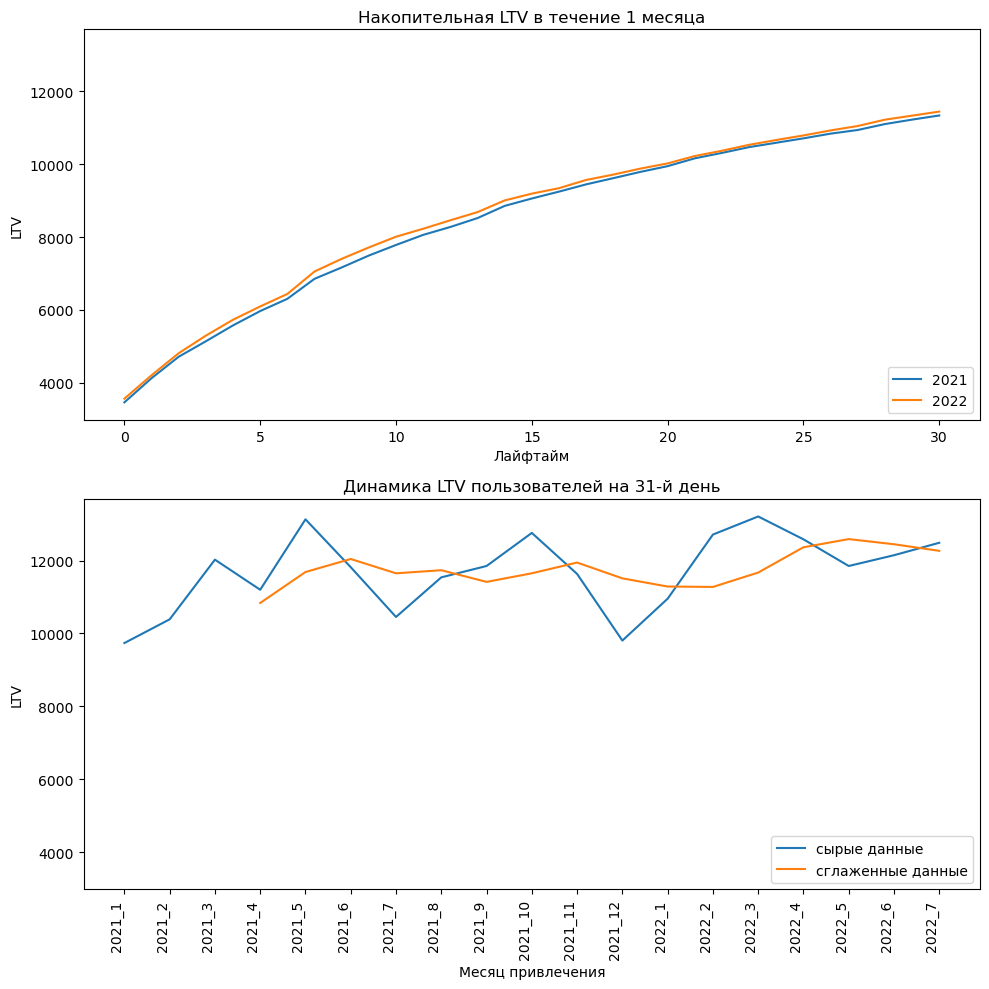

In [146]:
#визуализируем LTV в сравнении по годам и в динамике
plt.figure(figsize=(10, 10))

ltv = ltv_grouped.drop(columns=['year','cohort_size'])
ltv_month = ltv_month.drop(columns=['cohort_size'])    

ax1 = plt.subplot(2, 1, 1)
sns.lineplot(data=ltv.T, x=ltv.T.index, y=ltv.T[0], ax=ax1, label='2021')
sns.lineplot(data=ltv.T, x=ltv.T.index, y=ltv.T[1], ax=ax1, label='2022')
plt.xlabel('Лайфтайм')
plt.ylabel('LTV')
plt.title('Накопительная LTV в течение 1 месяца')
plt.legend(loc='lower right')

ax2 = plt.subplot(2, 1, 2, sharey=ax1)
sns.lineplot(data=ltv_month, x='y_m', y=30, ax=ax2, label='сырые данные')
sns.lineplot(data=ltv_month, x='y_m', y=filter_data(ltv_month.loc[:,0:30], 4)[30], ax=ax2, label='сглаженные данные')
plt.xlabel('Месяц привлечения')
plt.xticks(rotation=90, ha='right')
plt.ylabel('LTV')
plt.title('Динамика LTV пользователей на 31-й день')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show();

Графики накопления LTV в течение первого месяца посещения почти совпали - график 2022 года немного выше, однако не настолько, чтобы это стоило проверять статистически. В динамике LTV на 31 день немного растет, но опять же очень слабо. Првоерять на значимость отличий нет необходимости. Мы фактически подтвердили вывод, сделанный в начале исследовательского анализа, что выручка и количество услуг на одного уникального пользователя в 2021 и 2022 году отличаются незначительно.



### Вывод <a id='summary_analysis'></a> 

<p></p>

<div style="border:solid green 2px; padding: 20px">
Выручка клиники за 8 месяцев 2022 года на 63.55% выше выручки за соответствующий период 2021 года. Рост выручки связан, прежде всего, с увеличением количества оказанных услуг и обслуживаемых клиентов. Цены за одну услугу выросла всего на 7%. <p>
*Первая гипотеза, которую нам стоит проверить – о равенстве средней цене услуг клиники в 2021 и 2022 годах. <p>
Рост востребованности услуг клиники отмечался в марта и 4 квартале 2021 года, а также  в период с марта по июнь 2022 года. Вместе с количеством услуг пропорционально растет количество посещений и кейсов, но при этом стоимость и количество услуг в расчете на одного клиента, на одногоодно посещение или медицинский кейс сохраняются на относительно стабильном уровне. <p>
Средняя цена большинства услуг, предоставляемых клиникой, не превышает 2000, и за исследуемый период их стоимость возросла на 4.5-7.5%%.
Наиболее востребованные услуги клиники - прием первичный и повторный, а также взятие крови из вены на анализы. Эти и другие услуги из десятки наиболее востребованных выросли в цене на 5-10%%, что соответствует среднему уровню роста цены. Максимальный рост в 18% стоимости услуги произошел для услуги прием врача-эксперта, уровень востребованности данной услуги вырос в 3 раза относительно 2021 года. Между изменением уровня цены и количества услуг обнаружена умеренная положительная зависимость.
Рост средней цены услуги наблюдается во всех ценовых категориях, но доля услуг в низкой и ниже среднего ценовых категориях снизилась, возросла доля услуг среднего и выше среднего ценового диапазона, за исключением дорогостоящих услуг. <p>
*Вторая гипотеза для статистической проверки - о равенстве долей услуг различных ценовых сегментов по каждому из сегментов. <p>
По медицинским категориям изменения по цене выглядят рельефнее, чем для отдельных услуг: максимальный рост средней стоимости услуги достигает 84%, максимальное падение составляет -65%. При этом как наибольший рост цены, так и снижение средней стоимости услуги демонстрируют категории, набирающие относительно небольшое количество клиентов и услуг. Наиболее востребованные медицинские категории услуг демонстрируют умеренный рост по стоимости ниже среднего уровня роста цены.
Высокий рост стоимости наблюдается для услуг процедурного кабинета и функциональной диагностики, входящие в топ-10 по востребованности, а также услуги категории 'Оториноларингология', выросшие в цене на 32% и занимающие 11 место по количеству оказанных услуг в 2022 году. <p>
По типу оказанных услуг в 2022 году больше всего подорожали относительно немногочисленные услуги по лечению, а также востребованные услуги по забору биоматериала, относящиеся к медицинской категории 'Процедурный кабинет'. <p>
Количество уникальных клиентов в  2022 году значительно возросло как у мужчин, так и женщин, а процентное соотношение между полами изменилось менее чем на 1%. Может ли это изменение быть драйвером роста цены необходимо проверить статистически с учетом следующих различий между клиентами-мужчинами и клиентами-женщинами: <p>
- рост средней стоимости услуги у клиентов-женщин более выражен, чем у клиентов-мужчин; <p>
- снижение средного количества услуг на одного уникального клиента, наоборот, больше у клиентов-мужчин, чем у женщин; <p>
- в 2022 году клиенты-женщины стали чаще пользоваться услугами по профилактике, у мужчин доля данных услуг наоборот немного снизилась, кроме этого у клиентов-женщин в большей степени снизилась доля услуг по лабораторной диагностике. <p>
*Третья гипотеза для статистической проверки - о равенстве долей клиентов по половому признаку.
Основная масса клиентов клиники – люди в возрасте от 22 до 60 лет, остальные категории суммарно не достигают 15%. Доли возрастных категорий относительно стабильны. Средняя цена услуги возросла для большинства категорий, кроме дошкольников и пожилых посетителей.
Значительных отличий клиентов разных возрастных групп по востребованности услуг различных ценовых категорий не наблюдается.
Для клиентов всех возрастных категорий три наиболее востребованных типа услуг - это прием специалиста, лабораторные исследования и диагностика, различия в остальных связаны с возрастными особенностями и правилами оказания медицинских услуг. <p>
 

</div>

## Шаг 3. Проверка гипотез.<a id='stats'></a> 

#### Проверим гипотезу о равенстве средних цен услуг:<a id='H_mean_price'></a> 

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что средняя цена услуг клиники в 2021 и 2022 годах одинакова. <p>
    Альтернативная гипотеза -  средняя цена услуг клиники в 2022 году существенно выросла относительно уровня 2021 года.
    </div>

In [147]:
#учитывая, что мы сравниваем две зависимые выборки, применим t-тест для зависимых выборок.  
#зададим уровень статистической значимости
alpha = 0.05

In [148]:
#показатель для сравнения - средняя цена услуг за 8 месяцев каждого года, исключая пропущенные значения.
# выберем нужные нам данные из уже созданной таблицы и удалим пропуски
data_8_h1 = service_rank[['service_name', '2021_price','2022_price']].dropna()
data_8_h1.head()

,service_name,2021_price,2022_price
0,Прием врача-эксперта,3360.04,3971.06
1,Введение лекарственных препаратов в наружный с...,263.00,308.00
2,Интерпретация результатов Диаскинтеста,1103.00,1280.00
3,Herpes simplex virus 1 IgM,599.00,690.00
4,Mycoplasma pneumoniae IgG,599.00,690.00


In [149]:
# проверим гипотезу
t_result = st.ttest_rel(data_8_h1['2021_price'], data_8_h1['2022_price'], alternative='less')
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 4.2031634597379114e-60
Отвергаем нулевую гипотезу


In [150]:
# оценим различия на очищенны данных
print('Различия в средней цене услуги составляют {0:.1%}'.
      format(data_8_h1['2022_price'].mean()/data_8_h1['2021_price'].mean()-1)) 

Различия в средней цене услуги составляют 6.4%


<div style="border:solid black 1px; padding: 20px">
    Средняя цена услуг клиники в 2022 году статистически значимо возросла относительно средней цены услуг в 2021 году. <p>
    Различия между средней ценой услуги в исследуемые периоды составляют 6.4%.<p>
    </div>

Проверим периоды повышения цены для определения факторов, вляющих на повышение стоимости услуг медицинского центра.

In [151]:
#консолидируем информацию по изменению цены услуг по месяцам
price_dinamics = data.pivot_table(index='service_name', columns=['service_year', 'service_month'], 
                                  values='price', aggfunc='mean')
price_dinamics = price_dinamics.dropna()
price_dinamics.columns=['2021_1','2021_2','2021_3','2021_4','2021_5','2021_6','2021_7','2021_8','2021_9','2021_10','2021_11','2021_12',
                        '2022_1','2022_2','2022_3','2022_4','2022_5','2022_6','2022_7','2022_8']
price_dinamics = (100*price_dinamics.div(price_dinamics['2021_1'], axis=0)-100).round(2).T.reset_index()
price_dinamics['all'] = price_dinamics.mean(axis=1).round(2)
price_dinamics.head()

service_name,index,Chlamydia trachomatis (Соскоб),АЛТ (аланинаминотрансфераза),АСТ (аспартатаминотрансфераза),Альфа-амилаза панкреатическая,Анемизация слизистой носа,Аноскопия,Билирубин общий,Билирубин прямой,"В,мышечная инъекция (за 1 процедуру без стоимости лекарств)",...,Урологический мазок,Установка и снятие носителя аппарата Холтеровского мониторирования АД,Установка и снятие носителя аппарата Холтеровского мониторирования ЭКГ,Фонофорез (1 сеанс) (1 поле),Фосфотаза щелочная,Функция внешнего дыхания,Холестерин,Эзофагогастродуоденоскопия,Эхокардиография с допплеровским анализом,all
0,2021_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2021_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02
2,2021_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06
3,2021_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21
4,2021_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34


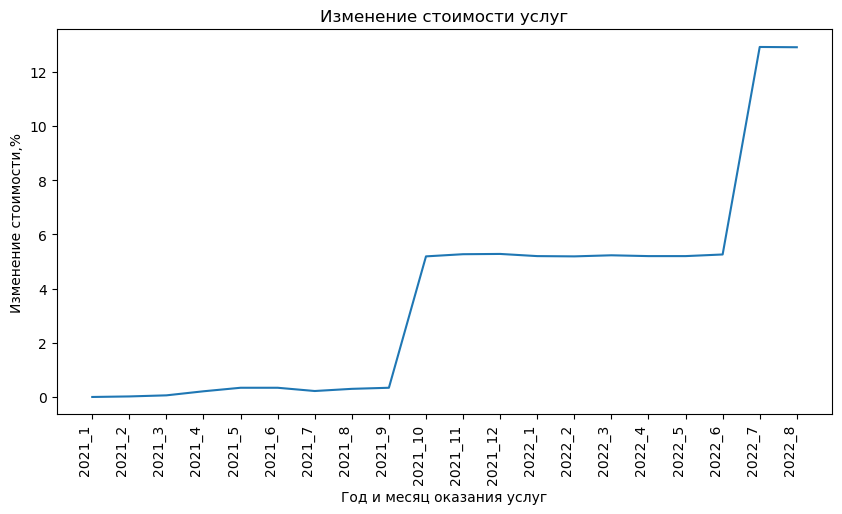

In [152]:
#визуализируем изменение цены услуг за анализируемый период
plt.figure(figsize=(10,5))
sns.lineplot(price_dinamics, x='index', y='all')
plt.title('Изменение стоимости услуг')
plt.xlabel('Год и месяц оказания услуг')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Изменение стоимости,%')
plt.show();

Небольшие изменения в стоимости услуг (менее 1%) происходят практически ежемесячно, но за исследуемый период отмечаются два значительных скачка в стоимости (на 5% и более) - в октябре 2021 и в июле 2022 года. Второй скачок, вероятнее всего, связан с подорожанием закупок в связи с введенными санкциями, сложностями в импорте необходимых зарубежных медицинских товаров и ростом валютного курса. По первому скачку столь явных причин не обнаруживается - курс валют сохраняет относительную стабильность, резких изменений в сфере медицинских услуг также летом 2021 года не отмечается. Учитывая, что последний прайс-лист на услуги медицинского центра датируется 1 октября, возможно, это повышение цен - плановый ежегодный пересмотр стоимости услуг с учетом инфляции, поскольку уровень роста цен совпадает с уровнем инфляции в России.

#### Проверим гипотезу о равенстве долей услуг различных ценовых категорий: <a id='H_category'></a> 

<div style="border:solid black 1px; padding: 20px">
    За нулевую гипотезу принимаем утверждение, что доли услуг одной ценовой категории в 2021 и 2022 году одинаковы. <p>
    Альтернативная гипотеза - доли услуг одной ценовой категории в 2022 году изменились.
    </div>

In [153]:
# расчитаем поправку Бонферрони:
bonferroni_alpha = alpha / 5
print(f'Поправка Бонферрони для пяти сравнений составляет', bonferroni_alpha)

Поправка Бонферрони для пяти сравнений составляет 0.01


In [154]:
#создадим функцию для проверки равенства долей

def count_z(part):
    
    p1 = (data_8.query('service_year==2021 and price_category==@part')['service_number'].sum()/
          data_8.query('service_year==2021')['service_number'].sum())
    
    p2 = (data_8.query('service_year==2022 and price_category==@part')['service_number'].sum()/
          data_8.query('service_year==2022')['service_number'].sum())
    
    p_combined = ((data_8.query('service_year==2021 and price_category==@part')['service_number'].sum() + 
              data_8.query('service_year==2022 and price_category==@part')['service_number'].sum()) / 
              (data_8.query('service_year==2021')['service_number'].sum() + 
               data_8.query('service_year==2022')['service_number'].sum()))
    difference = p2 - p1 

    z_value = (difference / mth.sqrt(p_combined * (1 - p_combined) * (
        1/data_8.query('service_year==2021')['service_number'].sum() + 
        1/data_8.query('service_year==2022')['service_number'].sum())))

    distr = st.norm(0, 1)  
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value) 
          
    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница.')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.')
    
    print('Различия в доле услуг в категории {0} составляют {1:.2%}'.
      format(part, difference))  
    
    return 

In [155]:
#проверяем гипотезу для услуг в категории 'низкая цена'
count_z('низкая цена')

p-значение:  5.204725539442734e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница.
Различия в доле услуг в категории низкая цена составляют -2.39%


In [156]:
#проверяем гипотезу для услуг в категории 'ниже среднего'
count_z('ниже среднего')

p-значение:  0.0027575424121661918
Отвергаем нулевую гипотезу: между долями есть значимая разница.
Различия в доле услуг в категории ниже среднего составляют -0.81%


In [157]:
#проверяем гипотезу для услуг в категории 'средний уровень'
count_z('средний уровень')

p-значение:  5.774705158501092e-10
Отвергаем нулевую гипотезу: между долями есть значимая разница.
Различия в доле услуг в категории средний уровень составляют 1.73%


In [158]:
#проверяем гипотезу для услуг в категории 'выше среднего'
count_z('выше среднего')

p-значение:  1.3632130964058575e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница.
Различия в доле услуг в категории выше среднего составляют 1.85%


In [159]:
#проверяем гипотезу для услуг в категории 'дорогостоящие услуги'
count_z('дорогостоящие услуги')

p-значение:  0.03147436034306805
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.
Различия в доле услуг в категории дорогостоящие услуги составляют -0.37%


<div style="border:solid black 1px; padding: 20px">
Из пяти ценовых категорий статистически значимые различия в долях обнаружены в четырех: <p>
- для категорий низкая и ниже среднего - доля услуг в 2022 году уменьшилась на 2.39% и 0.81% соответственно, <p>
- для категорий средняя и выше среднего - доля услуг в 2022 году увеличилась на 1.73% и 1.85% соответственно.<p>
Различия в доле дорогостоящих услуг между 2021 и 2022 годом не достигают статистически значимого уровня и составляют -0.37%.
</div>

#### Проверим гипотезу о равенстве категорий клиентов по полу:<a id='H_gender'></a> 

<div style="border:solid black 1px; padding: 20px">
Проверяя эту гипотезу нам предстоит проверить несколько гипотез:<p>
    1. О равенстве средней цены услуги клиентов-мужчин и клиентов-женщин; <p>
    2. О равенстве среднего количества услуг на одного клиента среди мужчин и женщин;<p>
    3. О равенстве долей клиентов мужчин и женщин в 2021 и 2022 году.<p>
    </div>

Проверяем гипотезу о равенстве средней цены услуги клиентов-мужчин и клиентов-женщин.
Учитывая, что мы сравниваем две независимые выборки, применим t-тест для независимых выборок.  
Уровень статистической значимости остается тот же.

In [160]:
#показатель для сравнения - средняя цена услуг у мужчин и женщин, период при этом не имеет значения.
# проверим гипотезу
t_result = st.ttest_ind(data.query('sex_id==1')['price'], data.query('sex_id==2')['price'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в средней цене услуги составляют {0:.1%}'.
      format(data.query('sex_id==1')['price'].mean()/data.query('sex_id==2')['price'].mean()-1)) 

p-value = 0.015238105443568331
Отвергаем нулевую гипотезу
Различия в средней цене услуги составляют 1.2%


In [161]:
#показатель для сравнения - средняя цена услуг у мужчин и женщин, период - с января по август каждого года.
# проверим гипотезу
t_result = st.ttest_ind(data_8.query('sex_id==1')['price'], data_8.query('sex_id==2')['price'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в средней цене услуги составляют {0:.1%}'.
      format(data.query('sex_id==1')['price'].mean()/data.query('sex_id==2')['price'].mean()-1)) 

p-value = 0.02856346308439635
Отвергаем нулевую гипотезу
Различия в средней цене услуги составляют 1.2%


<div style="border:solid black 1px; padding: 20px">
    Средняя цена услуг клиники, которыми пользуются клиенты-мужчины, статистически значимо отличается от средней цены услуг, которыми воспользовались женщины, независимо от того, за какой период анализируются данные. <p>
    Средняя цена услуг, заказанных мужчинами в медицинском центре, в среднем выше на 1.2%.
    </div>

Проверяем гипотезу о равенстве среднего количества услуг на одного клиента среди мужчин и женщин.
Учитывая, что мы сравниваем две независимые выборки, применим t-тест для независимых выборок.  
Уровень статистической значимости остается тот же.

In [162]:
#рассчитаем показатель для сравнения - среднее количество услуг у мужчин и женщин в год, период при этом не имеет значения.
data_h3_2 = data.pivot_table(index=['service_year','insured','sex_id'], values='service_number', aggfunc='sum').reset_index()
data_h3_2.head()

,service_year,insured,sex_id,service_number
0,2021,125073,2,27
1,2021,125094,2,14
2,2021,125404,1,1
3,2021,139315,1,3
4,2021,139539,2,56


In [163]:
# проверим гипотезу
t_result = st.ttest_ind(data_h3_2.query('sex_id==1')['service_number'], data_h3_2.query('sex_id==2')['service_number'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в среднем количестве услуг составляют {0:.1%}'.
      format(data_h3_2.query('sex_id==1')['service_number'].mean()/data_h3_2.query('sex_id==2')['service_number'].mean()-1)) 

p-value = 3.84803948398001e-09
Отвергаем нулевую гипотезу
Различия в среднем количестве услуг составляют -18.4%


In [164]:
#рассчитаем показатель для сравнения - среднее количество услуг у мужчин и женщин в год, период - с января по август каждого года.
data_h3_28 = data_8.pivot_table(index=['service_year','insured','sex_id'], values='service_number', aggfunc='sum').reset_index()
data_h3_28.head()

,service_year,insured,sex_id,service_number
0,2021,125073,2,7
1,2021,125094,2,4
2,2021,125404,1,1
3,2021,139539,2,56
4,2021,142427,1,28


In [165]:
# проверим гипотезу
t_result = st.ttest_ind(data_h3_28.query('sex_id==1')['service_number'], data_h3_28.query('sex_id==2')['service_number'], equal_var=False)
print(f'p-value =', t_result[1])
if t_result[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Различия в среднем количестве услуг составляют {0:.1%}'.
      format(data_h3_28.query('sex_id==1')['service_number'].mean()/data_h3_28.query('sex_id==2')['service_number'].mean()-1)) 

p-value = 2.168245927546658e-08
Отвергаем нулевую гипотезу
Различия в среднем количестве услуг составляют -18.8%


<div style="border:solid black 1px; padding: 20px">
    Среднее количество услуг клиентов-мужчин статистически значимо отличается от среднего количества услуг, которыми воспользовались женщины, независимо от того, за какой период анализируются данные. <p>
    Среднее количество услуг, которые приобретали клиенты-женщины, выше на 18.8%.
    </div>

Проверяем гипотезу о равенстве долей клиентов мужчин и женщин в 2021 и 2022 году.
Нет необходимости проверять оба пола, достаточно проверить какой-то один, поэтому поправку Бонферронни мы применять не будем.  
Уровень статистической значимости остается тот же.

In [166]:
#рассчитаем Z-статистику независимо от периода
    
p1 = (data_h3_2.query('service_year==2021 and sex_id==1')['insured'].nunique()/
          data_h3_2.query('service_year==2021')['insured'].nunique())
    
p2 = (data_h3_2.query('service_year==2022 and sex_id==1')['insured'].nunique()/
          data_h3_2.query('service_year==2022')['insured'].nunique())
    
p_combined = ((data_h3_2.query('service_year==2021 and sex_id==1')['insured'].nunique() + 
              data_h3_2.query('service_year==2022 and sex_id==1')['insured'].nunique()) / 
              (data_h3_2.query('service_year==2021')['insured'].nunique() + 
               data_h3_2.query('service_year==2022')['insured'].nunique()))
difference = p2 - p1 

z_value = (difference / mth.sqrt(p_combined * (1 - p_combined) * (
        1/data_h3_2.query('service_year==2021')['insured'].nunique() + 
        1/data_h3_2.query('service_year==2022')['insured'].nunique())))

distr = st.norm(0, 1)  
    
p_value = (1 - distr.cdf(abs(z_value))) * 2
    
print('p-значение: ', p_value) 
          
if p_value <alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.')
    
print('Изменения в доле категории клиентов составляют {0:.2%}'.
      format(difference))  
    

p-значение:  0.4732438618043231
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.
Изменения в доле категории клиентов составляют -0.98%


In [167]:
#рассчитаем Z-статистику за 8 месяцев каждого года
    
p1 = (data_h3_28.query('service_year==2021 and sex_id==1')['insured'].nunique()/
          data_h3_28.query('service_year==2021')['insured'].nunique())
    
p2 = (data_h3_28.query('service_year==2022 and sex_id==1')['insured'].nunique()/
          data_h3_28.query('service_year==2022')['insured'].nunique())
    
p_combined = ((data_h3_28.query('service_year==2021 and sex_id==1')['insured'].nunique() + 
              data_h3_28.query('service_year==2022 and sex_id==1')['insured'].nunique()) / 
              (data_h3_28.query('service_year==2021')['insured'].nunique() + 
               data_h3_28.query('service_year==2022')['insured'].nunique()))
difference = p2 - p1 

z_value = (difference / mth.sqrt(p_combined * (1 - p_combined) * (
        1/data_h3_28.query('service_year==2021')['insured'].nunique() + 
        1/data_h3_28.query('service_year==2022')['insured'].nunique())))

distr = st.norm(0, 1)  
    
p_value = (1 - distr.cdf(abs(z_value))) * 2
    
print('p-значение: ', p_value) 
          
if p_value <alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.')
    
print('Изменения в доле категории клиентов составляют {0:.2%}'.
      format(difference))  
    

p-значение:  0.8116634927886326
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.
Изменения в доле категории клиентов составляют 0.36%


<div style="border:solid black 1px; padding: 20px">
У нас нет оснований считать существенным изменение доли клиентов клиники по половому признаку. Изменение доли клиентов любого пола менее 1%.<p>
Несмотря на существующие значимые различия между мужчинами и женщинами по среднему количеству услуг и их средней цене, доля клиентов по полу сохраняется на том же уровне, поэтому изменение структуры обслуживаемых клиентов по полу не вляется драйвером роста цены.
    </div>


### Вывод<a id='summary_stats'></a> 

<div style="border:solid green 2px; padding: 20px">

Мы проверили три гипотезы относительно факторов, влияющих на стоимость услуг медицинского центра. Данные подтверждают предположения, что стоимость услуг выросла в 2022 году. Кроме того, клиенты стали реже пользоваться услугами в сегментах с низкой ценой и ниже среднего, вместе с чем выросла доля услуг средней стоимости и выше среднего. Изменения в доле дорогостоящих услуг статистически незначимы. Изменение доли клиентов клиники по полу не достигает значимого уровня, поэтому несмотря на значительные различия между средней ценой и количествоа приобретаемых услуг между мужчинами и женщинами, изменение структуры обслуживаемых клиентов по полу не является драйвером роста цены услуг.    

</div>



##  Общий вывод<a id='summary_final'></a>

<p></p>

<div style="border:solid green 2px; padding: 20px">

В ходе исследования была изучена база данных медицинского центра - информация о клиентах и приобретенных ими услугах в период в января 2021 по август 2022 года. Из 85369 строк клиентской базы были удалены 4 строки с пропусками даннах. Датафрейм дополнен столбцами с указанием медицинской категории на основе информации с сайта клиента и типа оказываемой услуги, добавлены категории для услуг по цене и для клиентов по возрасной группе. Выбросы в числовых данных по стоимости, количеству услуг и возрасту клиентов не случайны и оставлены для анализа в полном объеме.<p>
    
Выручка медицинского центра за 8 месяцев 2022 года на 63% выше выручки за аналогичный период 2021 года. Ключевый драйвером роста выручки является увеличение количества уникальных клиентов - их число возросло на 59%, количество оказанных услуг также выросло на 52%. Менее очевидной причиной роста выручки является рост цены услуг - за анализируемый период в среднем цена услуг выросла на 7%. <p>

Количество посещений и кейсов также растет в 2022 году относительно предыдущего периода, но стоимость и количество услуг одного посещения или медицинского кейса сохраняются на относительно стабильном уровне. 
Средняя цена большинства услуг медицинского центра не превышает 2000 и за исследуемый период выросла на 4.5-7.5% Снижение цены отмечается лишь для одной услуги.<p>
Услуги из десятки наиболее популярных выросли в цене на 5-10%, что соответствует среднему уровню роста цены. Три наиболее востребованные услуги центра - прием первичный и повторный, а также взятие крови из вены на анализы. Наибольший рост цены услуги в 2022 году составляет более 18% за прием врача-эксперта, при этом и спрос на данную услугу вырос в 3 раза. Существует умеренная положительная корреляция между ростом цены и изменением количества услуги. <p>
По медицинским категориям изменения по цене значительнее: максимальный рост средней стоимости услуги достигает 84% в Травматологии, максимальное падение составляет -65%  для ПЦР диагностика инфекций. Рост средней цены услуги более 50% отмечается также в Урологии и Дерматологии. Из заметных по масштабу можно еще выделить услуги из медицинской категории 'Оториноларингология', значительной выросшие в цене (на 32%) и занимающие 11 место по количеству оказанных услуг в 2022 году.<p>
По типу оказанных услуг в 2022 году больше всего подорожали услуги по лечению, а также услуги по забору биоматериала, а для профилактических мероприятий и оперативных вмешательств средняя цена, наоборот, снизилась.  <p>
    
Половозрастная структура клиентской базы в 2022 году не претерпела существенных изменений, несмотря на резкий рост количества посетителей. И в 2021 и в 2022 году клиентами центра чаще становятся женщины в возрасте от 22 до 60 лет. 
                
Мы статистически проверили три гипотезы, и можем сделать следующие выводы:<p>

- обранужены статистически значимые различия в средней цене услуги в 2021 и 2022 годах, поэтому изменение стоимости услуг медицинского центра является одним из драйверов роста цены услуги в 2022 году;<p>

- существенно изменилась доля услуг в четырех ценовых категориях, что также является драйвером для роста цены услуги, поскольку в 2022 году снизилась доля услуг с низкой ценой и ниже среднего, и увеличилась доля услуг с ценой среднего уровня и выше среднего;  <p>

- Изменение доли клиентов клиники по полу статистически незначимо и не является драйвером роста цены услуг, несмотря на значительные различия между средней ценой и количеством приобретаемых услуг между мужчинами и женщинами.<p>
    
Ссылка на презентацию: https://disk.yandex.ru/i/aQLYiUeAWizzoQ 
    
</div>

